#Parte 1: Configuração Inicial (Importação de Bibliotecas)

Primeiro, vamos importar todas as bibliotecas Python que precisaremos. Se alguma delas não estiver instalada no seu ambiente, você pode instalá-la usando o pip. Por exemplo, para instalar a astropy, você usaria o comando pip install astropy no seu terminal ou !pip install astropy diretamente numa célula do Jupyter Notebook.




A Célula 1 abaixo fará o seguinte:

Imprimirá a versão da astropy que seu Colab está usando.
Tentará importar get_sun e get_moon de três maneiras diferentes, em ordem de preferência/comunidade: a. Diretamente de astropy.coordinates. b. De astropy.coordinates.solar_system. c. Usando get_body (comum em versões mais recentes da astropy >= 4.0), configurando o solar_system_ephemeris.
Também tentará instalar astroquery e geopy automaticamente se não estiverem presentes (o Colab geralmente os tem, mas é uma boa prática verificar).
Definirá uma variável global HOW_TO_GET_SUN_MOON que o restante do notebook usará para saber como obter as posições do Sol e da Lua.


In [ ]:
# Célula 1: Configuração Inicial (Importação de Ferramentas Essenciais) - VERSÃO ROBUSTA

print("--- Iniciando Configuração da Célula 1: Bibliotecas Essenciais ---")

# --- Astropy (Astronomia Geral) ---
# A 'astropy' é uma biblioteca Python super importante para cálculos astronômicos.
ASTROPY_USABLE = False
GET_SUN_MOON_USABLE = False
actual_get_sun_function = None
actual_get_moon_function = None
HOW_TO_GET_SUN_MOON = "Não configurado" # Para o resumo final

try:
    import astropy
    ASTROPY_VERSION = astropy.__version__
    print(f"INFO: Versão da biblioteca Astropy instalada: {ASTROPY_VERSION}")

    # Importações essenciais do Astropy
    from astropy.coordinates import EarthLocation, SkyCoord, AltAz, get_body # get_body é o principal para Sol/Lua agora
    from astropy.time import Time, TimeDelta
    import astropy.units as u
    from astropy.utils.iers import conf as iers_conf
    iers_conf.auto_download = False # Evita downloads automáticos que podem travar/atrasar
    ASTROPY_USABLE = True

    # Configurando acesso às posições do Sol e da Lua usando get_body
    if ASTROPY_USABLE:
        try:
            # Define as funções para usar get_body diretamente
            actual_get_sun_function = lambda time_obj: get_body("sun", time_obj)
            actual_get_moon_function = lambda time_obj: get_body("moon", time_obj)

            # Teste rápido para garantir que get_body está funcionando
            _ = actual_get_sun_function(Time.now())
            _ = actual_get_moon_function(Time.now())
            HOW_TO_GET_SUN_MOON = 'get_body'
            print(f"INFO: Sol e Lua serão localizados usando o método '{HOW_TO_GET_SUN_MOON}' (padrão para Astropy >= 4.0).")
            GET_SUN_MOON_USABLE = True
        except Exception as e_get_body_init:
            print(f"ERRO CRÍTICO ao tentar configurar 'get_body' para Sol/Lua: {e_get_body_init}")
            GET_SUN_MOON_USABLE = False

except ImportError:
    print("ERRO CRÍTICO: A biblioteca 'astropy' ou um de seus componentes essenciais não foi encontrada.")
    print("Por favor, tente instalar com: !pip install astropy")
    print("Depois, REINICIE O AMBIENTE DE EXECUÇÃO e reexecute esta célula.")
    # Define flags de usabilidade como False se astropy falhar
    ASTROPY_USABLE = False; VIZIER_USABLE = False; GEOPY_USABLE = False; ASTROPLAN_USABLE = False; IPYWIDGETS_AVAILABLE = False
    raise # Interrompe a execução se astropy não for encontrada

# --- Astroquery (Busca em Catálogos Online) ---
VIZIER_USABLE = False
if ASTROPY_USABLE:
    try:
        from astroquery.vizier import Vizier
        from astroquery.exceptions import RemoteServiceError, TimeoutError as AstroqueryTimeoutError
        VIZIER_USABLE = True
    except ImportError:
        print("AVISO: A biblioteca 'astroquery' não foi encontrada.")
        print("Tentando instalar automaticamente...")
        import subprocess; import sys
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", "astroquery"])
            print("INFO: 'astroquery' foi instalado. Por favor, RE-EXECUTE ESTA CÉLULA (Célula 1).")
        except Exception as e_aq_install:
            print(f"ERRO: Falha ao instalar 'astroquery': {e_aq_install}.")

# --- Astroplan (Planejamento Avançado e Funções da Lua) ---
ASTROPLAN_USABLE = False
if ASTROPY_USABLE:
    try:
        import astroplan
        from astroplan import Observer, FixedTarget
        from astroplan.plots import plot_sky, plot_airmass
        from astroplan import moon_illumination # Essencial para os detalhes da Lua
        ASTROPLAN_USABLE = True
    except ImportError:
        print("AVISO: A biblioteca 'astroplan' não foi encontrada.")
        print("Tentando instalar automaticamente...")
        import subprocess; import sys
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", "astroplan"])
            print("INFO: 'astroplan' foi instalado. Por favor, RE-EXECUTE ESTA CÉLULA (Célula 1).")
        except Exception as e_ap_install:
            print(f"ERRO: Falha ao instalar 'astroplan': {e_ap_install}.")

# --- Outras Bibliotecas Essenciais ---
GEOPY_USABLE = False
try:
    from geopy.geocoders import Nominatim
    from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
    GEOPY_USABLE = True
except ImportError:
    print("AVISO: A biblioteca 'geopy' não foi encontrada.")
    print("Tentando instalar automaticamente...")
    import subprocess; import sys
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "geopy"])
        print("INFO: 'geopy' foi instalado. Por favor, RE-EXECUTE ESTA CÉLULA (Célula 1).")
    except Exception as e_gp_install:
        print(f"ERRO: Falha ao instalar 'geopy': {e_gp_install}.")

IPYWIDGETS_AVAILABLE = False
try:
    import ipywidgets as widgets
    from IPython.display import display, clear_output
    IPYWIDGETS_AVAILABLE = True
except ImportError:
    print("AVISO: A biblioteca 'ipywidgets' não foi encontrada.")
    print("Tentando instalar automaticamente...")
    import subprocess; import sys
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "ipywidgets"])
        # Assegura que a extensão do Jupyter está habilitada (para Colab, geralmente não é problema)
        try:
            subprocess.check_call([sys.executable, "-m", "jupyter", "nbextension", "enable", "--py", "widgetsnbextension", "--sys-prefix"])
        except Exception: pass # Ignora se o comando nbextension falhar (mais relevante para Jupyter local)
        print("INFO: 'ipywidgets' foi instalado. Pode ser necessário REINICIAR O AMBIENTE DE EXECUÇÃO e RE-EXECUTAR ESTA CÉLULA (Célula 1).")
    except Exception as e_iw_install:
        print(f"ERRO: Falha ao instalar 'ipywidgets': {e_iw_install}.")

MATPLOTLIB_NUMPY_USABLE = False
try:
    import matplotlib.pyplot as plt
    import numpy as np
    MATPLOTLIB_NUMPY_USABLE = True
except ImportError:
    print("ERRO CRÍTICO: Matplotlib e/ou Numpy não foram encontrados.")
    # Considerar instalar se necessário, mas são geralmente padrão no Colab

# --- Lidando com Datas, Horas e Fusos Horários ---
import pytz
from datetime import datetime, timedelta, date
from tqdm.auto import tqdm
import pandas as pd
import warnings # Para gerenciar avisos

# --- Configurações Adicionais ---
if MATPLOTLIB_NUMPY_USABLE:
    plt.style.use('seaborn-v0_8-whitegrid')
    # %matplotlib inline # Removido para evitar SyntaxError se executado como script puro
    # No Colab, os gráficos geralmente aparecem inline por padrão.
    # Se precisar de interatividade, use '%matplotlib widget' em uma célula separada ANTES de plotar.

# Suprime alguns avisos menos críticos da Astropy que podem poluir a saída
if ASTROPY_USABLE:
    warnings.filterwarnings('ignore', category=astropy.utils.exceptions.AstropyWarning)
    # A linha específica para astropy.time.core.AstropyTimeWarning foi removida.

# NA CÉLULA 1, junto com as outras importações e instalações:
try:
    import requests
    REQUESTS_USABLE = True
except ImportError:
    print("AVISO: A biblioteca 'requests' (para buscar dados online) não foi encontrada.")
    print("Tentando instalar automaticamente...")
    import subprocess; import sys
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "requests"])
        print("INFO: 'requests' foi instalado. Por favor, RE-EXECUTE ESTA CÉLULA (Célula 1).")
        REQUESTS_USABLE = False
    except Exception as e_req_install:
        print(f"ERRO: Falha ao instalar 'requests': {e_req_install}.")
        REQUESTS_USABLE = False

# No resumo final da Célula 1, adicione:
# if REQUESTS_USABLE: print("INFO: Biblioteca 'requests' está pronta.")
# else: print("ATENÇÃO: Biblioteca 'requests' não está funcionando. Busca de previsão do tempo FALHARÁ.")



# --- Resumo Final da Configuração da Célula 1 ---
print("\n--- Resumo da Configuração da Célula 1 ---")
if ASTROPY_USABLE: print(f"Versão da Astropy: {ASTROPY_VERSION}")
else: print("ERRO CRÍTICO: Astropy não está funcionando.")

if GET_SUN_MOON_USABLE: print(f"INFO: Posições do Sol e da Lua serão obtidas usando o método: '{HOW_TO_GET_SUN_MOON}'.")
else: print("ATENÇÃO CRÍTICA: Não foi possível configurar Sol/Lua. Funções essenciais FALHARÃO.")

if VIZIER_USABLE: print("INFO: Astroquery (VizieR) está pronto.")
else: print("ATENÇÃO: Astroquery (VizieR) não está funcionando. Busca de coordenadas FALHARÁ.")

if ASTROPLAN_USABLE: print("INFO: Astroplan está pronto (incluindo moon_illumination).")
else: print("ATENÇÃO: Astroplan não está funcionando. Detalhes da Lua e planejamento avançado FALHARÃO.")

if GEOPY_USABLE: print("INFO: Geopy está pronto.")
else: print("AVISO: Geopy não está funcionando. Busca de localização por nome de cidade DESABILITADA.")

if IPYWIDGETS_AVAILABLE: print("INFO: Ipywidgets está pronto.")
else: print("AVISO: Ipywidgets não está funcionando. Interface interativa DESABILITADA.")

if MATPLOTLIB_NUMPY_USABLE: print("INFO: Matplotlib e Numpy estão prontos.")
else: print("ATENÇÃO: Matplotlib/Numpy não estão funcionando. Gráficos FALHARÃO.")

if REQUESTS_USABLE: print("INFO: Biblioteca 'requests' está pronta.")
else: print("ATENÇÃO: Biblioteca 'requests' não está funcionando. Busca de previsão do tempo FALHARÁ.")

print("\nConfiguração da Célula 1 concluída. Se alguma biblioteca precisou ser instalada, RE-EXECUTE esta célula ANTES de prosseguir.")

--- Iniciando Configuração da Célula 1: Bibliotecas Essenciais ---
INFO: Versão da biblioteca Astropy instalada: 7.1.0
INFO: Sol e Lua serão localizados usando o método 'get_body' (padrão para Astropy >= 4.0).
AVISO: A biblioteca 'astroquery' não foi encontrada.
Tentando instalar automaticamente...
INFO: 'astroquery' foi instalado. Por favor, RE-EXECUTE ESTA CÉLULA (Célula 1).
AVISO: A biblioteca 'astroplan' não foi encontrada.
Tentando instalar automaticamente...
INFO: 'astroplan' foi instalado. Por favor, RE-EXECUTE ESTA CÉLULA (Célula 1).

--- Resumo da Configuração da Célula 1 ---
Versão da Astropy: 7.1.0
INFO: Posições do Sol e da Lua serão obtidas usando o método: 'get_body'.
ATENÇÃO: Astroquery (VizieR) não está funcionando. Busca de coordenadas FALHARÁ.
ATENÇÃO: Astroplan não está funcionando. Detalhes da Lua e planejamento avançado FALHARÃO.
INFO: Geopy está pronto.
INFO: Ipywidgets está pronto.
INFO: Matplotlib e Numpy estão prontos.
INFO: Biblioteca 'requests' está pronta.



#Parte 2: Entrada do Local do Observador
Agora, vamos criar a funcionalidade para que o usuário defina sua localização. Daremos duas opções: inserir o nome da cidade ou as coordenadas geográficas diretamente.



In [ ]:
# Célula 2: Definindo Funções para Saber De Onde Você Vai Observar - REVISADA COM AJUSTE DE ALTITUDE

# Para fazer qualquer planejamento astronômico, a primeira coisa que precisamos saber é:
# Onde você está na Terra? Sua localização (latitude, longitude e altitude)
# afeta diretamente como você vê o céu.
# Esta célula define duas funções para nos ajudar a obter essa informação.

def get_location_from_city(city_name_input):
    """
    Tenta transformar o nome de uma cidade em coordenadas geográficas e permite ajustar a altitude.

    Como funciona:
    - Usa a biblioteca 'geopy' (se estiver disponível, como verificado na Célula 1)
      para se conectar a um serviço online (Nominatim, baseado no OpenStreetMap).
    - Envia o nome da cidade para este serviço.
    - Se o serviço encontrar a cidade, ele retorna a latitude e a longitude.
    - A altitude é inicialmente assumida como 0 metros (nível do mar).
    - IMPORTANTE: Em seguida, PERGUNTA AO USUÁRIO se ele deseja fornecer uma altitude
      mais precisa para o local encontrado.
    - Finalmente, cria um objeto 'EarthLocation' da Astropy com as coordenadas geográficas
      e a altitude final (seja a padrão de 0m ou a ajustada pelo usuário).

    Argumentos:
        city_name_input (str): O nome da cidade que o usuário digitou (ex: "São Paulo, Brasil").

    Retorna:
        EarthLocation (objeto da Astropy): Contém a latitude, longitude e altitude da cidade.
                                          Retorna 'None' (nada) se a cidade não for encontrada
                                          ou se ocorrer algum erro durante o processo.
    """
    # Primeiro, verificamos se a biblioteca 'geopy' (que busca coordenadas de cidades)
    # foi carregada com sucesso na Célula 1 e está pronta para ser usada.
    if not GEOPY_USABLE:
        print("AVISO: A biblioteca 'geopy' não está disponível (não foi carregada na Célula 1).")
        print("Não podemos buscar a cidade pelo nome.")
        print("Por favor, escolha a opção de inserir as coordenadas (latitude/longitude) manualmente mais tarde.")
        return None # Retorna 'None' para indicar que não foi possível obter a localização.

    print(f"Tentando encontrar as coordenadas geográficas para: '{city_name_input}'...")
    try:
        # 'Nominatim' é o serviço online que usaremos para buscar as coordenadas da cidade.
        # É uma boa prática fornecer um 'user_agent' (nome do nosso aplicativo) para o serviço.
        # Atualizamos a versão no user_agent para refletir esta modificação.
        geolocator = Nominatim(user_agent="meu_caderno_astro_planner/1.1")

        # Enviamos o nome da cidade para o serviço. Isso requer conexão com a internet.
        # Definimos um tempo máximo de espera (timeout) de 10 segundos para a resposta.
        location_data = geolocator.geocode(city_name_input, timeout=10)

        # Verificamos se o serviço encontrou alguma informação para a cidade.
        if location_data:
            # Se encontramos, guardamos a latitude e longitude.
            latitude_geo = location_data.latitude
            longitude_geo = location_data.longitude
            print(f"  Localização encontrada para '{city_name_input}': Latitude {latitude_geo:.4f}°, Longitude {longitude_geo:.4f}°")

            # A altitude exata geralmente não é fornecida com precisão pelo Nominatim.
            # Então, inicialmente, assumimos 0 metros (nível do mar).
            altitude_final = 0 * u.m # 'u.m' significa unidades de metros da Astropy.
            print(f"  A altitude para '{city_name_input}' foi inicialmente assumida como {altitude_final} (nível do mar).")

            # --- NOVA PARTE: Perguntando ao usuário para ajustar a altitude ---
            # Este loop continua até que o usuário dê uma resposta válida ('S' ou 'N').
            while True:
                adjust_alt_choice = input("  Deseja fornecer uma altitude mais precisa para este local (em metros)? [S para Sim / N para Não]: ").strip().upper()

                if adjust_alt_choice == 'S': # Se o usuário quer ajustar...
                    alt_str_corrected = input(f"    Por favor, digite a altitude correta para '{city_name_input}' (em metros): ")
                    try:
                        # Tentamos converter a entrada para um número e atribuir a unidade de metros.
                        altitude_final = float(alt_str_corrected) * u.m
                        print(f"    Altitude atualizada para: {altitude_final:.2f}")
                        break # Sai do loop de pergunta da altitude.
                    except ValueError: # Se o usuário não digitou um número.
                        print("    Entrada inválida para altitude. Por favor, digite apenas o número de metros (ex: 800).")
                        # O loop continua para perguntar sobre o ajuste novamente.
                elif adjust_alt_choice == 'N': # Se o usuário não quer ajustar...
                    print(f"    Ok, a altitude de {altitude_final:.2f} (nível do mar) será mantida.")
                    break # Sai do loop de pergunta da altitude.
                else: # Se o usuário digitou algo diferente de 'S' ou 'N'.
                    print("    Opção inválida. Por favor, digite 'S' para Sim ou 'N' para Não.")
            # --- FIM DA NOVA PARTE ---

            # Criamos um objeto 'EarthLocation' da Astropy. Este objeto é o que
            # usaremos em outros cálculos astronômicos, agora com a altitude correta (ou a padrão de 0m).
            return EarthLocation(lat=latitude_geo*u.deg,
                                 lon=longitude_geo*u.deg,
                                 height=altitude_final)
        else:
            # Se a cidade não foi encontrada pelo serviço online.
            print(f"  Desculpe, não foi possível encontrar coordenadas para '{city_name_input}'.")
            print(f"  Por favor, verifique se o nome da cidade está correto e tente novamente, ou insira as coordenadas manualmente.")
            return None

    except GeocoderTimedOut: # Se o serviço demorar muito para responder.
        print("  O serviço de busca de cidades demorou muito para responder (timeout).")
        print("  Isso pode ser devido a uma conexão lenta com a internet ou o serviço pode estar ocupado.")
        print("  Tente novamente mais tarde ou escolha a opção de inserir as coordenadas manualmente.")
        return None
    except GeocoderUnavailable: # Se o serviço estiver offline ou indisponível.
        print("  O serviço de busca de cidades parece estar indisponível no momento.")
        print("  Verifique sua conexão com a internet ou tente novamente mais tarde.")
        print("  Como alternativa, você pode inserir as coordenadas manualmente.")
        return None
    except Exception as e: # Para qualquer outro erro inesperado durante a busca.
        print(f"  Ocorreu um erro inesperado ao tentar buscar as coordenadas da cidade: {e}")
        return None

def set_observer_location():
    """
    Esta função interage com você para definir de onde você vai observar.

    Como funciona:
    - Pergunta se você prefere digitar o nome da sua cidade ou as coordenadas
      geográficas (latitude, longitude, altitude) diretamente.
    - Se escolher "cidade", ela usa a função 'get_location_from_city' (definida acima,
      que agora inclui a pergunta sobre o ajuste de altitude).
    - Se escolher "coordenadas", ela pede para você digitar os valores, incluindo a altitude.
    - Ela continua perguntando até que uma localização válida seja definida.
    - No final, ela retorna um objeto 'EarthLocation' da Astropy representando sua posição.

    Retorna:
        EarthLocation (objeto da Astropy): Sua localização na Terra.
    """
    observer_location_object = None # Começamos sem uma localização definida.

    # Este loop continua até que 'observer_location_object' tenha uma localização válida.
    while observer_location_object is None:
        print("\n--- Defina o Seu Local de Observação ---")
        print("De onde você fará a observação?")
        choice = input("Escolha uma opção: (1) Digitar nome da cidade, ou (2) Digitar coordenadas (latitude/longitude)? [1 ou 2]: ")

        if choice == '1': # Usuário escolheu digitar o nome da cidade.
            if GEOPY_USABLE: # Verifica novamente se a ferramenta 'geopy' está pronta.
                city = input("  Digite o nome da cidade (ex: 'Rio de Janeiro, Brasil' ou 'Lisboa, Portugal'): ")
                # Chama a função que busca a cidade pelo nome (esta é a versão atualizada que pergunta sobre altitude).
                observer_location_object = get_location_from_city(city)
                # Se get_location_from_city retornar None (cidade não encontrada ou erro), o loop continuará.
            else:
                print("  A opção de buscar por nome da cidade está desabilitada porque a biblioteca 'geopy' não carregou.")
                print("  Por favor, escolha a opção (2) para inserir as coordenadas manualmente.")
                continue # 'continue' faz o loop voltar para o início, pedindo a escolha novamente.

        elif choice == '2': # Usuário escolheu digitar as coordenadas.
            print("  Ok, por favor, insira suas coordenadas geográficas:")
            try:
                # Pede latitude, longitude e altitude.
                # Latitude: Norte é positivo (+), Sul é negativo (-).
                # Longitude: Leste é positivo (+), Oeste é negativo (-).
                lat_str = input("    Latitude (em graus decimais, ex: -23.55 para São Paulo): ")
                lon_str = input("    Longitude (em graus decimais, ex: -46.63 para São Paulo): ")
                alt_str = input("    Altitude (em metros acima do nível do mar, opcional, pressione Enter para 0m): ")

                # Converte as entradas (que são texto) para números.
                # '* u.deg' e '* u.m' anexam as unidades corretas da Astropy.
                latitude = float(lat_str) * u.deg
                longitude = float(lon_str) * u.deg

                # Se o usuário digitou uma altitude, usa esse valor. Senão, usa 0 metros.
                altitude = float(alt_str) * u.m if alt_str.strip() else 0 * u.m

                # Cria o objeto 'EarthLocation' com as coordenadas fornecidas.
                observer_location_object = EarthLocation(lat=latitude, lon=longitude, height=altitude)
                print(f"  Localização definida manualmente: Latitude {latitude:.4f}, Longitude {longitude:.4f}, Altitude {altitude:.2f}")

            except ValueError: # Se o usuário digitar algo que não seja um número.
                print("  Entrada inválida! Latitude, longitude e altitude devem ser números.")
                print("  Exemplo de latitude: -23.55 (para o hemisfério Sul).")
                print("  Exemplo de longitude: -46.63 (para Oeste de Greenwich).")
                # O loop continuará, pedindo a escolha novamente.
            except Exception as e: # Para qualquer outro erro inesperado.
                print(f"  Ocorreu um erro ao definir as coordenadas: {e}")
                # O loop continuará.

        else: # Se o usuário digitar algo diferente de '1' ou '2'.
            print("  Opção inválida. Por favor, digite '1' ou '2'.")

    # Quando o loop termina, significa que 'observer_location_object' tem uma localização válida.
    return observer_location_object

# Esta célula apenas DEFINE as funções. A Célula 3 é que vai CHAMÁ-LAS para realmente
# perguntar ao usuário e configurar a localização.
print("Célula 2: Funções para definir local de observação (com ajuste interativo de altitude) foram definidas e estão prontas para serem usadas na Célula 3.")

Célula 2: Funções para definir local de observação (com ajuste interativo de altitude) foram definidas e estão prontas para serem usadas na Célula 3.


In [ ]:
# Célula 2.B: Obtenção de Parâmetros Atmosféricos via Previsão Online (Open-Meteo)

import ipywidgets as widgets
from IPython.display import display, clear_output
import requests # Importa a biblioteca de requisições HTTP
from datetime import datetime, timedelta
import pandas as pd # Para facilitar o manuseio dos dados horários
import numpy as np
# Astropy Time e units já devem estar no escopo global
# from astropy.time import Time
# import astropy.units as u

print("--- Célula 2.B: Configuração para Obter Dados Atmosféricos Online ---")

# Variáveis globais para armazenar os parâmetros atmosféricos obtidos
# Serão None se a busca falhar ou se o usuário não quiser usar os dados online
observer_pressure = None
observer_temperature = None
observer_relative_humidity = None
atmospheric_data_source_info = "Dados atmosféricos não buscados/Astropy defaults"

# Widget de Data para a previsão (pode ser o mesmo da Célula 3/7 ou um novo)
# Vamos assumir que 'analysis_date_local' já está definida e a usaremos.
# Ou, para mais flexibilidade, podemos adicionar um DatePicker aqui.
# Por simplicidade inicial, vamos focar no botão de busca para a data já definida.

fetch_weather_button = widgets.Button(
    description="Buscar Previsão do Tempo para Data da Análise",
    button_style='primary',
    icon='cloud-download',
    layout={'width': 'auto'}
)
weather_output_area = widgets.Output()

def get_mean_night_weather(hourly_data, night_start_local, night_end_local, target_date_local):
    """
    Calcula a média dos parâmetros atmosféricos durante o período noturno.
    'hourly_data' é o dicionário retornado pela API Open-Meteo.
    'night_start_local' e 'night_end_local' são objetos datetime.time.
    'target_date_local' é um objeto datetime.date.
    """
    if not hourly_data or 'time' not in hourly_data:
        return None, None, None

    df = pd.DataFrame(hourly_data)
    df['time'] = pd.to_datetime(df['time'])

    # Define o início e fim da noite no fuso horário local
    start_datetime_local = datetime.combine(target_date_local, night_start_local)
    # Se a noite cruza a meia-noite, o fim da noite é no dia seguinte
    end_datetime_local = datetime.combine(target_date_local if night_end_local > night_start_local else target_date_local + timedelta(days=1), night_end_local)

    # Filtra os dados horários para o período noturno
    # Atenção: A API retorna em UTC. Precisamos converter para o fuso local para comparar ou
    # converter os tempos locais da noite para UTC para filtrar os dados da API.
    # Open-Meteo permite especificar o timezone na query, o que simplifica.
    # Se a API já retornou em UTC, e night_start/end_local são locais, precisamos ajustar.
    # Para Open-Meteo, se pedirmos com timezone=observer_timezone.zone, os tempos já vêm locais.
    # Assumindo que os tempos em df['time'] já estão no fuso local do observador.

    night_mask = (df['time'] >= start_datetime_local) & (df['time'] <= end_datetime_local)
    night_df = df[night_mask]

    if night_df.empty:
        return None, None, None

    mean_temp = night_df['temperature_2m'].mean()
    mean_humidity_frac = night_df['relativehumidity_2m'].mean() / 100.0 # API dá em %, convertemos para fração
    mean_pressure = night_df['surface_pressure'].mean() # Em hPa

    return mean_pressure, mean_temp, mean_humidity_frac


def on_fetch_weather_button_clicked(b):
    global observer_pressure, observer_temperature, observer_relative_humidity, atmospheric_data_source_info
    global analysis_date_local, observer_location, observer_timezone # Globais das células anteriores
    global night_s_utc_lote, night_e_utc_lote # Usaremos os da Célula 14 se já calculados, ou recalculamos

    with weather_output_area:
        clear_output(wait=True)
        print(f"Buscando previsão do tempo para {analysis_date_local.strftime('%Y-%m-%d')} em {observer_location_name if 'observer_location_name' in globals() else 'localização atual'}...")

        if not ('REQUESTS_USABLE' in globals() and REQUESTS_USABLE):
            print("ERRO: Biblioteca 'requests' não está disponível. Verifique a Célula 1.")
            return
        if observer_location is None or analysis_date_local is None or observer_timezone is None:
            print("ERRO: Localização do observador, data da análise ou fuso horário não definidos.")
            return

        # Converte a data da análise para string no formato YYYY-MM-DD
        date_str = analysis_date_local.strftime("%Y-%m-%d")

        # Parâmetros para a API Open-Meteo
        params = {
            "latitude": observer_location.lat.value,
            "longitude": observer_location.lon.value,
            "start_date": date_str,
            "end_date": date_str,
            "hourly": "temperature_2m,relativehumidity_2m,surface_pressure",
            "timezone": observer_timezone.zone # Pede para a API retornar no fuso local
        }

        try:
            response = requests.get("https://api.open-meteo.com/v1/forecast", params=params, timeout=10)
            response.raise_for_status() # Levanta um erro para códigos de status HTTP ruins (4XX ou 5XX)
            data = response.json()

            if 'hourly' not in data or not data['hourly']['time']:
                print("Previsão do tempo não disponível ou resposta vazia da API para esta data/local.")
                atmospheric_data_source_info = f"Falha na API Open-Meteo para {date_str}"
                observer_pressure, observer_temperature, observer_relative_humidity = None, None, None
                return

            hourly_data_api = data['hourly']

            # Precisamos dos horários de início e fim da noite escura local para filtrar a média
            # Se night_s_utc_lote e night_e_utc_lote já foram calculados (ex: pela Célula 14), podemos usá-los.
            # Caso contrário, precisamos de uma estimativa ou calcular aqui.
            # Para simplicidade, vamos pegar uma média sobre um período noturno fixo (ex: 20:00 - 04:00)
            # ou, melhor ainda, usar os crepúsculos se já calculados.

            # Idealmente, a Célula 8 (ou a lógica de crepúsculo na Célula 12/14) já foi executada
            # e temos night_s_utc e night_e_utc (ou night_s_utc_lote e night_e_utc_lote).
            # Vamos assumir que elas existem como globais se a análise noturna já rodou.

            local_night_start_time = None
            local_night_end_time = None

            if 'night_s_utc_lote' in globals() and night_s_utc_lote is not None and \
               'night_e_utc_lote' in globals() and night_e_utc_lote is not None:
                # Usa os tempos da noite já calculados (ex: pela Célula 14)
                # Precisamos converter para datetime.time local
                if isinstance(night_s_utc_lote, Time): # Se for objeto Time da Astropy
                    local_night_start_time = night_s_utc_lote.to_datetime(observer_timezone).time()
                    local_night_end_time = night_e_utc_lote.to_datetime(observer_timezone).time()
                # Adicionar mais verificações de tipo se necessário

            if local_night_start_time and local_night_end_time:
                print(f"Usando período noturno de {local_night_start_time.strftime('%H:%M')} a {local_night_end_time.strftime('%H:%M')} Local para média da previsão.")
                pressure_hpa, temp_c, humidity_frac = get_mean_night_weather(
                    hourly_data_api,
                    local_night_start_time,
                    local_night_end_time,
                    analysis_date_local
                )
            else: # Fallback se os tempos da noite não estiverem disponíveis
                print("AVISO: Horários exatos da noite não disponíveis. Usando média de 20h às 4h para previsão.")
                # Fallback para um período noturno genérico (ex: 20:00 às 04:00)
                # Isso pode não ser ideal para todas as épocas do ano/latitudes.
                pressure_hpa, temp_c, humidity_frac = get_mean_night_weather(
                    hourly_data_api,
                    datetime.strptime("20:00", "%H:%M").time(),
                    datetime.strptime("04:00", "%H:%M").time(),
                    analysis_date_local
                )

            if pressure_hpa is not None and temp_c is not None and humidity_frac is not None:
                observer_pressure = pressure_hpa * u.hPa
                observer_temperature = temp_c * u.Celsius
                observer_relative_humidity = humidity_frac # Já é uma fração 0-1
                atmospheric_data_source_info = f"Open-Meteo ({date_str}): P={observer_pressure:.1f}, T={observer_temperature:.1f}, U={observer_relative_humidity*100:.0f}%"
                print(f"Dados atmosféricos atualizados da previsão: {atmospheric_data_source_info}")
            else:
                print("Não foi possível extrair/calcular média dos dados atmosféricos para o período noturno.")
                atmospheric_data_source_info = f"Dados noturnos insuficientes da API Open-Meteo para {date_str}"
                observer_pressure, observer_temperature, observer_relative_humidity = None, None, None

        except requests.exceptions.RequestException as e_req:
            print(f"Erro de rede ao buscar previsão do tempo: {e_req}")
            atmospheric_data_source_info = f"Erro de rede (Open-Meteo) para {date_str}"
            observer_pressure, observer_temperature, observer_relative_humidity = None, None, None
        except Exception as e_api:
            print(f"Erro ao processar dados da API de previsão do tempo: {e_api}")
            atmospheric_data_source_info = f"Erro na API (Open-Meteo) para {date_str}"
            observer_pressure, observer_temperature, observer_relative_humidity = None, None, None
            import traceback
            traceback.print_exc()

fetch_weather_button.on_click(on_fetch_weather_button_clicked)

display(widgets.VBox([fetch_weather_button, weather_output_area]))
print("\nCélula 2.B: Pronta para buscar dados atmosféricos online.")
print("   Lembre-se que a previsão é para a data definida em 'analysis_date_local'.")
print("   Após buscar, os valores serão usados nas próximas análises se a busca for bem-sucedida.")

--- Célula 2.B: Configuração para Obter Dados Atmosféricos Online ---



Célula 2.B: Pronta para buscar dados atmosféricos online.
   Lembre-se que a previsão é para a data definida em 'analysis_date_local'.
   Após buscar, os valores serão usados nas próximas análises se a busca for bem-sucedida.


In [ ]:
# Célula 3: Configurando Sua Localização e Fuso Horário na Prática - CORRIGIDA

# Na Célula 2, nós preparamos as "receitas" (funções) para descobrir sua localização.
# Agora, nesta Célula 3, vamos realmente usar essas receitas!
# O programa vai conversar com você para obter duas informações cruciais:
# 1. Sua localização exata na Terra (latitude, longitude, altitude).
# 2. Seu fuso horário local.
# Essas informações são a base para todos os cálculos de onde e quando os astros aparecerão no seu céu.

print("--- Iniciando Configuração da Localização e Fuso Horário ---")

# Vamos chamar a função 'set_observer_location' que foi definida na Célula 2.
# Ela vai te perguntar se prefere usar o nome da cidade ou coordenadas diretas.
# A sua resposta será guardada na variável 'observer_location'.
# (Lembre-se: se você digitar o nome da cidade, precisará de conexão com a internet).
observer_location = set_observer_location() # Esta chamada executa a interação com você.

# Depois que a localização é definida, precisamos do seu fuso horário.
# O fuso horário é vital para que possamos converter os horários dos eventos celestes
# (que geralmente são calculados em UTC - Tempo Universal Coordenado) para a sua hora local.

# CORREÇÃO APLICADA AQUI: Mudamos de 'if observer_location:' para 'if observer_location is not None:'
if observer_location is not None: # Se a localização foi definida com sucesso (não é None)...
    print(f"\nÓtimo! Sua localização de observação foi configurada.")
    # Mostramos os detalhes da localização que você inseriu ou que foi encontrada.
    print(f"  Latitude: {observer_location.lat:.4f} (graus)") # '.4f' mostra o número com 4 casas decimais.
    print(f"  Longitude: {observer_location.lon:.4f} (graus)")
    print(f"  Altitude: {observer_location.height:.2f} (metros)")

    observer_timezone = None # Começamos sem fuso horário definido.
    # Este loop continua até que você forneça um nome de fuso horário válido.
    while observer_timezone is None:
        try:
            print("\n--- Agora, por favor, Defina o Seu Fuso Horário Local ---")

            # Montamos a pergunta para o usuário.
            tz_input_prompt = (
                "Qual é o fuso horário da sua localização?\n"
                "  Exemplos comuns: 'America/Sao_Paulo', 'Europe/Lisbon', 'America/New_York', 'Europe/London', 'UTC'.\n"
                "  (Se você estiver em Uberaba, MG, por exemplo, seria 'America/Sao_Paulo').\n"
                "  Uma lista completa pode ser encontrada em: https://en.wikipedia.org/wiki/List_of_tz_database_time_zones\n"
                "Digite o nome exato do fuso horário (sensível a maiúsculas/minúsculas): "
            )
            tz_name_str = input(tz_input_prompt) # Pede a entrada ao usuário.

            # Tentamos criar um objeto de fuso horário com o nome que você digitou.
            # A biblioteca 'pytz' verifica se o nome é válido.
            observer_timezone = pytz.timezone(tz_name_str)
            print(f"  Fuso horário definido com sucesso como: {observer_timezone}")

        except pytz.exceptions.UnknownTimeZoneError: # Se o nome do fuso digitado não for reconhecido pela 'pytz'.
            print(f"  Desculpe, '{tz_name_str}' não parece ser um fuso horário válido da lista 'tz database'.")
            print("  Por favor, verifique o nome na lista fornecida e tente novamente.")
            print("  Lembre-se que é sensível a maiúsculas/minúsculas (ex: 'America/Sao_Paulo' e não 'america/sao_paulo').")
        except Exception as e: # Para qualquer outro erro inesperado durante a definição do fuso.
            print(f"  Ocorreu um erro inesperado ao tentar definir o fuso horário: {e}")
            print("  Vamos tentar novamente.")
# Se, por algum motivo, a localização não pôde ser definida na etapa anterior...
# (Embora a lógica de set_observer_location() tente evitar que seja None se retornar)
else:
    print("\nATENÇÃO: A variável 'observer_location' é 'None', o que significa que a localização não foi definida.")
    print("Isso pode ter acontecido se a função set_observer_location (da Célula 2) foi interrompida ou teve um erro inesperado não tratado.")
    print("O restante do caderno de planejamento astronômico não funcionará corretamente sem uma localização.")
    print("Você pode tentar executar a Célula 2 e esta Célula 3 novamente.")
    # Em um cenário de teste, poderíamos definir uma localização padrão aqui, mas para o uso real, é melhor parar.
    # Exemplo de como seria um padrão (não será executado a menos que você descomente):
    # observer_location = EarthLocation(lat=-23.55*u.deg, lon=-46.63*u.deg, height=800*u.m) # São Paulo
    # observer_timezone = pytz.timezone('America/Sao_Paulo')
    # print("AVISO: Nenhuma localização definida pelo usuário. Usando localização e fuso horário padrão de São Paulo para demonstração.")

print("\nCélula 3: Tentativa de configuração da sua localização e fuso horário foi concluída.")

--- Iniciando Configuração da Localização e Fuso Horário ---

--- Defina o Seu Local de Observação ---
De onde você fará a observação?
Escolha uma opção: (1) Digitar nome da cidade, ou (2) Digitar coordenadas (latitude/longitude)? [1 ou 2]: 1
  Digite o nome da cidade (ex: 'Rio de Janeiro, Brasil' ou 'Lisboa, Portugal'): Uberaba, Brasil
Tentando encontrar as coordenadas geográficas para: 'Uberaba, Brasil'...
  Localização encontrada para 'Uberaba, Brasil': Latitude -19.7508°, Longitude -47.9367°
  A altitude para 'Uberaba, Brasil' foi inicialmente assumida como 0.0 m (nível do mar).
  Deseja fornecer uma altitude mais precisa para este local (em metros)? [S para Sim / N para Não]: S
    Por favor, digite a altitude correta para 'Uberaba, Brasil' (em metros): 831
    Altitude atualizada para: 831.00 m

Ótimo! Sua localização de observação foi configurada.
  Latitude: -19.7508 deg (graus)
  Longitude: -47.9367 deg (graus)
  Altitude: 831.00 m (metros)

--- Agora, por favor, Defina o Seu 

#Parte 3: Entrada do(s) Alvo(s) Astronômico(s)
Nesta seção, criaremos uma função simples para que o usuário possa listar os nomes dos objetos celestes que deseja observar.



In [ ]:
# Célula 4: Definindo uma Função para Você Listar Seus Alvos (Manualmente ou de um Arquivo)

# Esta célula define a função 'get_target_names'.
# Agora, ela será mais flexível: você poderá escolher entre digitar os nomes dos seus alvos
# diretamente ou carregar uma lista de nomes de um arquivo de texto (.txt).

import os # Usaremos a biblioteca 'os' para verificar se um arquivo existe.

def get_target_names():
    """
    Esta função conversa com você para obter uma lista de nomes de alvos astronômicos,
    permitindo que você digite os nomes ou os carregue de um arquivo .txt.

    Como funciona:
    - Pergunta ao usuário se ele prefere digitar os nomes ou carregar de um arquivo.
    - Se "digitar":
        - Pede para o usuário digitar os nomes separados por vírgula.
        - Processa a entrada para criar uma lista limpa.
    - Se "carregar de arquivo":
        - Pede o nome do arquivo .txt. (No Colab, o arquivo precisa estar no ambiente da sessão).
        - Lê cada linha do arquivo como um nome de alvo.
        - Processa a lista lida (remove espaços, linhas vazias).
        - Lida com o erro se o arquivo não for encontrado.
    - Continua até que uma lista válida de nomes seja obtida.

    Retorna:
        list: Uma lista de strings, onde cada string é um nome de alvo.
              Retorna uma lista vazia se nenhum nome for fornecido ou se ocorrer um erro na leitura do arquivo.
    """
    target_names_list = [] # Inicializa uma lista vazia para os nomes dos alvos.

    while True: # Loop principal para escolher o método de entrada.
        print("\n--- Como Você Quer Fornecer os Nomes dos Alvos Astronômicos? ---")
        print("  Opção 1: Digitar os nomes manualmente, separados por vírgula.")
        print("  Opção 2: Carregar os nomes de um arquivo de texto (.txt), um nome por linha.")
        choice = input("Escolha a opção (1 ou 2): ").strip()

        if choice == '1':
            # --- Opção 1: Digitar Nomes Manualmente ---
            print("\n--- Digite os Nomes dos Alvos Manualmente ---")
            while True:
                target_names_str = input("Digite o nome de um alvo ou uma lista de nomes separados por vírgula (ex: M31, Sirius, Lua): ")
                if not target_names_str.strip():
                    print("  Você não digitou nenhum nome. Por favor, insira pelo menos um alvo.")
                    # Perguntar se quer tentar de novo ou sair desta opção
                    retry_choice = input("  Deseja tentar digitar novamente? (S/N): ").strip().upper()
                    if retry_choice != 'S':
                        target_names_list = [] # Garante lista vazia se desistir
                        break # Sai do loop de digitação manual
                    continue # Tenta digitar novamente

                temp_list = [name.strip() for name in target_names_str.split(',')]
                target_names_list = [name for name in temp_list if name]

                if not target_names_list:
                    print("  Nenhum nome de alvo válido foi processado após a limpeza. Por favor, tente novamente.")
                    # Mesma lógica de retry
                    retry_choice = input("  Deseja tentar digitar novamente? (S/N): ").strip().upper()
                    if retry_choice != 'S':
                        break
                    continue
                else:
                    print(f"  Ok! Alvos que vamos tentar encontrar (digitados): {target_names_list}")
                    return target_names_list # Retorna a lista obtida manualmente

            if not target_names_list: # Se saiu do loop de digitação sem nomes
                continue # Volta para a escolha de Opção 1 ou 2


        elif choice == '2':
            # --- Opção 2: Carregar Nomes de um Arquivo .txt ---
            print("\n--- Carregar Nomes dos Alvos de um Arquivo .txt ---")
            # No Google Colab, você precisa fazer o upload do arquivo .txt para o painel "Arquivos" à esquerda.
            # Ou, se estiver rodando localmente, o arquivo deve estar no mesmo diretório do notebook,
            # ou você deve fornecer o caminho completo para ele.
            file_path = input("  Por favor, digite o nome do arquivo .txt (ex: meus_alvos.txt): ").strip()

            try:
                # 'os.path.exists' verifica se o arquivo realmente existe no caminho fornecido.
                if not os.path.exists(file_path):
                    print(f"  ERRO: Arquivo '{file_path}' não encontrado! Verifique o nome e o local do arquivo.")
                    print(f"  No Colab, certifique-se de que o arquivo foi carregado para a sessão.")
                    # Perguntar se quer tentar de novo ou sair desta opção
                    retry_choice = input("  Deseja tentar carregar outro arquivo? (S/N): ").strip().upper()
                    if retry_choice != 'S':
                        target_names_list = [] # Garante lista vazia se desistir
                        break # Sai da opção de carregar arquivo
                    continue # Tenta carregar arquivo novamente

                # Se o arquivo existe, tentamos abri-lo e ler seu conteúdo.
                # 'with open(...)' garante que o arquivo seja fechado corretamente depois.
                # 'r' significa abrir em modo de leitura ('read').
                # 'encoding='utf-8'' é uma boa codificação para suportar caracteres diversos.
                with open(file_path, 'r', encoding='utf-8') as f:
                    # Lê todas as linhas do arquivo para uma lista.
                    lines_from_file = f.readlines()

                # Processamos cada linha para obter os nomes dos alvos:
                # - 'line.strip()' remove espaços em branco no início/fim de cada linha e quebras de linha.
                # - Mantemos apenas as linhas que não estão vazias após essa limpeza.
                target_names_list = [line.strip() for line in lines_from_file if line.strip()]

                if not target_names_list:
                    print(f"  O arquivo '{file_path}' foi encontrado, mas parece estar vazio ou não contém nomes de alvos válidos.")
                    # Mesma lógica de retry
                    retry_choice = input("  Deseja tentar carregar outro arquivo ou digitar manualmente? (S para outro arquivo / N para voltar): ").strip().upper()
                    if retry_choice != 'S':
                        break
                    continue
                else:
                    print(f"  Ok! Alvos carregados do arquivo '{file_path}': {target_names_list}")
                    return target_names_list # Retorna a lista lida do arquivo

            except Exception as e: # Para qualquer outro erro durante a leitura do arquivo.
                print(f"  Ocorreu um erro ao tentar ler o arquivo '{file_path}': {e}")
                retry_choice = input("  Deseja tentar carregar outro arquivo? (S/N): ").strip().upper()
                if retry_choice != 'S':
                    break
                continue

            if not target_names_list: # Se saiu do loop de carregar arquivo sem nomes
                continue # Volta para a escolha de Opção 1 ou 2

        else: # Se o usuário não digitou '1' nem '2'.
            print("  Opção inválida. Por favor, digite '1' ou '2'.")
            # O loop principal (while True) fará a pergunta novamente.

    # Se o loop principal terminar por algum motivo sem retornar uma lista (ex: usuário desistiu de todas as opções)
    # Embora a lógica acima tente sempre retornar uma lista ou continuar o loop, é uma salvaguarda.
    if not target_names_list:
        print("  Nenhum alvo foi fornecido. Continuando sem alvos.")
    return target_names_list


# Esta célula apenas DEFINE a função. A Célula 6 é que vai CHAMÁ-LA para realmente
# perguntar ao usuário e obter os nomes dos alvos.
print("Célula 4: Função para obter nomes dos alvos ('get_target_names') com opção de arquivo foi definida e está pronta para ser usada na Célula 6.")

Célula 4: Função para obter nomes dos alvos ('get_target_names') com opção de arquivo foi definida e está pronta para ser usada na Célula 6.


#Parte 4: Aquisição de Dados dos Alvos (Coordenadas via VizieR)
Com os nomes dos alvos, vamos agora buscar suas coordenadas celestes (Ascensão Reta - RA, e Declinação - Dec) usando o serviço VizieR através da biblioteca astroquery.



In [ ]:
# Célula 5: Definindo uma Função para Descobrir Coordenadas E BRILHO dos Seus Alvos - COM DEBUG DETALHADO

# tqdm já deve ter sido importado na Célula 1.
# from tqdm.auto import tqdm
# from astropy.coordinates import SkyCoord # Já importado na Célula 1
# import astropy.units as u # Já importado na Célula 1
# from astroquery.vizier import Vizier # Já importado na Célula 1 (se VIZIER_USABLE)
# from astroquery.exceptions import RemoteServiceError, TimeoutError as AstroqueryTimeoutError # Já importado na Célula 1

def get_target_skycoords(target_names_list):
    """
    Busca as coordenadas celestes (RA/Dec) e tenta buscar a magnitude visual (Vmag)
    para uma lista de nomes de alvos, usando o VizieR/SIMBAD, com uma barra de progresso e debug.
    """
    print(f"\n--- Buscando Coordenadas e Magnitude dos Alvos (Requer Internet) ---")
    print(f"DEBUG: Recebida lista de alvos para buscar: {target_names_list} (Total: {len(target_names_list)})")

    if 'VIZIER_USABLE' not in globals() or not VIZIER_USABLE: # Checagem da flag
        tqdm.write("DEBUG CELL 5: VIZIER_USABLE é False. Entrando no bloco de fallback.")
        targets_data_dict_fallback = {}
        for target_name_fb in tqdm(target_names_list, desc="Buscando Coords (Fallback)"):
            tqdm.write(f"  Fallback: Tentando SkyCoord.from_name para '{target_name_fb}'...")
            try:
                coordenada_celeste_fb = SkyCoord.from_name(target_name_fb, parse=True)
                if coordenada_celeste_fb:
                    targets_data_dict_fallback[target_name_fb] = {'coord': coordenada_celeste_fb, 'magnitude': None}
                    tqdm.write(f"    Fallback: Sucesso para '{target_name_fb}'. Coords: {coordenada_celeste_fb.to_string('hmsdms')}")
                else:
                    tqdm.write(f"    Fallback: SkyCoord.from_name retornou None para '{target_name_fb}'.")
                    targets_data_dict_fallback[target_name_fb] = {'coord': None, 'magnitude': None}
            except Exception as e_fallback:
                tqdm.write(f"    Fallback: Erro ao resolver '{target_name_fb}': {e_fallback}")
                targets_data_dict_fallback[target_name_fb] = {'coord': None, 'magnitude': None}

        if not targets_data_dict_fallback or all(data.get('coord') is None for data in targets_data_dict_fallback.values()):
            print("\nAVISO (Fallback): Nenhuma coordenada pôde ser obtida.")
        else:
            print("\n--- Dados dos Alvos Obtidos (Fallback pelo Nome) ---")
            for nome_alvo_fb, dados_alvo_fb in targets_data_dict_fallback.items():
                if dados_alvo_fb['coord'] is not None:
                    print(f"  Alvo: {nome_alvo_fb:<20} | Coords: {dados_alvo_fb['coord'].to_string('hmsdms'):<30} | Mag: N/A")
                else:
                    print(f"  Alvo: {nome_alvo_fb:<20} | DADOS NÃO ENCONTRADOS (Fallback)")
        return targets_data_dict_fallback

    # Se VIZIER_USABLE é True, prossegue com a lógica do VizieR
    targets_data_dict = {}
    columns_to_request = ['_RAJ2000', '_DEJ2000', 'MAIN_ID', 'OTYPE', # Adicionado OTYPE para ajudar a identificar
                          'V', 'Vmag', 'flux_V', 'phot_g_mean_mag', 'SP_TYPE']
    vizier_tool = Vizier(columns=columns_to_request, row_limit=3, timeout=15) # Aumentado timeout e row_limit um pouco

    tqdm.write(f"DEBUG CELL 5: VIZIER_USABLE é True. Usando VizieR/SIMBAD.")

    for target_name in tqdm(target_names_list, desc="Buscando dados dos Alvos", unit="alvo"):
        tqdm.write(f"\nProcessando alvo: '{target_name}'")
        coordenada_celeste = None
        magnitude_valor = None

        try:
            tqdm.write(f"  Querying VizieR/SIMBAD para '{target_name}'...")
            result_tables = vizier_tool.query_object(target_name, catalog="SIMBAD")

            if result_tables and len(result_tables) > 0:
                tqdm.write(f"  VizieR retornou {len(result_tables)} tabela(s) para '{target_name}'.")

                found_in_vizier = False
                for idx_table, table in enumerate(result_tables):
                    tqdm.write(f"    Analisando tabela {idx_table} com {len(table)} linha(s). Colunas: {table.colnames}")
                    if len(table) > 0:
                        # Tenta pegar a primeira linha com coordenadas válidas
                        for row_idx, row_data in enumerate(table):
                            if '_RAJ2000' in table.colnames and '_DEJ2000' in table.colnames and \
                               pd.notna(row_data['_RAJ2000']) and pd.notna(row_data['_DEJ2000']):
                                ra_degrees = row_data['_RAJ2000']
                                dec_degrees = row_data['_DEJ2000']
                                coordenada_celeste = SkyCoord(ra=ra_degrees*u.deg, dec=dec_degrees*u.deg, frame='icrs')
                                tqdm.write(f"      Coordenadas encontradas na linha {row_idx} da tabela {idx_table} para '{target_name}': {coordenada_celeste.to_string('hmsdms')}")

                                mag_cols_priority = ['V', 'Vmag', 'phot_g_mean_mag', 'flux_V']
                                for col_name in mag_cols_priority:
                                    if col_name in table.colnames and pd.notna(row_data[col_name]):
                                        try:
                                            magnitude_valor = float(row_data[col_name])
                                            tqdm.write(f"        Magnitude ({col_name}) encontrada: {magnitude_valor:.2f}")
                                            break
                                        except (ValueError, TypeError):
                                            continue
                                found_in_vizier = True
                                break # Sai do loop de linhas se encontrou coordenadas
                        if found_in_vizier:
                            break # Sai do loop de tabelas se encontrou coordenadas em uma delas
                if not found_in_vizier:
                     tqdm.write(f"  Nenhuma linha com coordenadas válidas encontrada nas tabelas do VizieR para '{target_name}'.")
            else:
                tqdm.write(f"  VizieR não retornou tabelas (ou retornou None) para '{target_name}'.")

            # Fallback se VizieR falhou
            if coordenada_celeste is None:
                tqdm.write(f"  VizieR falhou para '{target_name}'. Tentando SkyCoord.from_name() como fallback...")
                try:
                    coordenada_celeste = SkyCoord.from_name(target_name, parse=True)
                    if coordenada_celeste:
                        tqdm.write(f"    SkyCoord.from_name() SUCESSO para '{target_name}': {coordenada_celeste.to_string('hmsdms')}")
                    # SkyCoord.from_name() levanta exceção se não encontrar, então um 'else' aqui é menos provável de ser atingido.
                except Exception as e_from_name:
                    tqdm.write(f"    SkyCoord.from_name() FALHA para '{target_name}': {e_from_name}")
                    coordenada_celeste = None

        except (RemoteServiceError, AstroqueryTimeoutError) as e_service:
            tqdm.write(f"  AVISO: Problema de conexão/timeout com VizieR para '{target_name}': {e_service}. Tentando SkyCoord.from_name().")
            try:
                coordenada_celeste = SkyCoord.from_name(target_name, parse=True)
                if coordenada_celeste: tqdm.write(f"    SkyCoord.from_name() SUCESSO (após erro VizieR) para '{target_name}'.")
            except Exception as e_fs_final:
                tqdm.write(f"    SkyCoord.from_name() FALHA (após erro VizieR) para '{target_name}': {e_fs_final}")
                coordenada_celeste = None # Garante que é None
        except Exception as e_resolve:
            tqdm.write(f"  Erro INESPERADO ao buscar '{target_name}': {e_resolve}. Tentando SkyCoord.from_name() como último recurso.")
            try:
                coordenada_celeste = SkyCoord.from_name(target_name, parse=True)
                if coordenada_celeste: tqdm.write(f"    SkyCoord.from_name() SUCESSO (após erro inesperado) para '{target_name}'.")
            except Exception as e_fs_ult:
                tqdm.write(f"    SkyCoord.from_name() FALHA (após erro inesperado) para '{target_name}': {e_fs_ult}")
                coordenada_celeste = None # Garante que é None

        if coordenada_celeste:
            targets_data_dict[target_name] = {'coord': coordenada_celeste, 'magnitude': magnitude_valor}
            tqdm.write(f"  -> SUCESSO FINAL para '{target_name}'. Coords: {coordenada_celeste.to_string('hmsdms')}, Mag: {magnitude_valor if magnitude_valor is not None else 'N/A'}")
        else:
            tqdm.write(f"  -> FALHA TOTAL em obter coordenadas para o alvo: '{target_name}'.")
            targets_data_dict[target_name] = {'coord': None, 'magnitude': None} # Importante para a lógica de resumo

    if not targets_data_dict or all(data.get('coord') is None for data in targets_data_dict.values()):
        print("\nAVISO FINAL: Nenhuma coordenada ou dado de alvo pôde ser obtido após todas as tentativas.")
    else:
        print("\n--- Dados dos Alvos Obtidos (Coordenadas e Magnitude quando encontrada) ---")
        for nome_alvo_res, dados_alvo_res in targets_data_dict.items():
            if dados_alvo_res['coord'] is not None:
                ra_str_res = dados_alvo_res['coord'].ra.to_string(unit=u.hourangle, sep='hms', precision=2, pad=True)
                dec_str_res = dados_alvo_res['coord'].dec.to_string(unit=u.deg, sep='dms', precision=1, pad=True)
                mag_str_res = f"{dados_alvo_res['magnitude']:.2f}" if dados_alvo_res['magnitude'] is not None else "N/A"
                print(f"  Alvo: {nome_alvo_res:<20} | RA: {ra_str_res:<15} | Dec: {dec_str_res:<15} | Mag: {mag_str_res}")
            else:
                print(f"  Alvo: {nome_alvo_res:<20} | DADOS NÃO ENCONTRADOS")

    return targets_data_dict

print("Célula 5: Função 'get_target_skycoords' (com debug detalhado) foi definida.")

Célula 5: Função 'get_target_skycoords' (com debug detalhado) foi definida.


In [ ]:
# Célula 5S: Preparando Alvos do Sistema Solar

# Importações necessárias para esta célula
from astropy.coordinates import get_body
from astropy.time import Time
from tqdm.auto import tqdm # Para a barra de progresso
import warnings
import astropy.utils.exceptions # Para o tipo de aviso da Astropy

# Esta célula define a função 'registrar_alvos_sistema_solar'.
# Esta função pega uma lista de nomes de objetos do sistema solar (planetas, cometas, asteroides),
# verifica se eles são reconhecidos pelo Astropy (usando get_body), e os prepara para
# serem usados nas análises de visibilidade. Diferente de estrelas, as coordenadas
# desses objetos mudam com o tempo e serão calculadas sob demanda.

def registrar_alvos_sistema_solar(lista_nomes_objetos):
    """
    Valida nomes de objetos do Sistema Solar e os prepara para o dicionário de alvos.

    Argumentos:
        lista_nomes_objetos (list): Lista de strings com nomes de objetos do Sistema Solar.
                                    (ex: ['Mars', 'Jupiter', 'Moon', 'Sun', 'C/2022 E3 (ZTF)'])

    Retorna:
        dict: Dicionário com os nomes de exibição dos objetos como chaves.
              Cada valor é outro dicionário contendo:
              {'name_display': nome_para_exibicao,
               'type': 'solar_system',
               'iau_name': nome_iau_para_get_body,
               'coord': None,  # Coordenadas serão calculadas dinamicamente
               'magnitude': None # Magnitude varia, não definida aqui
              }
    """
    print(f"\n--- Registrando Objetos do Sistema Solar ({len(lista_nomes_objetos)} especificados) ---")

    if 'get_body' not in globals() and 'astropy' not in globals().get('coordinates', {}): # Checagem robusta
        print("ERRO: A função 'get_body' do Astropy não foi encontrada. Verifique a Célula 1.")
        return {}

    ss_targets_data = {}
    objetos_reconhecidos = 0
    objetos_nao_reconhecidos = []

    for nome_objeto_original in tqdm(lista_nomes_objetos, desc="Validando Objetos do Sistema Solar", unit="objeto"):
        nome_para_busca = nome_objeto_original.lower() # get_body geralmente prefere minúsculas para corpos principais
        # Para cometas/asteroides, o nome original pode ser necessário se o minúsculo falhar.
        # Vamos tentar o original se o minúsculo falhar.

        validado = False
        nome_iau_final = nome_para_busca # Nome que funcionou com get_body

        try:
            # Teste de validação: tenta obter a posição para o tempo atual.
            # Não precisamos do observer_location para esta validação inicial de nome.
            with warnings.catch_warnings(): # Suprimir avisos de efemérides durante a validação
                warnings.simplefilter("ignore", UserWarning)
                warnings.simplefilter("ignore", astropy.utils.exceptions.AstropyWarning)
                # Tenta com o nome em minúsculas primeiro
                _ = get_body(nome_para_busca, Time.now())
            validado = True
        except Exception: # Se minúsculo falhou, tenta o original (importante para cometas/asteroides)
            try:
                nome_iau_final = nome_objeto_original # Volta para o nome original
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore", UserWarning)
                    warnings.simplefilter("ignore", astropy.utils.exceptions.AstropyWarning)
                    _ = get_body(nome_iau_final, Time.now())
                validado = True
            except Exception as e:
                tqdm.write(f"AVISO: Não foi possível validar/registrar o objeto '{nome_objeto_original}'. Erro: {e}")
                objetos_nao_reconhecidos.append(nome_objeto_original)

        if validado:
            # Usa o nome original fornecido pelo usuário para exibição, para manter a capitalização etc.
            display_name = nome_objeto_original

            ss_targets_data[display_name] = {
                'name_display': display_name,
                'type': 'solar_system',
                'iau_name': nome_iau_final, # O nome que funcionou com get_body
                'coord': None,
                'magnitude': None
            }
            objetos_reconhecidos += 1

    print(f"--- Validação de Objetos do Sistema Solar Concluída ---")
    print(f"  {objetos_reconhecidos} objeto(s) do Sistema Solar reconhecido(s) e preparado(s).")
    if objetos_nao_reconhecidos:
        print(f"  {len(objetos_nao_reconhecidos)} objeto(s) NÃO puderam ser reconhecidos/validados: {objetos_nao_reconhecidos}")

    return ss_targets_data

print("Célula 5S: Função 'registrar_alvos_sistema_solar' definida.")

# Exemplo de uso (você pode testar esta célula independentemente depois de executá-la):
# if 'registrar_alvos_sistema_solar' in globals():
#     test_ss_objects = ['Mars', 'Jupiter', 'Moon', 'Sun', 'C/2022 E3 (ZTF)', 'Quaoar', 'FakePlanet123']
#     registered_ss_objects = registrar_alvos_sistema_solar(test_ss_objects)
#     print("\nObjetos Registrados:")
#     for name, data in registered_ss_objects.items():
#         print(f"  {name}: {data}")

Célula 5S: Função 'registrar_alvos_sistema_solar' definida.


In [ ]:
# Célula 6: Perguntando Seus Alvos e Encontrando-os no Céu

# Nas Células 4 e 5, nós preparamos as "ferramentas" (funções) para:
# 1. Perguntar a você quais objetos celestes você quer observar ('get_target_names').
# 2. Buscar as coordenadas celestes (RA/Dec) desses objetos na internet ('get_target_skycoords').
#
# Agora, nesta Célula 6, vamos realmente USAR essas ferramentas!

print("--- Iniciando a Definição dos Seus Alvos Astronômicos ---")

# Passo 1: Perguntar a você quais são os seus alvos.
# Chamamos a função 'get_target_names' (definida na Célula 4).
# Ela vai exibir uma mensagem pedindo para você digitar os nomes dos alvos.
# A lista de nomes que você digitar será guardada na variável 'target_names_list_from_user'.
print("\nParte 1: Coletando os nomes dos seus alvos...")
target_names_list_from_user = get_target_names() # Esta chamada executa a interação da Célula 4.

# Passo 2: Buscar as coordenadas celestes para os nomes fornecidos.
# Esta variável, 'targets_coords_dict', será muito importante.
# Ela guardará os nomes dos seus alvos junto com suas coordenadas celestes (objetos SkyCoord).
# Será um "dicionário", onde cada nome de alvo é uma chave que leva às suas coordenadas.
targets_coords_dict = {} # Começamos com um dicionário vazio.

# Só tentamos buscar as coordenadas se você realmente forneceu algum nome de alvo.
if target_names_list_from_user: # Verifica se a lista de nomes não está vazia.
    print("\nParte 2: Buscando as coordenadas celestes dos alvos na internet...")
    print("(Isso pode levar um momento e requer conexão com a internet).")
    # Chamamos a função 'get_target_skycoords' (definida na Célula 5).
    # Passamos a ela a lista de nomes que você digitou.
    # Ela tentará encontrar cada um e retornará o dicionário com os resultados.
    targets_coords_dict = get_target_skycoords(target_names_list_from_user)
else:
    # Se você não digitou nenhum nome de alvo na etapa anterior.
    print("\nNenhum nome de alvo foi fornecido. O dicionário de alvos permanecerá vazio.")
    targets_coords_dict = {} # Garante que o dicionário está vazio.

# Passo 3: Mostrar um resumo dos alvos que foram carregados com sucesso.
print("\n--- Resumo dos Alvos Carregados ---")
if targets_coords_dict: # Se o dicionário não estiver vazio (ou seja, encontramos pelo menos um alvo).
    print("Os seguintes alvos foram encontrados e suas coordenadas foram carregadas:")
    # Mostra cada alvo que foi encontrado com sucesso.
    for nome_do_alvo_encontrado in targets_coords_dict:
        print(f"  - {nome_do_alvo_encontrado}")
    print("\nEstes alvos estão prontos para as próximas etapas de planejamento!")
else:
    # Se nenhum alvo foi encontrado ou nenhum nome foi fornecido.
    print("Nenhum alvo foi carregado com sucesso (ou nenhum nome foi inserido).")
    print("O planejamento de observação não poderá continuar de forma útil sem alvos definidos.")
    print("Você pode tentar executar esta célula novamente e inserir nomes de alvos válidos.")

print("\nCélula 6: Definição e busca de coordenadas dos alvos concluída (ou tentativa foi feita).")

--- Iniciando a Definição dos Seus Alvos Astronômicos ---

Parte 1: Coletando os nomes dos seus alvos...

--- Como Você Quer Fornecer os Nomes dos Alvos Astronômicos? ---
  Opção 1: Digitar os nomes manualmente, separados por vírgula.
  Opção 2: Carregar os nomes de um arquivo de texto (.txt), um nome por linha.
Escolha a opção (1 ou 2): 1

--- Digite os Nomes dos Alvos Manualmente ---
Digite o nome de um alvo ou uma lista de nomes separados por vírgula (ex: M31, Sirius, Lua): HD43587, Vega, HD146233
  Ok! Alvos que vamos tentar encontrar (digitados): ['HD43587', 'Vega', 'HD146233']

Parte 2: Buscando as coordenadas celestes dos alvos na internet...
(Isso pode levar um momento e requer conexão com a internet).

--- Buscando Coordenadas e Magnitude dos Alvos (Requer Internet) ---
DEBUG: Recebida lista de alvos para buscar: ['HD43587', 'Vega', 'HD146233'] (Total: 3)
DEBUG CELL 5: VIZIER_USABLE é False. Entrando no bloco de fallback.


Buscando Coords (Fallback):   0%|          | 0/3 [00:00<?, ?it/s]

  Fallback: Tentando SkyCoord.from_name para 'HD43587'...
    Fallback: Sucesso para 'HD43587'. Coords: 06h17m16.12970316s +05d05m59.90474555s
  Fallback: Tentando SkyCoord.from_name para 'Vega'...
    Fallback: Sucesso para 'Vega'. Coords: 18h36m56.33634888s +38d47m01.2802416s
  Fallback: Tentando SkyCoord.from_name para 'HD146233'...
    Fallback: Sucesso para 'HD146233'. Coords: 16h15m37.27027557s -08d22m09.98212543s

--- Dados dos Alvos Obtidos (Fallback pelo Nome) ---
  Alvo: HD43587              | Coords: 06h17m16.12970316s +05d05m59.90474555s | Mag: N/A
  Alvo: Vega                 | Coords: 18h36m56.33634888s +38d47m01.2802416s | Mag: N/A
  Alvo: HD146233             | Coords: 16h15m37.27027557s -08d22m09.98212543s | Mag: N/A

--- Resumo dos Alvos Carregados ---
Os seguintes alvos foram encontrados e suas coordenadas foram carregadas:
  - HD43587
  - Vega
  - HD146233

Estes alvos estão prontos para as próximas etapas de planejamento!

Célula 6: Definição e busca de coordenadas

#Parte 5: Cálculos Astronômicos Fundamentais e Posição Instantânea
O céu está em constante mudança devido à rotação da Terra. As coordenadas celestes de um objeto (Ascensão Reta e Declinação) são fixas em relação às estrelas distantes (no sistema ICRS). Para saber onde um objeto está no seu céu local, precisamos transformar essas coordenadas para o sistema Altitude-Azimute (AltAz).

Altitude (Alt): É o ângulo do objeto acima do horizonte. 0 graus é o horizonte, 90 graus é o zênite (diretamente acima).
Azimute (Az): É a direção do objeto ao longo do horizonte, geralmente medida a partir do Norte (0 graus) em direção ao Leste (90 graus), Sul (180 graus), Oeste (270 graus).
Essa transformação depende da sua localização na Terra e do momento exato da observação.

Massa de Ar (Airmass): É uma medida da quantidade de atmosfera pela qual a luz de um objeto celeste tem que passar para chegar até você. Quanto mais próximo do horizonte, maior a massa de ar, o que piora a qualidade da imagem (mais turbulência, extinção da luz). Um objeto no zênite tem Airmass = 1. A Airmass aumenta rapidamente conforme o objeto se aproxima do horizonte.



In [ ]:
# Célula 7: Escolhendo um Alvo, Definindo Data e Preparando Dados do Alvo - MODIFICADA

# ... (Comentários didáticos iniciais permanecem, explicando o propósito da célula) ...
print("--- Iniciando a Configuração para Análise Noturna Detalhada ---")

if 'targets_coords_dict' not in locals() or not targets_coords_dict:
    print("ATENÇÃO: Nenhum alvo foi carregado (targets_coords_dict está vazio ou não existe).")
    print("Por favor, execute as Células 4, 5 e 6 para definir e buscar seus alvos.")
    selected_target_name = None
    selected_target_coord = None
    selected_target_magnitude = None # Nova variável para magnitude
    analysis_date_local = None
else:
    if len(targets_coords_dict) == 1:
        selected_target_name = list(targets_coords_dict.keys())[0]
        print(f"\n--- Alvo para Análise Detalhada ---")
        print(f"Como você carregou apenas um alvo, '{selected_target_name}' foi selecionado automaticamente.")
    else:
        print("\n--- Selecione UM Alvo da Sua Lista para Análise Detalhada da Noite ---")
        target_options_list = list(targets_coords_dict.keys())
        for i, name_option in enumerate(target_options_list):
            print(f"  {i+1}. {name_option}")
        while True:
            try:
                choice_idx_str = input(f"Digite o número do alvo que você quer analisar (de 1 a {len(target_options_list)}): ")
                choice_idx_int = int(choice_idx_str)
                actual_list_index = choice_idx_int - 1
                if 0 <= actual_list_index < len(target_options_list):
                    selected_target_name = target_options_list[actual_list_index]
                    print(f"--- Alvo Selecionado para Análise Detalhada: {selected_target_name} ---")
                    break
                else:
                    print(f"  Número inválido. Por favor, escolha um número da lista.")
            except ValueError:
                print("  Entrada inválida. Por favor, digite apenas o número.")

    # --- MODIFICAÇÃO IMPORTANTE AQUI para extrair dados da nova estrutura ---
    # 'targets_coords_dict[selected_target_name]' agora é um dicionário com 'coord' e 'magnitude'.
    target_data_entry = targets_coords_dict[selected_target_name]
    selected_target_coord = target_data_entry['coord']       # Objeto SkyCoord
    selected_target_magnitude = target_data_entry['magnitude'] # Valor da magnitude (pode ser None)
    # --- FIM DA MODIFICAÇÃO ---

    # Imprimir a magnitude se encontrada (ou N/A)
    if selected_target_magnitude is not None:
        print(f"  Magnitude V (ou similar) para '{selected_target_name}': {selected_target_magnitude:.2f}")
    else:
        print(f"  Magnitude para '{selected_target_name}' não foi encontrada ou não está disponível.")

    # --- Definir a Data para a Análise Detalhada da Noite ---
    current_timezone = observer_timezone if 'observer_timezone' in locals() and observer_timezone is not None else None
    now_local_for_date = datetime.now(current_timezone)
    print(f"\n--- Defina a Data para a Análise da Visibilidade Noturna (para o alvo '{selected_target_name}') ---")
    date_prompt = (
        f"Digite a data no formato AAAA-MM-DD (ex: 2025-12-21).\n"
        f"Ou pressione Enter para usar a data atual ({now_local_for_date.strftime('%Y-%m-%d')}): "
    )
    date_input_str = input(date_prompt)
    if not date_input_str.strip():
        analysis_date_local = now_local_for_date.date()
        print(f"  Nenhuma data inserida. Usando a data atual: {analysis_date_local.strftime('%Y-%m-%d')}")
    else:
        try:
            analysis_date_local = datetime.strptime(date_input_str, '%Y-%m-%d').date()
            print(f"  Data de análise definida para: {analysis_date_local.strftime('%Y-%m-%d')} (no seu horário local)")
        except ValueError:
            print(f"  Formato de data '{date_input_str}' inválido. Usando a data atual como padrão.")
            analysis_date_local = now_local_for_date.date()
            print(f"  Usando data atual: {analysis_date_local.strftime('%Y-%m-%d')}")

    if current_timezone:
        start_of_analysis_day_local_dt = observer_timezone.localize(datetime(analysis_date_local.year, analysis_date_local.month, analysis_date_local.day, 0, 0, 0))
        start_of_analysis_day_utc_dt = start_of_analysis_day_local_dt.astimezone(pytz.utc)
        print(f"  Lembrete: O dia {analysis_date_local.strftime('%Y-%m-%d')} no seu fuso horário ({observer_timezone.zone}) "
              f"começa às {start_of_analysis_day_utc_dt.strftime('%Y-%m-%d %H:%M:%S')} UTC.")
    else:
        print("  AVISO: Fuso horário do observador não definido. Os tempos UTC podem não ser precisos.")

if 'selected_target_name' not in locals() or selected_target_name is None:
    print("\nCélula 7: Nenhum alvo foi selecionado para análise detalhada.")
elif 'analysis_date_local' not in locals() or analysis_date_local is None:
     print(f"\nCélula 7: Alvo '{selected_target_name}' selecionado, mas a data para análise não foi definida.")
else:
    mag_info_str = f"(Mag: {selected_target_magnitude:.2f})" if selected_target_magnitude is not None else "(Mag: N/A)"
    print(f"\nCélula 7: Tudo pronto! Alvo '{selected_target_name}' {mag_info_str} e data '{analysis_date_local.strftime('%Y-%m-%d')}' estão definidos.")
    print("Próximo passo: Célula 8 para cálculos da noite.")

--- Iniciando a Configuração para Análise Noturna Detalhada ---

--- Selecione UM Alvo da Sua Lista para Análise Detalhada da Noite ---
  1. HD43587
  2. Vega
  3. HD146233
Digite o número do alvo que você quer analisar (de 1 a 3): 1
--- Alvo Selecionado para Análise Detalhada: HD43587 ---
  Magnitude para 'HD43587' não foi encontrada ou não está disponível.

--- Defina a Data para a Análise da Visibilidade Noturna (para o alvo 'HD43587') ---
Digite a data no formato AAAA-MM-DD (ex: 2025-12-21).
Ou pressione Enter para usar a data atual (2025-10-13): 
  Nenhuma data inserida. Usando a data atual: 2025-10-13
  Lembrete: O dia 2025-10-13 no seu fuso horário (America/Sao_Paulo) começa às 2025-10-13 03:00:00 UTC.

Célula 7: Tudo pronto! Alvo 'HD43587' (Mag: N/A) e data '2025-10-13' estão definidos.
Próximo passo: Célula 8 para cálculos da noite.


In [ ]:
# Celula 7B: Descobrindo dados sobre o tempo.

fetch_weather_button.on_click(on_fetch_weather_button_clicked)

display(widgets.VBox([fetch_weather_button, weather_output_area]))

In [ ]:
# Célula 8: Calculando a Posição do Alvo e os Eventos da Noite - CORRIGIDA

# ... (comentários iniciais e verificações permanecem os mesmos) ...
print(f"\n--- Iniciando Cálculos Detalhados para a Noite de {analysis_date_local.strftime('%Y-%m-%d')} para o Alvo: {selected_target_name} ---")

if 'observer_location' not in locals() or \
   'selected_target_coord' not in locals() or \
   'analysis_date_local' not in locals() or \
   'observer_timezone' not in locals():
    print("ATENÇÃO: Variáveis essenciais (localização, alvo, data ou fuso) não foram definidas. Execute as células anteriores.")
    PROCEED_WITH_CALCULATIONS = False
else:
    PROCEED_WITH_CALCULATIONS = True

# Função auxiliar find_event_time (permanece a mesma da versão anterior da Célula 8)
def find_event_time(altitudes_array, times_array, target_altitude_deg, direction="rising"):
    is_above_target = altitudes_array > target_altitude_deg
    crossing_indices = np.where(np.diff(is_above_target))[0]
    event_time_found = None
    for idx in crossing_indices:
        if direction == "rising" and not is_above_target[idx] and is_above_target[idx+1]:
            t1, t2 = times_array[idx], times_array[idx+1]
            alt1, alt2 = altitudes_array[idx], altitudes_array[idx+1]
            if (alt2 - alt1).value != 0: event_time_found = t1 + (t2 - t1) * (target_altitude_deg - alt1) / (alt2 - alt1)
            else: event_time_found = times_array[idx+1]
            break
        elif direction == "setting" and is_above_target[idx] and not is_above_target[idx+1]:
            t1, t2 = times_array[idx], times_array[idx+1]
            alt1, alt2 = altitudes_array[idx], altitudes_array[idx+1]
            if (alt2 - alt1).value != 0: event_time_found = t1 + (t2 - t1) * (target_altitude_deg - alt1) / (alt2 - alt1)
            else: event_time_found = times_array[idx+1]
            break
    return event_time_found

if PROCEED_WITH_CALCULATIONS:
    sun_altaz_calculated = None
    moon_altaz_calculated = None

    if GET_SUN_MOON_USABLE and actual_get_sun_function and actual_get_moon_function:
        print("  Calculando posições do Sol e da Lua para definir a noite...")
        midnight_local_datetime_obj = observer_timezone.localize(datetime.combine(analysis_date_local, datetime.min.time()))
        start_time_for_sun_moon_calc = Time(midnight_local_datetime_obj)

        # --- CORREÇÃO 1: Aumentar o intervalo de tempo para busca dos eventos solares ---
        # Usaremos um intervalo de 40 horas para garantir que cobrimos a manhã seguinte.
        # Ex: de -2h antes da meia-noite local até +38h depois.
        # Ou, mais simples, da meia-noite local por 40 horas.
        # Vamos usar de 0h a 40h a partir da meia-noite local do dia da análise.
        # E aumentamos o número de pontos para manter uma boa resolução temporal.
        hours_in_grid = 40
        points_in_grid = int(hours_in_grid * 15) # Aprox. 1 ponto a cada 4 minutos (15 pontos/hora)
        time_grid_for_sun_moon = start_time_for_sun_moon_calc + np.linspace(0, hours_in_grid, points_in_grid) * u.hour
        print(f"  Grid de tempo para Sol/Lua: de {time_grid_for_sun_moon[0].to_datetime(observer_timezone).strftime('%Y-%m-%d %H:%M')} a {time_grid_for_sun_moon[-1].to_datetime(observer_timezone).strftime('%Y-%m-%d %H:%M')} Local")

        try:
            sun_coords_icrs = actual_get_sun_function(time_grid_for_sun_moon)
            moon_coords_icrs = actual_get_moon_function(time_grid_for_sun_moon)
            altaz_frame_sun_moon = AltAz(obstime=time_grid_for_sun_moon, location=observer_location)
            sun_altaz_calculated = sun_coords_icrs.transform_to(altaz_frame_sun_moon)
            moon_altaz_calculated = moon_coords_icrs.transform_to(altaz_frame_sun_moon)
            print("  Posições do Sol e Lua calculadas.")
        except Exception as e_sun_moon_calc:
            print(f"  ERRO ao calcular posições do Sol/Lua: {e_sun_moon_calc}")
            GET_SUN_MOON_USABLE = False
    else:
        print("  AVISO: Funções para calcular posições do Sol/Lua não estão disponíveis (problema na Célula 1).")

    sunset_time = None
    sunrise_time = None
    evening_astronomical_twilight = None
    morning_astronomical_twilight = None

    if GET_SUN_MOON_USABLE and sun_altaz_calculated is not None:
        print("  Calculando horários do pôr do sol, crepúsculos e nascer do sol...")

        # Eventos Vespertinos (para a noite que se inicia em 'analysis_date_local')
        sunset_time = find_event_time(sun_altaz_calculated.alt, time_grid_for_sun_moon, 0*u.deg, direction="setting")
        evening_astronomical_twilight = find_event_time(sun_altaz_calculated.alt, time_grid_for_sun_moon, -18*u.deg, direction="setting")

        # --- CORREÇÃO 2: Lógica mais robusta para encontrar eventos matutinos ---
        # Para os eventos matutinos (sunrise, morning twilight), precisamos garantir que eles ocorram *após* os eventos vespertinos.

        # Eventos Matutinos
        sunrise_time_candidate = find_event_time(sun_altaz_calculated.alt, time_grid_for_sun_moon, 0*u.deg, direction="rising")
        morning_astronomical_twilight_candidate = find_event_time(sun_altaz_calculated.alt, time_grid_for_sun_moon, -18*u.deg, direction="rising")

        # Garantir que o evento matutino seja o próximo *após* o evento vespertino correspondente.
        if sunset_time and sunrise_time_candidate:
            if sunrise_time_candidate > sunset_time:
                sunrise_time = sunrise_time_candidate
            else: # Se o 'rising' encontrado for antes do 'setting', procure o próximo.
                mask_after_sunset = time_grid_for_sun_moon > sunset_time
                if np.any(mask_after_sunset):
                    sunrise_time = find_event_time(sun_altaz_calculated[mask_after_sunset].alt,
                                                   time_grid_for_sun_moon[mask_after_sunset],
                                                   0*u.deg, direction="rising")
        elif sunrise_time_candidate : # Se não houve sunset, mas houve sunrise (ex: dia polar)
            sunrise_time = sunrise_time_candidate


        if evening_astronomical_twilight and morning_astronomical_twilight_candidate:
            if morning_astronomical_twilight_candidate > evening_astronomical_twilight:
                morning_astronomical_twilight = morning_astronomical_twilight_candidate
            else: # Se o 'rising' encontrado for antes do 'setting', procure o próximo.
                mask_after_evening_twilight = time_grid_for_sun_moon > evening_astronomical_twilight
                if np.any(mask_after_evening_twilight):
                    morning_astronomical_twilight = find_event_time(sun_altaz_calculated[mask_after_evening_twilight].alt,
                                                                    time_grid_for_sun_moon[mask_after_evening_twilight],
                                                                    -18*u.deg, direction="rising")
        elif morning_astronomical_twilight_candidate: # Se não houve crepúsculo vespertino, mas houve matutino
            morning_astronomical_twilight = morning_astronomical_twilight_candidate

        print("\n  --- Eventos Solares para a Noite de Observação (Horário Local) ---")
        # ... (impressão dos horários, como antes) ...
        if sunset_time: print(f"    Pôr do Sol (aproximado): {sunset_time.to_datetime(timezone=observer_timezone).strftime('%Y-%m-%d %H:%M:%S')}") # Adicionando data
        else: print("    Pôr do Sol: não encontrado.")
        if evening_astronomical_twilight: print(f"    Início da Noite Astronômica (Sol a -18°): {evening_astronomical_twilight.to_datetime(timezone=observer_timezone).strftime('%Y-%m-%d %H:%M:%S')}")
        else: print("    Início da Noite Astronômica: não encontrado.")
        if morning_astronomical_twilight: print(f"    Fim da Noite Astronômica (Sol a -18°): {morning_astronomical_twilight.to_datetime(timezone=observer_timezone).strftime('%Y-%m-%d %H:%M:%S')}")
        else: print("    Fim da Noite Astronômica: não encontrado.")
        if sunrise_time: print(f"    Nascer do Sol (aproximado): {sunrise_time.to_datetime(timezone=observer_timezone).strftime('%Y-%m-%d %H:%M:%S')}")
        else: print("    Nascer do Sol: não encontrado.")

    else:
        print("  Não foi possível calcular os eventos solares (pôr do sol, crepúsculos).")

    night_start_time_utc = None
    night_end_time_utc = None

    # Lógica para definir night_start_time_utc e night_end_time_utc (como antes, mas agora deve funcionar melhor)
    if evening_astronomical_twilight and morning_astronomical_twilight:
        if morning_astronomical_twilight > evening_astronomical_twilight:
            night_start_time_utc = evening_astronomical_twilight
            night_end_time_utc = morning_astronomical_twilight
            print(f"\n  Período de análise: Noite Astronômica (de {night_start_time_utc.to_datetime(timezone=observer_timezone).strftime('%Y-%m-%d %H:%M')} a {night_end_time_utc.to_datetime(timezone=observer_timezone).strftime('%Y-%m-%d %H:%M')} Local).")
        else:
             print("  AVISO: Problema ao determinar o intervalo da noite astronômica (fim antes do início mesmo após correções). Tentando usar Pôr/Nascer do Sol.")
             if sunset_time and sunrise_time and sunrise_time > sunset_time:
                night_start_time_utc = sunset_time
                night_end_time_utc = sunrise_time
                print(f"  Período de análise (Fallback): Do Pôr do Sol ao Nascer do Sol (de {night_start_time_utc.to_datetime(timezone=observer_timezone).strftime('%Y-%m-%d %H:%M')} a {night_end_time_utc.to_datetime(timezone=observer_timezone).strftime('%Y-%m-%d %H:%M')} Local).")
             else:
                print("  Não foi possível definir um intervalo de noite válido com os crepúsculos ou pôr/nascer do sol.")
    elif sunset_time and sunrise_time:
        if sunrise_time > sunset_time:
            night_start_time_utc = sunset_time
            night_end_time_utc = sunrise_time
            print(f"\n  Período de análise: Do Pôr do Sol ao Nascer do Sol (de {night_start_time_utc.to_datetime(timezone=observer_timezone).strftime('%Y-%m-%d %H:%M')} a {night_end_time_utc.to_datetime(timezone=observer_timezone).strftime('%Y-%m-%d %H:%M')} Local).")
        else:
            print("  AVISO: Problema ao determinar o intervalo do pôr/nascer do sol (fim antes do início mesmo após correções).")
    else:
        print("\n  ATENÇÃO CRÍTICA: Não foi possível determinar os horários de início e fim da noite.")
        PROCEED_WITH_CALCULATIONS = False

    if PROCEED_WITH_CALCULATIONS and night_start_time_utc and night_end_time_utc:
        duration_of_night = (night_end_time_utc - night_start_time_utc)
        if duration_of_night.to_value(u.hour) <= 0:
            print(f"  A duração calculada da noite ({duration_of_night.to_value(u.hour):.2f} horas) é zero ou negativa. Não há o que analisar.")
            PROCEED_WITH_CALCULATIONS = False
        else:
            print(f"  Duração do período de análise: {duration_of_night.to(u.hour):.2f}")
            print(f"  Calculando a posição de '{selected_target_name}' em 100 pontos ao longo deste período...")
            observing_times_utc = night_start_time_utc + np.linspace(0, duration_of_night.to_value(u.hour), 100) * u.hour
            altaz_frame_target = AltAz(obstime=observing_times_utc, location=observer_location)
            target_altaz_over_night = selected_target_coord.transform_to(altaz_frame_target)
            observing_times_local = [t.to_datetime(timezone=observer_timezone) for t in observing_times_utc]
            print(f"  Cálculos concluídos! Temos {len(observing_times_utc)} pontos de dados de altitude, azimute e massa de ar para '{selected_target_name}'.")
            print("  Estes dados serão usados na Célula 9 para gerar o gráfico de visibilidade.")
    elif PROCEED_WITH_CALCULATIONS and (not night_start_time_utc or not night_end_time_utc):
        print("  Não foi possível prosseguir com os cálculos do alvo pois o intervalo da noite não foi definido.")
        PROCEED_WITH_CALCULATIONS = False

# ... (Mensagem final da Célula 8 permanece a mesma) ...
if 'PROCEED_WITH_CALCULATIONS' in locals() and PROCEED_WITH_CALCULATIONS:
    if 'target_altaz_over_night' in locals() and target_altaz_over_night is not None: # Adicionado check para target_altaz_over_night
        print(f"\nCélula 8: Cálculos de visibilidade noturna para '{selected_target_name}' concluídos e prontos para a Célula 9 (gráficos).")
    else:
        print(f"\nCélula 8: Embora os cálculos da noite tenham tentado prosseguir, os dados do alvo ('target_altaz_over_night') não foram gerados. Verifique as mensagens.")
elif 'PROCEED_WITH_CALCULATIONS' in locals() and not PROCEED_WITH_CALCULATIONS:
     print(f"\nCélula 8: Cálculos não puderam ser totalmente concluídos devido a problemas anteriores (ver mensagens acima).")
else:
    print(f"\nCélula 8: Não foi possível iniciar os cálculos devido a variáveis não definidas. Verifique as Células 1-7.")


--- Iniciando Cálculos Detalhados para a Noite de 2025-10-13 para o Alvo: HD43587 ---
  Calculando posições do Sol e da Lua para definir a noite...
  Grid de tempo para Sol/Lua: de 2025-10-13 00:00 a 2025-10-14 16:00 Local
  Posições do Sol e Lua calculadas.
  Calculando horários do pôr do sol, crepúsculos e nascer do sol...

  --- Eventos Solares para a Noite de Observação (Horário Local) ---
    Pôr do Sol (aproximado): 2025-10-13 18:09:33
    Início da Noite Astronômica (Sol a -18°): 2025-10-13 19:27:53
    Fim da Noite Astronômica (Sol a -18°): 2025-10-14 04:27:24
    Nascer do Sol (aproximado): 2025-10-14 05:45:43

  Período de análise: Noite Astronômica (de 2025-10-13 19:27 a 2025-10-14 04:27 Local).
  Duração do período de análise: 8.99 h
  Calculando a posição de 'HD43587' em 100 pontos ao longo deste período...
  Cálculos concluídos! Temos 100 pontos de dados de altitude, azimute e massa de ar para 'HD43587'.
  Estes dados serão usados na Célula 9 para gerar o gráfico de visi

### Entendendo o Horário UTC (Tempo Universal Coordenado)

No nosso gráfico de planejamento e nos cálculos, você verá referências ao **UTC (Tempo Universal Coordenado)**. O que é isso e por que é importante em astronomia?

* **O Padrão Global:** UTC é o padrão de tempo primário pelo qual o mundo regula relógios e o tempo. Ele é, para a maioria dos propósitos práticos, o sucessor do GMT (Tempo Médio de Greenwich).
* **Sem Fuso Horário ou Horário de Verão:** A grande vantagem do UTC para a ciência, incluindo a astronomia, é que ele é o mesmo em todo o mundo. Ele não tem ajustes de fuso horário local nem de horário de verão. Isso evita confusões ao se comunicar ou registrar observações globalmente.
* **Referência para Cálculos:** Muitos cálculos astronômicos e efemérides de objetos celestes são fornecidos ou calculados em UTC. Nosso programa também usa UTC internamente para muitos cálculos de tempo antes de converter para o seu horário local.
* **Seu Horário Local vs. UTC:** Seu horário local é o UTC ajustado para o seu fuso horário. Por exemplo, o fuso `America/Sao_Paulo` durante o horário padrão é UTC-3 horas (3 horas *atrás* do UTC). Então, se são 15:00 UTC, serão 12:00 em São Paulo.

Ao ver os horários em UTC e Local, você pode facilmente converter entre eles e comunicar seus planos de observação com outros astrônomos ao redor do mundo sem ambiguidade.



--- Preparando Análise Detalhada e Gráficos para 'HD43587' em 2025-10-13 ---

  --- Informações do Alvo Selecionado: HD43587 ---
    Magnitude: N/A (não encontrada nos catálogos consultados)

  --- Entendendo a 'Janela Observável Ideal' ---
  A 'Janela Observável Ideal', que será detalhada abaixo para o alvo 'HD43587',
  representa o período contínuo durante o qual as seguintes condições são importantes para uma boa observação:
    1. Condição de Escuridão: A observação ocorre dentro do principal período de 'Noite Astronômica (Sol abaixo de -18°)'.
    2. Boa Altitude do Alvo: Durante essa noite escura, o alvo 'HD43587' também está acima de
       30 graus de altitude em relação ao seu horizonte.

  Por que esses critérios são importantes?
  - Observar com o céu o mais escuro possível é crucial para conseguir ver objetos de brilho fraco.
  - Manter o alvo acima de 30° ajuda a minimizar os efeitos negativos
    da atmosfera da Terra (como turbulência e a absorção da luz), o que geralme

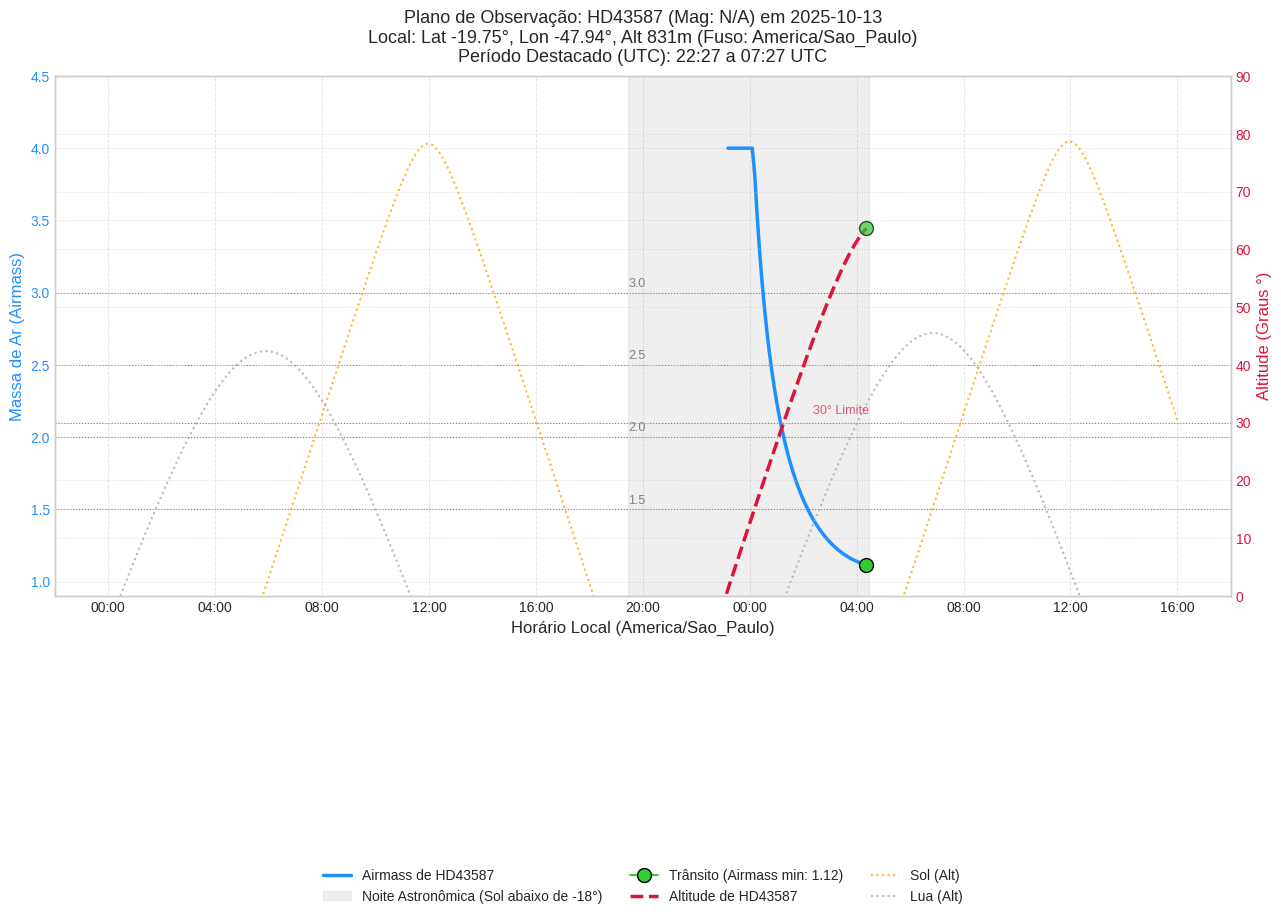

  Gráfico 1 (Visão Geral) gerado com sucesso!

  Criando o Gráfico 2 (Foco Apenas no Alvo)...


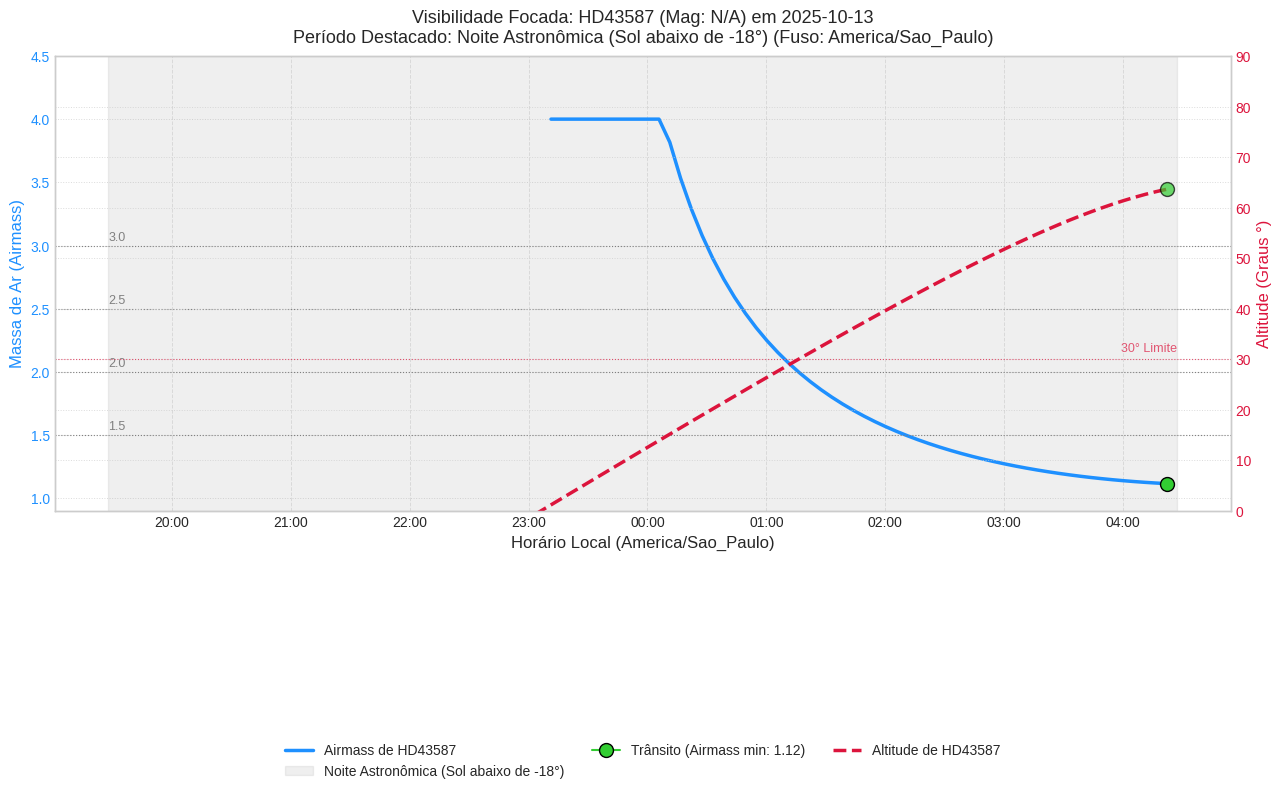

  Gráfico 2 (Foco no Alvo) gerado com sucesso!

Célula 9: Tentativa de geração de gráfico(s) para 'HD43587' concluída.


In [ ]:
# Célula 9: Desenhando os Gráficos, Explicando/Mostrando a Melhor Janela de Observação e Magnitude - ATUALIZADA

print(f"\n--- Preparando Análise Detalhada e Gráficos para '{selected_target_name}' em {analysis_date_local.strftime('%Y-%m-%d')} ---")

can_plot_flag = True
essential_vars_check = {
    'target_altaz_over_night': "Dados de altitude/azimute do alvo",
    'observing_times_local': "Horários locais para o gráfico",
    'observing_times_utc': "Horários UTC para cálculos",
    'observer_location': "Localização do observador",
    'observer_timezone': "Fuso horário do observador",
    'selected_target_name': "Nome do alvo selecionado",
    'selected_target_magnitude': "Magnitude do alvo selecionado", # Adicionada para impressão
    'analysis_date_local': "Data da análise",
}
# 'altitudes_deg_plot_original' e 'airmass_values_plot_original' serão definidas a partir de target_altaz_over_night
if 'target_altaz_over_night' in locals() and target_altaz_over_night is not None:
    altitudes_deg_plot_original = target_altaz_over_night.alt.to_value(u.deg)
    airmass_values_plot_original = target_altaz_over_night.secz
else:
    altitudes_deg_plot_original = None
    airmass_values_plot_original = None
essential_vars_check['altitudes_deg_plot_original'] = "Altitudes originais do alvo"
essential_vars_check['airmass_values_plot_original'] = "Valores de Airmass originais do alvo"


for var_name, description in essential_vars_check.items():
    if var_name not in locals() or locals()[var_name] is None:
        # A magnitude pode ser None, então não é um erro se for None, mas precisa existir.
        if var_name == 'selected_target_magnitude' and var_name in locals(): # Permite selected_target_magnitude ser None
            continue
        print(f"ATENÇÃO: Informação essencial ausente: '{description}' (variável '{var_name}' não definida ou é None).")
        can_plot_flag = False
        break

if not can_plot_flag:
    print("\nNão é possível calcular a janela observável ou gerar os gráficos devido a dados essenciais ausentes.")
else:
    # --- IMPRIMIR INFORMAÇÕES DO ALVO (INCLUINDO MAGNITUDE) ---
    print(f"\n  --- Informações do Alvo Selecionado: {selected_target_name} ---")
    if selected_target_magnitude is not None:
        print(f"    Magnitude (V ou similar): {selected_target_magnitude:.2f}")
    else:
        print(f"    Magnitude: N/A (não encontrada nos catálogos consultados)")

    # --- CÁLCULO E EXPLICAÇÃO DA JANELA OBSERVÁVEL IDEAL ---
    min_observable_altitude_for_window = 30 * u.deg
    _highlight_s_utc, _highlight_e_utc = None, None
    _night_type_for_window_explanation = "noite escura (não determinada)"

    if 'evening_astronomical_twilight' in locals() and evening_astronomical_twilight and \
       'morning_astronomical_twilight' in locals() and morning_astronomical_twilight and \
       morning_astronomical_twilight > evening_astronomical_twilight:
        _highlight_s_utc = evening_astronomical_twilight
        _highlight_e_utc = morning_astronomical_twilight
        _night_type_for_window_explanation = "Noite Astronômica (Sol abaixo de -18°)"
    elif 'sunset_time' in locals() and sunset_time and \
         'sunrise_time' in locals() and sunrise_time and \
         sunrise_time > sunset_time:
        _highlight_s_utc = sunset_time
        _highlight_e_utc = sunrise_time
        _night_type_for_window_explanation = "período do Pôr ao Nascer do Sol"

    print("\n  --- Entendendo a 'Janela Observável Ideal' ---")
    # ... (Bloco de explicação didática da janela, como na versão anterior) ...
    print(f"  A 'Janela Observável Ideal', que será detalhada abaixo para o alvo '{selected_target_name}',")
    print(f"  representa o período contínuo durante o qual as seguintes condições são importantes para uma boa observação:")
    print(f"    1. Condição de Escuridão: A observação ocorre dentro do principal período de '{_night_type_for_window_explanation}'.")
    print(f"    2. Boa Altitude do Alvo: Durante essa noite escura, o alvo '{selected_target_name}' também está acima de")
    print(f"       {min_observable_altitude_for_window.to_value(u.deg):.0f} graus de altitude em relação ao seu horizonte.")
    print(f"\n  Por que esses critérios são importantes?")
    print(f"  - Observar com o céu o mais escuro possível é crucial para conseguir ver objetos de brilho fraco.")
    print(f"  - Manter o alvo acima de {min_observable_altitude_for_window.to_value(u.deg):.0f}° ajuda a minimizar os efeitos negativos")
    print(f"    da atmosfera da Terra (como turbulência e a absorção da luz), o que geralmente resulta")
    print(f"    em imagens mais nítidas, estáveis e brilhantes.")
    print(f"  - Uma altitude de {min_observable_altitude_for_window.to_value(u.deg):.0f}° corresponde, de forma aproximada, a uma Massa de Ar (Airmass) de 2.")
    print(f"    (Lembre-se: Airmass é uma medida de quanta atmosfera a luz do objeto atravessa para chegar até você.")
    print(f"    O valor ideal de Airmass é 1 (quando o objeto está no zênite, diretamente acima). Valores menores são sempre melhores).")

    if _highlight_s_utc and _highlight_e_utc:
        mask_highlight_period = (observing_times_utc >= _highlight_s_utc) & (observing_times_utc <= _highlight_e_utc)
        mask_above_min_alt = altitudes_deg_plot_original >= min_observable_altitude_for_window.value
        is_truly_observable_mask = mask_highlight_period & mask_above_min_alt
        observable_indices = np.where(is_truly_observable_mask)[0]
        print(f"\n  --- Detalhes da Janela Observável Ideal para {selected_target_name} ---")
        if len(observable_indices) > 0:
            start_obs_idx, end_obs_idx = observable_indices[0], observable_indices[-1]
            start_obs_time_utc_obj, end_obs_time_utc_obj = observing_times_utc[start_obs_idx], observing_times_utc[end_obs_idx]
            start_obs_time_local_dt, end_obs_time_local_dt = start_obs_time_utc_obj.to_datetime(observer_timezone), end_obs_time_utc_obj.to_datetime(observer_timezone)
            duration_observable_hrs = (end_obs_time_utc_obj - start_obs_time_utc_obj).to(u.hour)
            print(f"    Início Janela: {start_obs_time_local_dt.strftime('%H:%M:%S')} Local ({start_obs_time_utc_obj.to_datetime(pytz.utc).strftime('%H:%M:%S')} UTC) no dia {start_obs_time_local_dt.strftime('%Y-%m-%d')}")
            print(f"    Fim Janela:    {end_obs_time_local_dt.strftime('%H:%M:%S')} Local ({end_obs_time_utc_obj.to_datetime(pytz.utc).strftime('%H:%M:%S')} UTC) no dia {end_obs_time_local_dt.strftime('%Y-%m-%d')}")
            print(f"    Duração Total Aproximada da Janela Observável: {duration_observable_hrs:.2f}")
        else:
            print(f"    O alvo '{selected_target_name}' não atinge {min_observable_altitude_for_window.value}° de altitude durante o período de '{_night_type_for_window_explanation}' definido para esta data.")
    else:
        print(f"\n  --- Detalhes da Janela Observável Ideal para {selected_target_name} ---")
        print("    Não foi possível determinar o período de noite escura para calcular a janela observável (verifique os cálculos da Célula 8).")

    try:
        # --- 1. Preparando os Dados para o Gráfico ---
        # ... (lógica de preparação de airmass_for_main_plot e altitudes_for_main_plot como na versão anterior) ...
        print("\n  Formatando dados para o gráfico principal...")
        highlight_start_utc_plot, highlight_end_utc_plot = _highlight_s_utc, _highlight_e_utc
        highlight_label_plot = _night_type_for_window_explanation if (_highlight_s_utc and _highlight_e_utc) else "Período de Observação Completo"
        if highlight_start_utc_plot and highlight_end_utc_plot:
            is_during_highlight_period_plot = (observing_times_utc >= highlight_start_utc_plot) & \
                                              (observing_times_utc <= highlight_end_utc_plot)
            altitudes_for_main_plot = np.where(is_during_highlight_period_plot, altitudes_deg_plot_original, np.nan)
            airmass_intermediate_main = np.where(is_during_highlight_period_plot, airmass_values_plot_original, np.nan)
        else:
            altitudes_for_main_plot = altitudes_deg_plot_original
            airmass_intermediate_main = airmass_values_plot_original
        valid_airmass_mask_main = (altitudes_deg_plot_original > 0) & np.isfinite(airmass_intermediate_main)
        airmass_for_main_plot = np.full_like(airmass_intermediate_main, np.nan)
        airmass_for_main_plot[valid_airmass_mask_main] = airmass_intermediate_main[valid_airmass_mask_main]
        max_airmass_display_on_plot = 4.0
        airmass_for_main_plot[airmass_for_main_plot > max_airmass_display_on_plot] = max_airmass_display_on_plot
        airmass_for_main_plot[airmass_for_main_plot < 1] = 1

        # --- GRÁFICO 1: COMPLETO / DIDÁTICO ---
        # ... (código de plotagem do Gráfico 1 como na sua última versão funcional, usando ax1.set_ylim(0.9, ...)) ...
        print("  Criando o Gráfico 1 (Visão Geral / Didático)...")
        fig1, ax1 = plt.subplots(figsize=(14, 8))
        color_airmass_line = 'dodgerblue'; ax1.set_xlabel(f"Horário Local ({observer_timezone.zone})", fontsize=12); ax1.set_ylabel('Massa de Ar (Airmass)', color=color_airmass_line, fontsize=12)
        ax1.plot(observing_times_local, airmass_for_main_plot, color=color_airmass_line, linestyle='-', linewidth=2.5, label=f'Airmass de {selected_target_name}')
        ax1.tick_params(axis='y', labelcolor=color_airmass_line); ax1.set_ylim(0.9, max_airmass_display_on_plot + 0.5)
        for val in [1.5, 2.0, 2.5, 3.0]:
            if val >=1: ax1.axhline(y=val, color='grey', linestyle=':', lw=0.8); ax1.text(observing_times_local[0], val + 0.02, str(val), color='grey', va='bottom', ha='left', fontsize=9)
        ax2 = ax1.twinx(); color_altitude_line = 'crimson'; ax2.set_ylabel('Altitude (Graus °)', color=color_altitude_line, fontsize=12)
        ax2.plot(observing_times_local, altitudes_for_main_plot, color=color_altitude_line, linestyle='--', linewidth=2.5, label=f'Altitude de {selected_target_name}')
        ax2.tick_params(axis='y', labelcolor=color_altitude_line); ax2.set_ylim(0, 90)
        ax2.axhline(y=30, color=color_altitude_line, linestyle=':', lw=0.8, alpha=0.7); ax2.text(observing_times_local[-1], 30 + 1, f'30° Limite', color=color_altitude_line, va='bottom', ha='right', fontsize=9, alpha=0.7)
        if 'time_grid_for_sun_moon' in locals() and time_grid_for_sun_moon is not None:
            _tgfsm_local = [t.to_datetime(timezone=observer_timezone) for t in time_grid_for_sun_moon]
            if 'sun_altaz_calculated' in locals() and sun_altaz_calculated is not None: ax2.plot(_tgfsm_local, sun_altaz_calculated.alt.to_value(u.deg), color='orange', ls=':', lw=1.5, label='Sol (Alt)', alpha=0.8)
            if 'moon_altaz_calculated' in locals() and moon_altaz_calculated is not None: ax2.plot(_tgfsm_local, moon_altaz_calculated.alt.to_value(u.deg), color='darkgrey', ls=':', lw=1.5, label='Lua (Alt)', alpha=0.8)
        if highlight_start_utc_plot and highlight_end_utc_plot:
            ax1.axvspan(highlight_start_utc_plot.to_datetime(timezone=observer_timezone), highlight_end_utc_plot.to_datetime(timezone=observer_timezone), alpha=0.12, color='grey', label=highlight_label_plot)

        if 'valid_airmass_mask_original' not in locals() and 'airmass_values_plot_original' in locals() and airmass_values_plot_original is not None: # Definir se não veio da primeira seção
             valid_airmass_mask_original = (altitudes_deg_plot_original > 0) & np.isfinite(airmass_values_plot_original)

        if np.any(~np.isnan(airmass_for_main_plot)):
            idx_min_airmass_plot = np.nanargmin(airmass_for_main_plot)
            time_of_min_airmass_plot_local_dt = observing_times_local[idx_min_airmass_plot]
            actual_min_airmass_plot_value = airmass_for_main_plot[idx_min_airmass_plot]
            altitude_at_min_airmass_plot = altitudes_for_main_plot[idx_min_airmass_plot]
            if actual_min_airmass_plot_value >=1:
                 ax1.plot(time_of_min_airmass_plot_local_dt, actual_min_airmass_plot_value, marker='o', ms=10, color='limegreen', mec='black', label=f'Trânsito (Airmass min: {actual_min_airmass_plot_value:.2f})')
                 ax2.plot(time_of_min_airmass_plot_local_dt, altitude_at_min_airmass_plot, marker='o', ms=10, color='limegreen', mec='black', alpha=0.7)

        if 'valid_airmass_mask_original' in locals() and np.any(valid_airmass_mask_original):
            _idx_true_min_airmass = np.nanargmin(np.where(valid_airmass_mask_original, airmass_values_plot_original, np.inf))
            if _idx_true_min_airmass < len(observing_times_local):
                _transit_time_local_print = observing_times_local[_idx_true_min_airmass]
                _transit_time_utc_print = observing_times_utc[_idx_true_min_airmass].to_datetime(pytz.utc)
                _altitude_at_transit_print = altitudes_deg_plot_original[_idx_true_min_airmass]
                _airmass_at_transit_print = airmass_values_plot_original[_idx_true_min_airmass]
                print(f"  Informação do Trânsito (Valores Reais): {selected_target_name} tem menor Airmass ({_airmass_at_transit_print:.2f}) "
                      f"e maior altitude ({_altitude_at_transit_print:.1f}°) em aprox. "
                      f"{_transit_time_local_print.strftime('%H:%M:%S')} Local ({_transit_time_utc_print.strftime('%H:%M:%S')} UTC).")
        else:
            print("  Não foi possível calcular a informação precisa do trânsito para impressão (valid_airmass_mask_original não disponível ou vazia).")

        from matplotlib.dates import DateFormatter
        ax1.xaxis.set_major_formatter(DateFormatter('%H:%M', tz=observer_timezone))
        title_utc_part_plot = ""
        if highlight_start_utc_plot and highlight_end_utc_plot:
            hs_utc_str = highlight_start_utc_plot.to_datetime(pytz.utc).strftime('%H:%M')
            he_utc_str = highlight_end_utc_plot.to_datetime(pytz.utc).strftime('%H:%M')
            title_utc_part_plot = f"\nPeríodo Destacado (UTC): {hs_utc_str} a {he_utc_str} UTC"

        # Adicionar Magnitude ao Título do Gráfico 1
        mag_str_title = f"(Mag: {selected_target_magnitude:.2f})" if selected_target_magnitude is not None else "(Mag: N/A)"
        plot_title1 = (f"Plano de Observação: {selected_target_name} {mag_str_title} em {analysis_date_local.strftime('%Y-%m-%d')}\n"
                      f"Local: Lat {observer_location.lat.deg:.2f}°, Lon {observer_location.lon.deg:.2f}°, Alt {observer_location.height.value:.0f}m (Fuso: {observer_timezone.zone}){title_utc_part_plot}")
        plt.title(plot_title1, fontsize=13, pad=10)
        handles1, labels1 = ax1.get_legend_handles_labels(); handles2, labels2 = ax2.get_legend_handles_labels()
        all_handles = handles1 + handles2; all_labels = labels1 + labels2
        for patch_obj in ax1.patches:
            if patch_obj.get_label() == highlight_label_plot :
                if patch_obj not in all_handles: all_handles.append(patch_obj); all_labels.append(patch_obj.get_label())
                break
        fig1.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10)
        plt.subplots_adjust(left=0.08, right=0.92, top=0.90, bottom=0.25)
        ax1.grid(True, which='major', axis='y', linestyle=':', linewidth=0.7, alpha=0.7)
        ax2.grid(True, which='major', axis='y', linestyle=':', linewidth=0.7, alpha=0.7)
        ax1.grid(True, which='major', axis='x', linestyle='--', linewidth=0.7, alpha=0.5)
        plt.show()
        print("  Gráfico 1 (Visão Geral) gerado com sucesso!")

        # --- GRÁFICO 2: APENAS O ALVO ---
        # ... (código de plotagem do Gráfico 2 como na sua última versão funcional, usando ax1_target.set_ylim(0.9, ...)) ...
        print("\n  Criando o Gráfico 2 (Foco Apenas no Alvo)...")
        fig2, ax1_target = plt.subplots(figsize=(14, 7))
        ax1_target.plot(observing_times_local, airmass_for_main_plot, color=color_airmass_line, linestyle='-', linewidth=2.5, label=f'Airmass de {selected_target_name}')
        ax1_target.set_xlabel(f"Horário Local ({observer_timezone.zone})", fontsize=12)
        ax1_target.set_ylabel('Massa de Ar (Airmass)', color=color_airmass_line, fontsize=12)
        ax1_target.tick_params(axis='y', labelcolor=color_airmass_line)
        ax1_target.set_ylim(0.9, max_airmass_display_on_plot + 0.5)
        for val in [1.5, 2.0, 2.5, 3.0]:
            if val >=1: ax1_target.axhline(y=val, color='grey', linestyle=':', lw=0.8); ax1_target.text(observing_times_local[0], val + 0.02, str(val), color='grey', va='bottom', ha='left', fontsize=9)
        ax2_target = ax1_target.twinx()
        ax2_target.plot(observing_times_local, altitudes_for_main_plot, color=color_altitude_line, linestyle='--', linewidth=2.5, label=f'Altitude de {selected_target_name}')
        ax2_target.set_ylabel('Altitude (Graus °)', color=color_altitude_line, fontsize=12)
        ax2_target.tick_params(axis='y', labelcolor=color_altitude_line)
        ax2_target.set_ylim(0, 90)
        ax2_target.axhline(y=30, color=color_altitude_line, linestyle=':', lw=0.8, alpha=0.7); ax2_target.text(observing_times_local[-1], 30 + 1, f'30° Limite', color=color_altitude_line, va='bottom', ha='right', fontsize=9, alpha=0.7)
        if highlight_start_utc_plot and highlight_end_utc_plot:
            ax1_target.axvspan(highlight_start_utc_plot.to_datetime(timezone=observer_timezone),
                               highlight_end_utc_plot.to_datetime(timezone=observer_timezone),
                               alpha=0.12, color='grey', label=highlight_label_plot)
        if np.any(~np.isnan(airmass_for_main_plot)):
            idx_min_airmass_plot = np.nanargmin(airmass_for_main_plot)
            time_of_min_airmass_plot_local_dt = observing_times_local[idx_min_airmass_plot]
            actual_min_airmass_plot_value = airmass_for_main_plot[idx_min_airmass_plot]
            altitude_at_min_airmass_plot = altitudes_for_main_plot[idx_min_airmass_plot]
            if actual_min_airmass_plot_value >=1:
                ax1_target.plot(time_of_min_airmass_plot_local_dt, actual_min_airmass_plot_value, marker='o', ms=10, color='limegreen', mec='black', label=f'Trânsito (Airmass min: {actual_min_airmass_plot_value:.2f})')
                ax2_target.plot(time_of_min_airmass_plot_local_dt, altitude_at_min_airmass_plot, marker='o', ms=10, color='limegreen', mec='black', alpha=0.7)

        ax1_target.xaxis.set_major_formatter(DateFormatter('%H:%M', tz=observer_timezone))
        # Adicionar Magnitude ao Título do Gráfico 2
        plot_title2 = (f"Visibilidade Focada: {selected_target_name} {mag_str_title} em {analysis_date_local.strftime('%Y-%m-%d')}\n"
                       f"Período Destacado: {highlight_label_plot} (Fuso: {observer_timezone.zone})")
        plt.title(plot_title2, fontsize=13, pad=10)
        handles_tg1, labels_tg1 = ax1_target.get_legend_handles_labels()
        handles_tg2, labels_tg2 = ax2_target.get_legend_handles_labels()
        all_handles_tg = handles_tg1 + handles_tg2; all_labels_tg = labels_tg1 + labels_tg2
        for patch_obj in ax1_target.patches:
            if patch_obj.get_label() == highlight_label_plot:
                if patch_obj not in all_handles_tg: all_handles_tg.append(patch_obj); all_labels_tg.append(patch_obj.get_label())
                break
        fig2.legend(all_handles_tg, all_labels_tg, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10)
        plt.subplots_adjust(left=0.08, right=0.92, top=0.90, bottom=0.25)
        ax1_target.grid(True, which='major', axis='y', linestyle=':', linewidth=0.7, alpha=0.7)
        ax2_target.grid(True, which='major', axis='y', linestyle=':', linewidth=0.7, alpha=0.7)
        ax1_target.grid(True, which='major', axis='x', linestyle='--', linewidth=0.7, alpha=0.5)
        plt.show()
        print("  Gráfico 2 (Foco no Alvo) gerado com sucesso!")

    except Exception as e_plot:
        print(f"Ocorreu um erro inesperado durante a geração do(s) gráfico(s): {e_plot}")
        import traceback
        traceback.print_exc()

print(f"\nCélula 9: Tentativa de geração de gráfico(s) para '{selected_target_name}' concluída.")

In [ ]:
# Célula 9B: Análise Noturna Detalhada para TODOS os Seus Alvos (Função de Plotagem Embutida) - COMPLETA

# Esta célula agora contém TUDO para a análise noturna de múltiplos alvos:
# 1. A definição da função que gera os gráficos detalhados para UM alvo.
# 2. A lógica para calcular os eventos solares da noite UMA VEZ.
# 3. A lógica para gerar a TABELA RESUMO para todos os alvos.
# 4. A lógica para, opcionalmente, chamar a função de plotagem e gerar os GRÁFICOS DETALHADOS para cada alvo.

# --- PASSO 1: DEFINIÇÃO DA FUNÇÃO DE PLOTAGEM DETALHADA (ANTIGA CÉLULA 9C) ---
# (Esta função é baseada na Célula 9 que gerou com sucesso os dois gráficos para um alvo)
def gerar_plots_detalhados_da_noite_para_alvo(
    p_target_name, p_target_magnitude,
    p_observing_times_local, p_observing_times_utc,
    p_altitudes_deg_plot_original, p_airmass_values_plot_original,
    p_observer_location, p_observer_timezone, p_analysis_date_local,
    p_highlight_s_utc, p_highlight_e_utc, p_highlight_label,
    p_sun_altaz_calculated, p_moon_altaz_calculated, p_time_grid_for_sun_moon,
    p_min_observable_altitude_for_window = 30 * u.deg
    ):
    """
    Gera os dois gráficos de visibilidade noturna (Geral e Focado) e imprime
    a Janela Observável Ideal e informações de Trânsito para UM alvo específico.
    """
    print(f"\n  ====================================================")
    print(f"  Gerando Detalhes e Gráficos para o Alvo: {p_target_name}")
    print(f"  ====================================================")

    print(f"\n    --- Informações do Alvo: {p_target_name} ---")
    if p_target_magnitude is not None: print(f"      Magnitude (V ou similar): {p_target_magnitude:.2f}")
    else: print(f"      Magnitude: N/A (não encontrada)")

    if p_highlight_s_utc and p_highlight_e_utc and p_altitudes_deg_plot_original is not None:
        mask_highlight = (p_observing_times_utc >= p_highlight_s_utc) & (p_observing_times_utc <= p_highlight_e_utc)
        mask_alt = p_altitudes_deg_plot_original >= p_min_observable_altitude_for_window.value
        observable_indices = np.where(mask_highlight & mask_alt)[0]
        print(f"\n    --- Janela Observável Ideal para {p_target_name} (acima de {p_min_observable_altitude_for_window.value}° durante '{p_highlight_label}') ---")
        if len(observable_indices) > 0:
            s_idx, e_idx = observable_indices[0], observable_indices[-1]
            s_utc, e_utc = p_observing_times_utc[s_idx], p_observing_times_utc[e_idx]
            s_loc, e_loc = s_utc.to_datetime(p_observer_timezone), e_utc.to_datetime(p_observer_timezone)
            dur_hrs = (e_utc - s_utc).to(u.hour)
            print(f"      Início: {s_loc.strftime('%H:%M:%S')} Local ({s_utc.to_datetime(pytz.utc).strftime('%H:%M:%S')} UTC) em {s_loc.strftime('%Y-%m-%d')}")
            print(f"      Fim:    {e_loc.strftime('%H:%M:%S')} Local ({e_utc.to_datetime(pytz.utc).strftime('%H:%M:%S')} UTC) em {e_loc.strftime('%Y-%m-%d')}")
            print(f"      Duração: {dur_hrs:.2f}")
        else: print(f"      O alvo não atinge {p_min_observable_altitude_for_window.value}° durante '{p_highlight_label}'.")
    else: print(f"    --- Janela Observável Ideal para {p_target_name} --- \n      Não foi possível definir período de noite escura.")

    if p_altitudes_deg_plot_original is None or p_airmass_values_plot_original is None:
        print("      Dados de altitude/airmass do alvo ausentes. Não é possível gerar gráficos.")
        return

    alt_plot = np.copy(p_altitudes_deg_plot_original)
    air_inter_plot = np.copy(p_airmass_values_plot_original)
    if p_highlight_s_utc and p_highlight_e_utc:
        is_highlight = (p_observing_times_utc >= p_highlight_s_utc) & (p_observing_times_utc <= p_highlight_e_utc)
        alt_plot[~is_highlight] = np.nan; air_inter_plot[~is_highlight] = np.nan

    valid_air_mask = (p_altitudes_deg_plot_original > 0) & np.isfinite(air_inter_plot)
    air_plot = np.full_like(air_inter_plot, np.nan); air_plot[valid_air_mask] = air_inter_plot[valid_air_mask]
    max_air_disp = 4.0; air_plot[air_plot > max_air_disp] = max_air_disp; air_plot[air_plot < 1] = 1

    print("    Gerando Gráfico 1 (Visão Geral)...")
    fig1, ax1 = plt.subplots(figsize=(14, 8))
    cAirmass = 'dodgerblue'; ax1.set_xlabel(f"Horário Local ({p_observer_timezone.zone})", fontsize=12); ax1.set_ylabel('Massa de Ar (Airmass)', color=cAirmass, fontsize=12)
    ax1.plot(p_observing_times_local, air_plot, color=cAirmass, ls='-', lw=2.5, label=f'Airmass de {p_target_name}')
    ax1.tick_params(axis='y', labelcolor=cAirmass); ax1.set_ylim(0.9, max_air_disp + 0.5)
    for v in [1.5, 2.0, 2.5, 3.0]:
        if v >=1: ax1.axhline(y=v, color='grey', ls=':', lw=0.8); ax1.text(p_observing_times_local[0], v + 0.02, str(v), color='grey', va='bottom', ha='left', fontsize=9)
    ax2 = ax1.twinx(); cAlt = 'crimson'; ax2.set_ylabel('Altitude (Graus °)', color=cAlt, fontsize=12)
    ax2.plot(p_observing_times_local, alt_plot, color=cAlt, ls='--', lw=2.5, label=f'Altitude de {p_target_name}')
    ax2.tick_params(axis='y', labelcolor=cAlt); ax2.set_ylim(0, 90)
    ax2.axhline(y=30, color=cAlt, ls=':', lw=0.8, alpha=0.7); ax2.text(p_observing_times_local[-1], 30 + 1, f'30° Limite', color=cAlt, va='bottom', ha='right', fontsize=9, alpha=0.7)
    if p_time_grid_for_sun_moon is not None:
        _tgfsm_local_f = [t.to_datetime(timezone=p_observer_timezone) for t in p_time_grid_for_sun_moon]
        if p_sun_altaz_calculated is not None: ax2.plot(_tgfsm_local_f, p_sun_altaz_calculated.alt.to_value(u.deg), color='orange', ls=':', lw=1.5, label='Sol (Alt)', alpha=0.8)
        if p_moon_altaz_calculated is not None: ax2.plot(_tgfsm_local_f, p_moon_altaz_calculated.alt.to_value(u.deg), color='darkgrey', ls=':', lw=1.5, label='Lua (Alt)', alpha=0.8)
    if p_highlight_s_utc and p_highlight_e_utc:
        ax1.axvspan(p_highlight_s_utc.to_datetime(timezone=p_observer_timezone), p_highlight_e_utc.to_datetime(timezone=p_observer_timezone), alpha=0.12, color='grey', label=p_highlight_label)

    # Trânsito no Gráfico 1
    if np.any(~np.isnan(air_plot)):
        idx_min_air_plot = np.nanargmin(air_plot)
        time_min_air_plot_loc_dt = p_observing_times_local[idx_min_air_plot]
        act_min_air_plot_val = air_plot[idx_min_air_plot]
        alt_at_min_air_plot = alt_plot[idx_min_air_plot]
        if act_min_air_plot_val >=1:
             ax1.plot(time_min_air_plot_loc_dt, act_min_air_plot_val, marker='o', ms=10, color='limegreen', mec='black', label=f'Trânsito (Airmass min: {act_min_air_plot_val:.2f})')
             ax2.plot(time_min_air_plot_loc_dt, alt_at_min_air_plot, marker='o', ms=10, color='limegreen', mec='black', alpha=0.7)

    # Informação do Trânsito (impressa)
    _valid_air_orig_f = (p_altitudes_deg_plot_original > 0) & np.isfinite(p_airmass_values_plot_original)
    if np.any(_valid_air_orig_f):
        _idx_true_min_air_f = np.nanargmin(np.where(_valid_air_orig_f, p_airmass_values_plot_original, np.inf))
        if _idx_true_min_air_f < len(p_observing_times_local):
            _trans_loc_f = p_observing_times_local[_idx_true_min_air_f]; _trans_utc_f = p_observing_times_utc[_idx_true_min_air_f].to_datetime(pytz.utc)
            _alt_trans_f = p_altitudes_deg_plot_original[_idx_true_min_air_f]; _air_trans_f = p_airmass_values_plot_original[_idx_true_min_air_f]
            print(f"    Informação do Trânsito (Valores Reais): {p_target_name} tem menor Airmass ({_air_trans_f:.2f}) "
                  f"e maior altitude ({_alt_trans_f:.1f}°) em aprox. "
                  f"{_trans_loc_f.strftime('%H:%M:%S')} Local ({_trans_utc_f.strftime('%H:%M:%S')} UTC).")
    else: print("    Não foi possível calcular info precisa do trânsito.")

    from matplotlib.dates import DateFormatter
    ax1.xaxis.set_major_formatter(DateFormatter('%H:%M', tz=p_observer_timezone))
    _title_utc_f = ""
    if p_highlight_s_utc and p_highlight_e_utc:
        _hs_utc_f = p_highlight_s_utc.to_datetime(pytz.utc).strftime('%H:%M'); _he_utc_f = p_highlight_e_utc.to_datetime(pytz.utc).strftime('%H:%M')
        _title_utc_f = f"\nPeríodo Destacado (UTC): {_hs_utc_f} a {_he_utc_f} UTC"
    _mag_title_f = f"(Mag: {p_target_magnitude:.2f})" if p_target_magnitude is not None else "(Mag: N/A)"
    _title1_f = (f"Plano de Observação: {p_target_name} {_mag_title_f} em {p_analysis_date_local.strftime('%Y-%m-%d')}\n"
                 f"Local: Lat {p_observer_location.lat.deg:.2f}°, Lon {p_observer_location.lon.deg:.2f}°, Alt {p_observer_location.height.value:.0f}m (Fuso: {p_observer_timezone.zone}){_title_utc_f}")
    plt.title(_title1_f, fontsize=13, pad=10)
    h1,l1=ax1.get_legend_handles_labels(); h2,l2=ax2.get_legend_handles_labels(); all_h=h1+h2; all_l=l1+l2
    for po in ax1.patches:
        if po.get_label()==p_highlight_label:
            if po not in all_h: all_h.append(po); all_l.append(po.get_label())
            break
    fig1.legend(all_h, all_l, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10)
    plt.subplots_adjust(left=0.08, right=0.92, top=0.90, bottom=0.25)
    ax1.grid(True,which='major',axis='y',ls=':',lw=0.7,alpha=0.7); ax2.grid(True,which='major',axis='y',ls=':',lw=0.7,alpha=0.7); ax1.grid(True,which='major',axis='x',ls='--',lw=0.7,alpha=0.5)
    plt.show()
    print(f"    Gráfico 1 (Visão Geral) para '{p_target_name}' gerado.")

    # --- GRÁFICO 2: APENAS O ALVO ---
    print("    Gerando Gráfico 2 (Foco no Alvo)...")
    fig2, ax1_target = plt.subplots(figsize=(14, 7))
    # ... (COPIAR O CÓDIGO DE PLOTAGEM DO GRÁFICO 2 DA CÉLULA 9 FUNCIONAL AQUI, adaptando p_*) ...
    ax1_target.plot(p_observing_times_local, air_plot, color=cAirmass, ls='-', lw=2.5, label=f'Airmass de {p_target_name}')
    ax1_target.set_xlabel(f"Horário Local ({p_observer_timezone.zone})", fontsize=12); ax1_target.set_ylabel('Massa de Ar (Airmass)', color=cAirmass, fontsize=12)
    ax1_target.tick_params(axis='y', labelcolor=cAirmass); ax1_target.set_ylim(0.9, max_air_disp + 0.5)
    for v in [1.5,2.0,2.5,3.0]:
        if v>=1: ax1_target.axhline(y=v,color='grey',ls=':',lw=0.8); ax1_target.text(p_observing_times_local[0],v+0.02,str(v),color='grey',va='bottom',ha='left',fontsize=9)
    ax2_target=ax1_target.twinx()
    ax2_target.plot(p_observing_times_local, alt_plot, color=cAlt, ls='--', lw=2.5, label=f'Altitude de {p_target_name}')
    ax2_target.set_ylabel('Altitude (Graus °)',color=cAlt,fontsize=12); ax2_target.tick_params(axis='y',labelcolor=cAlt); ax2_target.set_ylim(0,90)
    ax2_target.axhline(y=30,color=cAlt,ls=':',lw=0.8,alpha=0.7); ax2_target.text(p_observing_times_local[-1],30+1,f'30° Limite',color=cAlt,va='bottom',ha='right',fontsize=9,alpha=0.7)
    if p_highlight_s_utc and p_highlight_e_utc:
        ax1_target.axvspan(p_highlight_s_utc.to_datetime(timezone=p_observer_timezone), p_highlight_e_utc.to_datetime(timezone=p_observer_timezone), alpha=0.12,color='grey',label=p_highlight_label)
    if np.any(~np.isnan(air_plot)):
        idx_min_air_plot = np.nanargmin(air_plot)
        time_min_air_plot_loc_dt = p_observing_times_local[idx_min_air_plot]
        act_min_air_plot_val = air_plot[idx_min_air_plot]
        alt_at_min_air_plot = alt_plot[idx_min_air_plot]
        if act_min_air_plot_val >=1:
            ax1_target.plot(time_min_air_plot_loc_dt, act_min_air_plot_val, marker='o',ms=10,color='limegreen',mec='black',label=f'Trânsito (Airmass min: {act_min_air_plot_val:.2f})')
            ax2_target.plot(time_min_air_plot_loc_dt, alt_at_min_air_plot, marker='o',ms=10,color='limegreen',mec='black',alpha=0.7)
    ax1_target.xaxis.set_major_formatter(DateFormatter('%H:%M', tz=p_observer_timezone))
    _title2_f = (f"Visibilidade Focada: {p_target_name} {_mag_title_f} em {p_analysis_date_local.strftime('%Y-%m-%d')}\n"
                 f"Período Destacado: {p_highlight_label} (Fuso: {p_observer_timezone.zone})")
    plt.title(_title2_f, fontsize=13, pad=10)
    h_tg1,l_tg1=ax1_target.get_legend_handles_labels(); h_tg2,l_tg2=ax2_target.get_legend_handles_labels(); all_h_tg=h_tg1+h_tg2; all_l_tg=l_tg1+l_tg2
    for po in ax1_target.patches:
        if po.get_label()==p_highlight_label:
            if po not in all_h_tg: all_h_tg.append(po); all_l_tg.append(po.get_label())
            break
    fig2.legend(all_h_tg,all_l_tg,loc='lower center',bbox_to_anchor=(0.5,-0.15),ncol=3,fontsize=10)
    plt.subplots_adjust(left=0.08,right=0.92,top=0.90,bottom=0.25)
    ax1_target.grid(True,which='major',axis='y',ls=':',lw=0.7,alpha=0.7); ax2_target.grid(True,which='major',axis='y',ls=':',lw=0.7,alpha=0.7); ax1_target.grid(True,which='major',axis='x',ls='--',lw=0.7,alpha=0.5)
    plt.show()
    print(f"    Gráfico 2 (Foco no Alvo) para '{p_target_name}' gerado.")
    print(f"  --------------------------------------------------") # Separador visual
# --- FIM DA FUNÇÃO DE PLOTAGEM ---

# --- INÍCIO DA LÓGICA PRINCIPAL DA CÉLULA 9B ---
print(f"\n--- Iniciando Análise Noturna Detalhada para Múltiplos Alvos ---")
print(f"Data da Análise: {analysis_date_local.strftime('%Y-%m-%d')}")

essential_vars_for_9b_check = {
    'targets_coords_dict': "Dicionário de todos os alvos carregados (da Célula 6)",
    'analysis_date_local': "Data específica para esta análise noturna (da Célula 7)",
    'observer_location': "Sua localização de observação (da Célula 3)",
    'observer_timezone': "Seu fuso horário local (da Célula 3)",
    'GET_SUN_MOON_USABLE': "Flag se podemos calcular Sol/Lua (da Célula 1)",
    'actual_get_sun_function': "Função para obter posição do Sol (da Célula 1)"
}
CAN_PROCEED_MULTIPLE = True
# ... (bloco de verificação de essential_vars_for_9b_check e find_event_time como na sua última versão funcional) ...
for var_name, description in essential_vars_for_9b_check.items():
    if var_name == 'GET_SUN_MOON_USABLE':
        if var_name not in locals(): CAN_PROCEED_MULTIPLE = False; print(f"ATENÇÃO: Variável '{var_name}' não definida.") ; break
    elif var_name == 'actual_get_sun_function':
        if var_name not in locals() and (locals().get('GET_SUN_MOON_USABLE') == True) : CAN_PROCEED_MULTIPLE = False; print(f"ATENÇÃO: Variável '{var_name}' não definida.") ; break
    elif var_name not in locals() or locals()[var_name] is None:
        print(f"ATENÇÃO: Informação essencial '{description}' (variável '{var_name}') não definida ou é None.")
        CAN_PROCEED_MULTIPLE = False; break
if 'find_event_time' not in globals():
    print("ATENÇÃO CRÍTICA: Função 'find_event_time' não definida. Execute a Célula 8."); CAN_PROCEED_MULTIPLE = False


if 'targets_coords_dict' in locals() and targets_coords_dict and CAN_PROCEED_MULTIPLE:
    print(f"Alvos a serem analisados: {', '.join(targets_coords_dict.keys())}")

    _sun_altaz_for_night_multi, _moon_altaz_calculated_multi = None, None
    _evening_twilight_multi, _morning_twilight_multi = None, None
    _highlight_s_utc_multi, _highlight_e_utc_multi = None, None
    _night_type_label_multi = "Noite Escura (não determinada)"
    _time_grid_sun_multi_for_plots = None

    if GET_SUN_MOON_USABLE and actual_get_sun_function:
        print("\n  Calculando eventos solares e período de noite escura para a data de análise...")
        # ... (lógica completa para calcular _highlight_s_utc_multi, _highlight_e_utc_multi,
        #      _night_type_label_multi, _sun_altaz_for_night_multi, _moon_altaz_calculated_multi,
        #      _time_grid_sun_multi_for_plots - como na sua Célula 9B funcional anterior) ...
        _midnight_local_dt_multi = observer_timezone.localize(datetime.combine(analysis_date_local, datetime.min.time()))
        _start_time_sun_multi = Time(_midnight_local_dt_multi)
        _hours_grid_sun = 40; _points_grid_sun = int(_hours_grid_sun * 15)
        _time_grid_sun_multi_for_plots = _start_time_sun_multi + np.linspace(0, _hours_grid_sun, _points_grid_sun) * u.hour
        try:
            _sun_icrs_multi = actual_get_sun_function(_time_grid_sun_multi_for_plots)
            _altaz_frame_sun_multi = AltAz(obstime=_time_grid_sun_multi_for_plots, location=observer_location)
            _sun_altaz_for_night_multi = _sun_icrs_multi.transform_to(_altaz_frame_sun_multi)
            if actual_get_moon_function:
                 try:
                    _moon_icrs_multi = actual_get_moon_function(_time_grid_sun_multi_for_plots)
                    _moon_altaz_calculated_multi = _moon_icrs_multi.transform_to(_altaz_frame_sun_multi)
                 except Exception as e_moon_calc: print(f"  Aviso: não foi possível calcular dados da Lua: {e_moon_calc}")
            _evening_twilight_multi = find_event_time(_sun_altaz_for_night_multi.alt, _time_grid_sun_multi_for_plots, -18*u.deg, direction="setting")
            _morning_twilight_candidate_multi = find_event_time(_sun_altaz_for_night_multi.alt, _time_grid_sun_multi_for_plots, -18*u.deg, direction="rising")
            if _evening_twilight_multi and _morning_twilight_candidate_multi:
                if _morning_twilight_candidate_multi > _evening_twilight_multi: _morning_twilight_multi = _morning_twilight_candidate_multi
                else:
                    _mask_after_evening = _time_grid_sun_multi_for_plots > _evening_twilight_multi
                    if np.any(_mask_after_evening): _morning_twilight_multi = find_event_time(_sun_altaz_for_night_multi[_mask_after_evening].alt, _time_grid_sun_multi_for_plots[_mask_after_evening], -18*u.deg, direction="rising")
            elif _morning_twilight_candidate_multi: _morning_twilight_multi = _morning_twilight_candidate_multi
            if _evening_twilight_multi and _morning_twilight_multi and _morning_twilight_multi > _evening_twilight_multi:
                _highlight_s_utc_multi, _highlight_e_utc_multi = _evening_twilight_multi, _morning_twilight_multi; _night_type_label_multi = "Noite Astronômica (Sol < -18°)"
            else:
                _sunset_multi_calc_s8 = find_event_time(_sun_altaz_for_night_multi.alt, _time_grid_sun_multi_for_plots, 0*u.deg, direction="setting") # Renomeado para evitar conflito com Cell 8 global
                _sunrise_candidate_multi_calc_s8 = find_event_time(_sun_altaz_for_night_multi.alt, _time_grid_sun_multi_for_plots, 0*u.deg, direction="rising")
                _sunrise_multi_calc_s8 = None
                if _sunset_multi_calc_s8 and _sunrise_candidate_multi_calc_s8:
                    if _sunrise_candidate_multi_calc_s8 > _sunset_multi_calc_s8: _sunrise_multi_calc_s8 = _sunrise_candidate_multi_calc_s8
                    else:
                        _mask_after_sunset_calc_s8 = _time_grid_sun_multi_for_plots > _sunset_multi_calc_s8
                        if np.any(_mask_after_sunset_calc_s8): _sunrise_multi_calc_s8 = find_event_time(_sun_altaz_for_night_multi[_mask_after_sunset_calc_s8].alt, _time_grid_sun_multi_for_plots[_mask_after_sunset_calc_s8], 0*u.deg, direction="rising")
                elif _sunrise_candidate_multi_calc_s8: _sunrise_multi_calc_s8 = _sunrise_candidate_multi_calc_s8
                if _sunset_multi_calc_s8 and _sunrise_multi_calc_s8 and _sunrise_multi_calc_s8 > _sunset_multi_calc_s8:
                    _highlight_s_utc_multi, _highlight_e_utc_multi = _sunset_multi_calc_s8, _sunrise_multi_calc_s8; _night_type_label_multi = "Pôr ao Nascer do Sol"
            if _highlight_s_utc_multi and _highlight_e_utc_multi: print(f"  Período de noite escura ('{_night_type_label_multi}') definido: {_highlight_s_utc_multi.to_datetime(observer_timezone).strftime('%H:%M')} a {_highlight_e_utc_multi.to_datetime(observer_timezone).strftime('%H:%M')} Local.")
            else: print("  AVISO: Não foi possível definir período de noite escura."); CAN_PROCEED_MULTIPLE = False
        except Exception as e: print(f"  ERRO ao calcular eventos solares: {e}"); CAN_PROCEED_MULTIPLE = False
    else: print("  AVISO: Funções Sol/Lua indisponíveis."); CAN_PROCEED_MULTIPLE = False

    if CAN_PROCEED_MULTIPLE and _highlight_s_utc_multi and _highlight_e_utc_multi:
        # --- Tabela Resumo (como na sua última versão funcional) ---
        print("\n--- Gerando Tabela Resumo da Visibilidade Noturna para Todos os Alvos ---")
        # ... (código da tabela resumo aqui, como antes) ...
        summary_data_list = []
        min_alt_for_window_multi = 30 * u.deg
        _night_duration_multi = (_highlight_e_utc_multi - _highlight_s_utc_multi)
        if _night_duration_multi.to_value(u.hour) > 0:
            _obs_times_night_utc_multi = _highlight_s_utc_multi + np.linspace(0, _night_duration_multi.to_value(u.hour), 100) * u.hour
            for target_name, target_data_entry in tqdm(targets_coords_dict.items(), desc="Analisando alvos para tabela resumo"):
                target_skycoord = target_data_entry['coord']; target_magnitude = target_data_entry['magnitude']
                if target_skycoord is None: continue
                _altaz_frame_target = AltAz(obstime=_obs_times_night_utc_multi, location=observer_location)
                _target_altaz_night = target_skycoord.transform_to(_altaz_frame_target)
                _target_altitudes_original_tbl = _target_altaz_night.alt.to_value(u.deg)
                _target_airmass_original_tbl = _target_altaz_night.secz
                max_alt_this_night = np.nanmax(_target_altitudes_original_tbl)
                transit_time_local_str, transit_alt_str, transit_airmass_str = "N/A", "N/A", "N/A"
                if max_alt_this_night > -5:
                    idx_max_alt = np.nanargmax(_target_altitudes_original_tbl)
                    transit_time_utc_obj = _obs_times_night_utc_multi[idx_max_alt]
                    transit_time_local_str = transit_time_utc_obj.to_datetime(observer_timezone).strftime('%H:%M')
                    transit_alt_str = f"{_target_altitudes_original_tbl[idx_max_alt]:.1f}"
                    airmass_at_transit = _target_airmass_original_tbl[idx_max_alt]
                    if np.isfinite(airmass_at_transit) and airmass_at_transit >=1 : transit_airmass_str = f"{airmass_at_transit:.2f}"
                    else: transit_airmass_str = "-"
                _mask_above_min_alt_multi = _target_altitudes_original_tbl >= min_alt_for_window_multi.value
                _observable_indices_multi = np.where(_mask_above_min_alt_multi)[0]
                win_start_str, win_end_str, win_dur_str = "N/A", "N/A", "0.00h"
                duration_numeric_for_check = 0.0
                if len(_observable_indices_multi) > 0:
                    _start_obs_utc = _obs_times_night_utc_multi[_observable_indices_multi[0]]
                    _end_obs_utc = _obs_times_night_utc_multi[_observable_indices_multi[-1]]
                    win_start_str = _start_obs_utc.to_datetime(observer_timezone).strftime('%H:%M')
                    win_end_str = _end_obs_utc.to_datetime(observer_timezone).strftime('%H:%M')
                    duration_numeric_for_check = (_end_obs_utc - _start_obs_utc).to_value(u.hour)
                    win_dur_str = f"{duration_numeric_for_check:.2f}h"
                is_target_observable_str = "Sim" if duration_numeric_for_check > 0.05 else "Não"
                summary_data_list.append({
                    "Alvo": target_name, "Mag (aprox)": f"{target_magnitude:.2f}" if target_magnitude is not None else "N/A",
                    "Alt Máx (°)" : f"{max_alt_this_night:.1f}", f"Trânsito ({observer_timezone.zone})": transit_time_local_str,
                    "Alt Trânsito (°)": transit_alt_str, "Airmass Trânsito": transit_airmass_str,
                    f"Observável (> {min_alt_for_window_multi.value}°?)": is_target_observable_str,
                    f"Janela Início" : win_start_str, f"Janela Fim" : win_end_str, f"Duração Janela" : win_dur_str
                })
            if summary_data_list:
                summary_df = pd.DataFrame(summary_data_list)
                summary_df["Alt Máx (°)"] = pd.to_numeric(summary_df["Alt Máx (°)"], errors='coerce')
                summary_df['Duração Num (h)_sort'] = summary_df["Duração Janela"].str.replace('h', '').astype(float)
                summary_df = summary_df.sort_values(by=[f"Observável (> {min_alt_for_window_multi.value}°?)", "Alt Máx (°)", "Duração Num (h)_sort"], ascending=[False, False, False])
                summary_df = summary_df.drop(columns=["Duração Num (h)_sort"])
                print("\n--- Tabela Resumo da Visibilidade dos Alvos para a Noite ---")
                print(f"Data: {analysis_date_local.strftime('%Y-%m-%d')}, Período Escuro ('{_night_type_label_multi}'): {_highlight_s_utc_multi.to_datetime(observer_timezone).strftime('%H:%M')} - {_highlight_e_utc_multi.to_datetime(observer_timezone).strftime('%H:%M')} Local")
                print(f"Critério para 'Observável': Duração da janela acima de 30° > 3 minutos durante o período escuro.")
                with pd.option_context('display.max_rows', len(summary_df) + 1, 'display.max_columns', None, 'display.width', 150, 'display.colheader_justify', 'center'):
                    print(summary_df)
            else: print("Nenhum dado para gerar a tabela resumo.")
        else: print("  Duração da noite escura é zero ou negativa. Tabela resumo não pode ser gerada.")

        # --- Parte 2: Gráficos Sequenciais Detalhados ---
        print("\n--- Geração dos Gráficos Detalhados Individuais ---")
        while True:
            choice_plots = input("Deseja gerar os gráficos detalhados para cada alvo? (Pode demorar) [S/N]: ").strip().upper()
            if choice_plots in ['S', 'N']: break
            print("Opção inválida. Digite S ou N.")

        if choice_plots == 'S':
            if 'gerar_plots_detalhados_da_noite_para_alvo' not in globals():
                print("ATENÇÃO: A função 'gerar_plots_detalhados_da_noite_para_alvo' não foi definida (deveria estar no topo desta célula).")
                print("Os gráficos sequenciais não podem ser gerados.")
            elif _night_duration_multi.to_value(u.hour) <= 0 : # Verifica novamente se temos noite válida
                 print("  Duração da noite escura é zero ou negativa. Não é possível gerar gráficos detalhados.")
            else:
                for target_name_plot, target_data_entry_plot in tqdm(targets_coords_dict.items(), desc="Gerando gráficos detalhados"):
                    current_selected_target_coord = target_data_entry_plot['coord']
                    current_selected_target_magnitude = target_data_entry_plot['magnitude']
                    if current_selected_target_coord is None: continue

                    # A Célula 9C (agora função) espera os dados de trajetória já calculados para o alvo.
                    # _obs_times_night_utc_multi é o grid de tempo para a noite inteira.
                    _altaz_frame_plot_current = AltAz(obstime=_obs_times_night_utc_multi, location=observer_location)
                    current_target_altaz_over_night = current_selected_target_coord.transform_to(_altaz_frame_plot_current)
                    current_observing_times_local = [t.to_datetime(timezone=observer_timezone) for t in _obs_times_night_utc_multi]
                    current_altitudes_deg_plot_original = current_target_altaz_over_night.alt.to_value(u.deg)
                    current_airmass_values_plot_original = current_target_altaz_over_night.secz

                    try:
                        gerar_plots_detalhados_da_noite_para_alvo(
                            p_target_name=target_name_plot,
                            p_target_magnitude=current_selected_target_magnitude,
                            p_observing_times_local=current_observing_times_local,
                            p_observing_times_utc=_obs_times_night_utc_multi,
                            p_altitudes_deg_plot_original=current_altitudes_deg_plot_original,
                            p_airmass_values_plot_original=current_airmass_values_plot_original,
                            p_observer_location=observer_location,
                            p_observer_timezone=observer_timezone,
                            p_analysis_date_local=analysis_date_local,
                            p_highlight_s_utc=_highlight_s_utc_multi,
                            p_highlight_e_utc=_highlight_e_utc_multi,
                            p_highlight_label=_night_type_label_multi,
                            p_sun_altaz_calculated=_sun_altaz_for_night_multi,
                            p_moon_altaz_calculated=_moon_altaz_calculated_multi,
                            p_time_grid_for_sun_moon=_time_grid_sun_multi_for_plots
                        )
                    except Exception as e_plot_loop_target:
                        print(f"  ERRO ao gerar gráficos para {target_name_plot}: {e_plot_loop_target}")
                        import traceback; traceback.print_exc()
        else:
            print("  Geração de gráficos detalhados individuais foi pulada.")
    else:
        print("\nAnálise noturna para múltiplos alvos não pôde prosseguir porque o período de noite escura não foi definido ou outras configurações essenciais falharam.")
else:
    print("\nAnálise noturna para múltiplos alvos não pôde ser iniciada devido a dados ou configurações ausentes na inicialização desta célula.")

print(f"\nCélula 9B: Análise noturna para múltiplos alvos (data: {analysis_date_local.strftime('%Y-%m-%d') if 'analysis_date_local' in locals() and analysis_date_local else 'N/A'}) concluída.")


--- Iniciando Análise Noturna Detalhada para Múltiplos Alvos ---
Data da Análise: 2025-10-13
Alvos a serem analisados: HD43587, Vega, HD146233

  Calculando eventos solares e período de noite escura para a data de análise...
  Período de noite escura ('Noite Astronômica (Sol < -18°)') definido: 19:27 a 04:27 Local.

--- Gerando Tabela Resumo da Visibilidade Noturna para Todos os Alvos ---


Analisando alvos para tabela resumo:   0%|          | 0/3 [00:00<?, ?it/s]


--- Tabela Resumo da Visibilidade dos Alvos para a Noite ---
Data: 2025-10-13, Período Escuro ('Noite Astronômica (Sol < -18°)'): 19:27 - 04:27 Local
Critério para 'Observável': Duração da janela acima de 30° > 3 minutos durante o período escuro.
     Alvo   Mag (aprox)  Alt Máx (°) Trânsito (America/Sao_Paulo) Alt Trânsito (°) Airmass Trânsito Observável (> 30.0°?) Janela Início Janela Fim  \
0   HD43587      N/A        64.0                 04:27                  64.0             1.11                 Sim              01:16       04:27     
1      Vega      N/A        24.1                 19:27                  24.1             2.45                 Não                N/A         N/A     
2  HD146233      N/A        23.9                 19:27                  23.9             2.47                 Não                N/A         N/A     

  Duração Janela  
0      3.18h      
1      0.00h      
2      0.00h      

--- Geração dos Gráficos Detalhados Individuais ---
Deseja gerar os gráfic

In [ ]:
# Célula 10: Definindo a Função para Analisar a Visibilidade de um Alvo ao Longo do Ano Inteiro

# Até agora, focamos em analisar a visibilidade de um alvo para UMA noite específica.
# Mas e se quisermos saber quais são as MELHORES ÉPOCAS DO ANO para observar esse alvo?
# Esta Célula 10 define uma função poderosa chamada 'analyze_year_visibility'.
# Ela vai varrer cada noite do ano e coletar dados importantes sobre a visibilidade do alvo.
# A Célula 11 (que virá depois) usará esta função para mostrar os resultados.

from tqdm.auto import tqdm # Para uma barra de progresso amigável, pois isso pode demorar.
import pandas as pd       # Para exibir os resultados da análise anual em uma tabela bonita.

def analyze_year_visibility(target_skycoord_obj, target_name_str,
                            observer_loc_obj, observer_tz_obj,
                            year_to_analyze,
                            min_altitude_threshold=30*u.deg,
                            points_per_night_sampling=60): # 60 pontos = amostra a cada ~10-12 min para noites de 10-12h
    """
    Analisa a visibilidade de um alvo celeste ao longo de um ano inteiro, noite por noite.

    Como funciona:
    - Itera por cada dia do ano especificado.
    - Para cada dia, calcula os horários dos crepúsculos astronômicos (início e fim da noite escura).
    - Se houver noite escura, calcula a trajetória do alvo (altitude) durante essa noite.
    - Registra métricas importantes:
        - Altitude máxima que o alvo atinge.
        - Duração (em horas) que o alvo permanece acima de 'min_altitude_threshold'.
        - Horário do trânsito do alvo (quando atinge a maior altitude).
        - Início e fim da janela observável (quando está acima do limiar de altitude e escuro).
    - Retorna uma tabela (DataFrame do Pandas) com essas métricas para todas as noites em que o alvo é observável.

    Argumentos:
        target_skycoord_obj (SkyCoord): O objeto SkyCoord do alvo (apenas as coordenadas).
        target_name_str (str): O nome do alvo (para os prints e título).
        observer_loc_obj (EarthLocation): A localização do observador.
        observer_tz_obj (pytz.timezone): O fuso horário do observador.
        year_to_analyze (int): O ano para o qual a análise será feita.
        min_altitude_threshold (Astropy Quantity): Altitude mínima para considerar o alvo observável.
        points_per_night_sampling (int): Número de pontos de tempo para amostrar cada noite
                                         (afeta a precisão da duração e o tempo de cálculo).

    Retorna:
        pandas.DataFrame: DataFrame com as métricas de visibilidade para as noites observáveis,
                          ordenado pelas melhores noites.
        pandas.DataFrame: DataFrame com os dados de todas as noites analisadas (para plotagem anual).
    """
    print(f"\n--- Analisando Visibilidade Anual para o Alvo: {target_name_str} (Ano: {year_to_analyze}) ---")
    print(f"Critério de altitude para 'bem observável': Acima de {min_altitude_threshold.to_value(u.deg):.0f}° durante a noite escura.")
    print(f"Usando {points_per_night_sampling} pontos de amostragem por noite. Isso pode levar alguns minutos...")

    # Lista para guardar os dados de cada noite analisada.
    all_nights_data_list = []

    # Define as datas de início e fim do ano.
    first_day_of_year = date(year_to_analyze, 1, 1)
    last_day_of_year = date(year_to_analyze, 12, 31)
    total_days_in_year = (last_day_of_year - first_day_of_year).days + 1

    # A função 'find_event_time' foi definida na Célula 8. Precisamos dela aqui.
    # Para garantir, podemos copiá-la ou certificar que a Célula 8 foi executada.
    # Vamos assumir que ela está disponível no escopo global.
    # (Se der NameError para find_event_time, copie a definição dela da Célula 8 para cá).

    # Loop por cada dia do ano (com uma barra de progresso da 'tqdm').
    for day_offset in tqdm(range(total_days_in_year), desc=f"Processando noites para {target_name_str}"):
        current_analysis_date_local = first_day_of_year + timedelta(days=day_offset)

        # Configura o tempo para cálculo dos eventos solares neste dia.
        midnight_local_dt_current = observer_tz_obj.localize(datetime.combine(current_analysis_date_local, datetime.min.time()))
        start_time_for_sun_calc_current = Time(midnight_local_dt_current)

        # Grid de tempo estendido para garantir que pegamos todos os eventos solares da noite.
        # (da meia-noite local por 40 horas, como na Célula 8 corrigida).
        hours_in_sun_grid = 40
        points_in_sun_grid = int(hours_in_sun_grid * 15) # ~1 ponto a cada 4 min
        time_grid_for_sun_current = start_time_for_sun_calc_current + np.linspace(0, hours_in_sun_grid, points_in_sun_grid) * u.hour

        sun_altaz_for_current_night = None
        if GET_SUN_MOON_USABLE and actual_get_sun_function: # Verifica se podemos usar a função do Sol.
            try:
                sun_icrs_current = actual_get_sun_function(time_grid_for_sun_current)
                altaz_frame_current = AltAz(obstime=time_grid_for_sun_current, location=observer_loc_obj)
                sun_altaz_for_current_night = sun_icrs_current.transform_to(altaz_frame_current)
            except Exception as e_sun_calc_annual:
                # Se falhar em um dia, imprime aviso mas tenta continuar para outros dias.
                # print(f"  Aviso: Falha ao calcular posição do Sol para {current_analysis_date_local}. Erro: {e_sun_calc_annual}")
                pass # Continua para o próximo dia.

        if sun_altaz_for_current_night is None: # Se não pudemos calcular o Sol, não podemos definir a noite.
            continue # Pula para o próximo dia.

        # Calcular crepúsculos astronômicos para a noite.
        evening_twilight_current = find_event_time(sun_altaz_for_current_night.alt, time_grid_for_sun_current, -18*u.deg, direction="setting")
        morning_twilight_candidate = find_event_time(sun_altaz_for_current_night.alt, time_grid_for_sun_current, -18*u.deg, direction="rising")

        morning_twilight_current = None
        if evening_twilight_current and morning_twilight_candidate:
            if morning_twilight_candidate > evening_twilight_current:
                morning_twilight_current = morning_twilight_candidate
            else:
                mask_after_evening = time_grid_for_sun_current > evening_twilight_current
                if np.any(mask_after_evening):
                    morning_twilight_current = find_event_time(sun_altaz_for_current_night[mask_after_evening].alt,
                                                              time_grid_for_sun_current[mask_after_evening],
                                                              -18*u.deg, direction="rising")
        elif morning_twilight_candidate: # Caso raro: sem crepúsculo vespertino mas com matutino
             morning_twilight_current = morning_twilight_candidate


        if not (evening_twilight_current and morning_twilight_current and morning_twilight_current > evening_twilight_current):
            # Se não há noite astronômica definida ou ela é inválida, guardamos NaN para este dia e continuamos.
            all_nights_data_list.append({
                "Data": current_analysis_date_local.strftime('%Y-%m-%d'),
                "Dia da Semana": current_analysis_date_local.strftime('%a'),
                "Max Alt (°)": np.nan, # Sem dados válidos
                "Trânsito (Local)": "N/A",
                f"Duração > {min_altitude_threshold.value}° (h)": 0.0,
                f"Janela Início ({min_altitude_threshold.value}°)": "N/A",
                f"Janela Fim ({min_altitude_threshold.value}°)": "N/A",
                "Noite Escura Início (Local)": "N/A",
                "Noite Escura Fim (Local)": "N/A",
            })
            continue # Pula para o próximo dia.

        # Se temos uma noite astronômica válida:
        night_duration_current = (morning_twilight_current - evening_twilight_current)

        # Tempos de observação durante esta noite escura.
        obs_times_this_night_utc = evening_twilight_current + np.linspace(0, night_duration_current.to_value(u.hour), points_per_night_sampling) * u.hour

        # Calcular altitudes do alvo nesta noite.
        altaz_frame_target_this_night = AltAz(obstime=obs_times_this_night_utc, location=observer_loc_obj)
        target_altitudes_this_night = target_skycoord_obj.transform_to(altaz_frame_target_this_night).alt

        # Métricas da noite para o alvo:
        max_alt_this_night = np.max(target_altitudes_this_night)

        # Duração acima do limiar de altitude.
        is_above_threshold_this_night = target_altitudes_this_night >= min_altitude_threshold
        # time_step_hours = night_duration_current.to_value(u.hour) / (points_per_night_sampling -1 if points_per_night_sampling > 1 else 1)
        # A linha acima pode dar divisão por zero se points_per_night_sampling for 1. Melhor:
        if points_per_night_sampling > 1:
            time_step_hours = (obs_times_this_night_utc[1] - obs_times_this_night_utc[0]).to_value(u.hour)
        elif night_duration_current.to_value(u.hour) > 0: # Se só 1 ponto, duração é a da noite se acima
            time_step_hours = night_duration_current.to_value(u.hour)
        else:
            time_step_hours = 0
        duration_above_threshold_hrs_this_night = np.sum(is_above_threshold_this_night) * time_step_hours

        # Horário do trânsito (máxima altitude) DENTRO da noite escura.
        transit_time_local_str_this_night = "N/A"
        if max_alt_this_night.to_value(u.deg) > -5 : # Um pequeno buffer abaixo do horizonte para pegar trânsitos baixos.
            idx_max_alt_this_night = np.argmax(target_altitudes_this_night)
            transit_time_utc_this_night = obs_times_this_night_utc[idx_max_alt_this_night]
            transit_time_local_str_this_night = transit_time_utc_this_night.to_datetime(observer_tz_obj).strftime('%H:%M')

        # Janela de observação (quando acima do altitude_threshold e durante a noite escura).
        obs_window_start_str_this_night = "N/A"
        obs_window_end_str_this_night = "N/A"
        if duration_above_threshold_hrs_this_night > 0:
            observable_indices_this_night = np.where(is_above_threshold_this_night)[0]
            start_obs_time_utc_obj_this_night = obs_times_this_night_utc[observable_indices_this_night[0]]
            end_obs_time_utc_obj_this_night = obs_times_this_night_utc[observable_indices_this_night[-1]]
            obs_window_start_str_this_night = start_obs_time_utc_obj_this_night.to_datetime(observer_tz_obj).strftime('%H:%M')
            obs_window_end_str_this_night = end_obs_time_utc_obj_this_night.to_datetime(observer_tz_obj).strftime('%H:%M')

        # Guardar os dados desta noite.
        all_nights_data_list.append({
            "Data": current_analysis_date_local.strftime('%Y-%m-%d'),
            "Dia da Semana": current_analysis_date_local.strftime('%a'), # Nome curto do dia (ex: Seg, Ter)
            "Max Alt (°)": max_alt_this_night.to_value(u.deg),
            "Trânsito (Local)": transit_time_local_str_this_night,
            f"Duração > {min_altitude_threshold.value}° (h)": duration_above_threshold_hrs_this_night,
            f"Janela Início ({min_altitude_threshold.value}°)": obs_window_start_str_this_night,
            f"Janela Fim ({min_altitude_threshold.value}°)": obs_window_end_str_this_night,
            "Noite Escura Início (Local)": evening_twilight_current.to_datetime(observer_tz_obj).strftime('%H:%M'),
            "Noite Escura Fim (Local)": morning_twilight_current.to_datetime(observer_tz_obj).strftime('%H:%M'),
        })

    # Após processar todos os dias, converter a lista de dados em um DataFrame do Pandas.
    results_df_all_year = pd.DataFrame(all_nights_data_list)

    # Converter colunas que deveriam ser numéricas para o tipo numérico (para permitir ordenação e plotagem).
    # Se houver NaNs, to_numeric pode gerar erros se não usar errors='coerce'.
    results_df_all_year["Max Alt (°)"] = pd.to_numeric(results_df_all_year["Max Alt (°)"], errors='coerce')
    duration_col_name = f"Duração > {min_altitude_threshold.value}° (h)"
    results_df_all_year[duration_col_name] = pd.to_numeric(results_df_all_year[duration_col_name], errors='coerce')

    # Filtrar apenas as noites onde o alvo é realmente "bem observável".
    # Critério: permaneceu acima do 'min_altitude_threshold' por pelo menos um pouco de tempo (ex: > 0.1 horas = 6 minutos).
    good_observable_nights_df = results_df_all_year[results_df_all_year[duration_col_name] > 0.1].copy() # .copy() para evitar SettingWithCopyWarning

    # Ordenar as noites observáveis: primeiro pela maior duração, depois pela maior altitude máxima.
    if not good_observable_nights_df.empty:
        good_observable_nights_df = good_observable_nights_df.sort_values(
            by=[duration_col_name, "Max Alt (°)"],
            ascending=[False, False] # False = Decrescente (melhores primeiro)
        )

    print(f"\n--- Análise Anual para {target_name_str} Concluída ---")
    if good_observable_nights_df.empty:
        print(f"O alvo {target_name_str} não parece ser bem observável (acima de {min_altitude_threshold.to_value(u.deg):.0f}° por tempo significativo) durante o ano {year_to_analyze}.")
    else:
        num_best_nights = len(good_observable_nights_df)
        print(f"Encontradas {num_best_nights} noites consideravelmente boas para observar {target_name_str} em {year_to_analyze}.")

    # Retorna o DataFrame das melhores noites E o DataFrame com dados de todas as noites (para plotagem anual).
    return good_observable_nights_df, results_df_all_year

# Esta célula apenas DEFINE a função 'analyze_year_visibility'.
# A Célula 11 é que vai CHAMÁ-LA para cada um dos seus alvos.
print("Célula 10: Função para análise de visibilidade anual ('analyze_year_visibility') foi definida.")
print("Ela está pronta para ser usada pela Célula 11 para processar seus alvos.")

Célula 10: Função para análise de visibilidade anual ('analyze_year_visibility') foi definida.
Ela está pronta para ser usada pela Célula 11 para processar seus alvos.


In [ ]:
# Célula 11: Descobrindo as Melhores Épocas do Ano para Observar Seus Alvos - Melhorias Aplicadas

# ... (Comentários didáticos iniciais permanecem os mesmos) ...

# from datetime import date # Já deve estar importado da Célula 1

if 'targets_coords_dict' in locals() and targets_coords_dict:
    print(f"\n--- Iniciando Análise de Visibilidade Anual para Múltiplos Alvos ---")
    num_targets_to_analyze = len(targets_coords_dict)
    print(f"Serão analisados {num_targets_to_analyze} alvo(s): {', '.join(targets_coords_dict.keys())}")
    if num_targets_to_analyze > 1:
        print("Este processo pode ser demorado. Por favor, aguarde a conclusão para cada alvo.")

    analysis_year_for_multiple = datetime.now().year
    altitude_threshold_for_good_nights = 30 * u.deg
    points_per_night_for_multiple = 60

    all_targets_best_nights_results = {}
    all_targets_yearly_data_results = {}

    for target_name_iter, target_data_entry_iter in targets_coords_dict.items():
        print(f"\n==================================================================================")
        print(f"Processando Análise Anual para o Alvo: {target_name_iter}")
        print(f"==================================================================================")

        target_skycoord_for_annual_analysis = target_data_entry_iter['coord']

        if target_skycoord_for_annual_analysis is None:
            print(f"  AVISO: Coordenadas não encontradas para o alvo '{target_name_iter}'. Pulando análise anual.")
            continue

        try:
            best_nights_df_for_this_target, all_year_data_df_for_this_target = analyze_year_visibility(
                target_skycoord_obj=target_skycoord_for_annual_analysis,
                target_name_str=target_name_iter,
                observer_loc_obj=observer_location,
                observer_tz_obj=observer_timezone,
                year_to_analyze=analysis_year_for_multiple,
                min_altitude_threshold=altitude_threshold_for_good_nights,
                points_per_night_sampling=points_per_night_for_multiple
            )

            all_targets_best_nights_results[target_name_iter] = best_nights_df_for_this_target
            all_targets_yearly_data_results[target_name_iter] = all_year_data_df_for_this_target

            if not best_nights_df_for_this_target.empty:
                print(f"\n  --- Tabela: As 10 Melhores Noites (ou menos) para Observar '{target_name_iter}' em {analysis_year_for_multiple} ---")
                print(f"  (Critério: Duração acima de {altitude_threshold_for_good_nights.value}° e maior altitude máxima na noite escura)")
                with pd.option_context('display.max_rows', 10, 'display.max_columns', None,
                                       'display.width', 1000, 'display.colheader_justify', 'center'):
                    print(best_nights_df_for_this_target.head(10))
            else:
                print(f"\n  Tabela: Nenhuma noite considerada 'bem observável' encontrada para '{target_name_iter}'.")

            # --- SUGESTÃO DE MELHORES MESES (COM CORREÇÃO DO SettingWithCopyWarning e LEGIBILIDADE) ---
            if not all_year_data_df_for_this_target.empty and "Max Alt (°)" in all_year_data_df_for_this_target.columns:
                excellent_altitude_threshold = 45 * u.deg

                df_for_best_months = all_year_data_df_for_this_target.copy() # Usar .copy() para evitar warning em algumas operações
                df_for_best_months["Max Alt (°)"] = pd.to_numeric(df_for_best_months["Max Alt (°)"], errors='coerce')
                if 'Data_dt' not in df_for_best_months.columns:
                     df_for_best_months.loc[:, 'Data_dt'] = pd.to_datetime(df_for_best_months['Data']) # Usar .loc para atribuição
                else: # Certificar que é datetime mesmo se já existir
                     df_for_best_months.loc[:, 'Data_dt'] = pd.to_datetime(df_for_best_months['Data_dt'])


                prime_days_df = df_for_best_months[
                    df_for_best_months["Max Alt (°)"].notna() & \
                    (df_for_best_months["Max Alt (°)"].astype(float) >= excellent_altitude_threshold.value)
                ].copy() # Adiciona .copy() aqui para evitar SettingWithCopyWarning na linha seguinte

                print(f"\n  --- Sugestão dos Melhores Meses para Observar '{target_name_iter}' em {analysis_year_for_multiple} ---")
                if not prime_days_df.empty:
                    # Usar .loc para criar a nova coluna 'MonthNum' em prime_days_df de forma segura
                    prime_days_df.loc[:, 'MonthNum'] = prime_days_df['Data_dt'].dt.month
                    month_prime_counts = prime_days_df['MonthNum'].value_counts().sort_index()
                    excellent_months_indices = month_prime_counts[month_prime_counts >= 15].index.tolist()

                    if excellent_months_indices:
                        excellent_months_indices.sort()
                        month_names = [date(analysis_year_for_multiple, m, 1).strftime('%B') for m in excellent_months_indices]
                        best_months_str = ""
                        if len(month_names) > 1:
                            is_contiguous = all(excellent_months_indices[i+1] - excellent_months_indices[i] == 1 for i in range(len(excellent_months_indices)-1))
                            if is_contiguous: best_months_str = f"de **{month_names[0]} a {month_names[-1]}**"
                            else: best_months_str = f"**{', '.join(month_names)}**"
                        elif len(month_names) == 1: best_months_str = f"**{month_names[0]}**"

                        print(f"  Com base na análise (alvo atingindo consistentemente mais de {excellent_altitude_threshold.value}° de altitude máxima na noite),")
                        print(f"  os melhores meses para '{target_name_iter}' em {analysis_year_for_multiple} parecem ser: {best_months_str}.")
                    else:
                        print(f"  '{target_name_iter}' não parece ter um longo período com altitude máxima consistentemente muito alta (acima de {excellent_altitude_threshold.value}°).")
                        if not best_nights_df_for_this_target.empty:
                             print(f"  Consulte a tabela de 'Melhores Noites' (acima) e o gráfico anual (a seguir) para os picos de visibilidade.")
                else:
                    print(f"  '{target_name_iter}' não atinge altitudes muito elevadas (acima de {excellent_altitude_threshold.value}°) durante a noite em {analysis_year_for_multiple}.")
                    if not best_nights_df_for_this_target.empty:
                        print(f"  Verifique o gráfico anual e a tabela de 'Melhores Noites' para períodos de visibilidade mais modesta.")

                # Texto do "Porquê?" com quebras de linha para melhor legibilidade
                print(f"  \n  **Por que alguns meses são melhores?**")
                print(f"    - **Altitude Elevada:** Nesses meses, o alvo '{target_name_iter}' alcança sua maior altura no céu")
                print(f"      durante as noites escuras.")
                print(f"    - **Maior Duração Visível:** Ele geralmente fica visível por períodos mais longos acima")
                print(f"      de um limiar confortável para observação (como {altitude_threshold_for_good_nights.value}°).")
                print(f"    - **Melhor Qualidade de Imagem:** Observar o alvo mais alto significa que sua luz atravessa")
                print(f"      uma camada menor da atmosfera da Terra. Isso reduz os efeitos negativos como a turbulência")
                print(f"      (que faz as estrelas piscarem) e a extinção (perda de brilho), resultando em uma")
                print(f"      Massa de Ar (Airmass) menor e, geralmente, em imagens mais nítidas e de melhor qualidade.")
            else:
                 print(f"  Não foi possível gerar sugestão de melhores meses (sem dados de altitude para todo o ano).")
            # --- FIM DA SUGESTÃO DE MELHORES MESES ---

            # 3. Gerando o Gráfico de Visibilidade Anual
            # ... (código para plotar o gráfico anual, como na Célula 11 anterior) ...
            if not all_year_data_df_for_this_target.empty and "Max Alt (°)" in all_year_data_df_for_this_target.columns:
                print(f"\n  Gerando gráfico de visibilidade anual para '{target_name_iter}'...")
                fig_annual_target, ax_annual_target = plt.subplots(figsize=(15, 6))
                if 'Data_dt' not in all_year_data_df_for_this_target.columns: # Deve ter sido criada acima
                     all_year_data_df_for_this_target.loc[:, 'Data_dt'] = pd.to_datetime(all_year_data_df_for_this_target['Data'])
                ax_annual_target.plot(all_year_data_df_for_this_target['Data_dt'],
                                      all_year_data_df_for_this_target['Max Alt (°)'],
                                      label=f'Max Alt Noturna de {target_name_iter}',
                                      linestyle='-', marker='.', markersize=3, alpha=0.7)
                ax_annual_target.axhline(altitude_threshold_for_good_nights.value, color='red', linestyle='--',
                                         label=f'Limiar Observável ({altitude_threshold_for_good_nights.value}°)')
                ax_annual_target.set_ylabel(f'Altitude Máxima Atingida na Noite (°)')
                ax_annual_target.set_xlabel(f'Data ao Longo do Ano {analysis_year_for_multiple}')
                ax_annual_target.set_title(f'Visibilidade Anual de {target_name_iter} em {analysis_year_for_multiple}\nObservador: Lat {observer_location.lat.deg:.2f}°, Lon {observer_location.lon.deg:.2f}°')
                ax_annual_target.legend()
                ax_annual_target.grid(True, linestyle=':', alpha=0.7)
                from matplotlib.dates import DateFormatter
                ax_annual_target.xaxis.set_major_formatter(DateFormatter('%b'))
                fig_annual_target.autofmt_xdate()
                plt.show()
            else:
                print(f"  Não foi possível gerar o gráfico anual para {target_name_iter}.")

        except NameError as e:
            if 'analyze_year_visibility' in str(e):
                print(f"ERRO: A função 'analyze_year_visibility' não foi definida. Execute a Célula 10.")
                break
            else: print(f"NameError para '{target_name_iter}': {e}")
        except Exception as e:
            print(f"Erro ao processar análise anual para '{target_name_iter}': {e}")
            import traceback; traceback.print_exc()

    print("\n--- Análise Anual para Todos os Alvos Carregados Concluída ---")

else:
    if 'targets_coords_dict' not in locals():
        print("ATENÇÃO: Dicionário de alvos ('targets_coords_dict') não encontrado.")
    else: print("ATENÇÃO: Nenhum alvo carregado em 'targets_coords_dict'.")


--- Iniciando Análise de Visibilidade Anual para Múltiplos Alvos ---
Serão analisados 3 alvo(s): HD43587, Vega, HD146233
Este processo pode ser demorado. Por favor, aguarde a conclusão para cada alvo.

Processando Análise Anual para o Alvo: HD43587

--- Analisando Visibilidade Anual para o Alvo: HD43587 (Ano: 2025) ---
Critério de altitude para 'bem observável': Acima de 30° durante a noite escura.
Usando 60 pontos de amostragem por noite. Isso pode levar alguns minutos...


Processando noites para HD43587:   0%|          | 0/365 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# Célula 12.A: Funções de Análise e Plotagem (Reutilizáveis)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import astropy.units as u
from astropy.coordinates import SkyCoord, AltAz # SkyCoord pode ser necessário se não global
from astropy.time import Time
import pytz # Para lidar com timezones nos plots
from datetime import datetime, timedelta # datetime e timedelta podem ser úteis

# (A função moon_illumination é importada da astroplan na Célula 1 ou na Célula 12 original)
# (A função analyze_year_visibility é definida na Célula 10)
# (A função find_event_time é definida na Célula 8)
# (As funções actual_get_sun_function, actual_get_moon_function são da Célula 1)


def gerar_plots_detalhados_da_noite_para_alvo(
    p_target_name, p_target_magnitude,
    p_observing_times_local, p_observing_times_utc,
    p_altitudes_deg_plot_original, p_airmass_values_plot_original,
    p_observer_location, p_observer_timezone, p_analysis_date_local,
    p_highlight_s_utc, p_highlight_e_utc, p_highlight_label,
    p_sun_altaz_calculated, p_moon_altaz_calculated, p_time_grid_for_sun_moon,
    p_min_observable_altitude_for_window = 30 * u.deg,
    p_moon_illumination_fraction_nightly = None,
    p_moon_target_separation_at_transit = None
    ):
    # CORPO COMPLETO E CORRIGIDO DESTA FUNÇÃO (COMO NA RESPOSTA #62)
    print(f"\n  ====================================================")
    print(f"  Gerando Detalhes e Gráficos para o Alvo: {p_target_name}")
    print(f"  ====================================================")
    print(f"\n    --- Informações do Alvo: {p_target_name} ---")
    if p_target_magnitude is not None:
        print(f"      Magnitude (V ou similar): {p_target_magnitude:.2f}")
    else:
        print(f"      Magnitude: N/A (não encontrada)")

    if p_moon_illumination_fraction_nightly is not None:
        print(f"      Iluminação da Lua (média da noite): {p_moon_illumination_fraction_nightly*100:.1f}%")
    if p_moon_target_separation_at_transit is not None:
        # Assegura que é um objeto Angle antes de chamar to_string, ou formata se já for string
        if hasattr(p_moon_target_separation_at_transit, 'to_string'):
            print(f"      Separação Lua-Alvo (no trânsito do alvo): {p_moon_target_separation_at_transit.to_string(unit=u.deg, decimal=1)}")
        elif isinstance(p_moon_target_separation_at_transit, str):
             print(f"      Separação Lua-Alvo (no trânsito do alvo): {p_moon_target_separation_at_transit}")
        else:
            print(f"      Separação Lua-Alvo (no trânsito do alvo): N/A (formato desconhecido)")


    print(f"\n    --- Janela Observável Ideal para {p_target_name} (acima de {p_min_observable_altitude_for_window.value}° durante '{p_highlight_label}') ---")
    if p_highlight_s_utc and p_highlight_e_utc and \
       p_altitudes_deg_plot_original is not None and len(p_altitudes_deg_plot_original) > 0 and \
       p_observing_times_utc is not None and len(p_observing_times_utc) > 0:
        mask_h = (p_observing_times_utc >= p_highlight_s_utc) & (p_observing_times_utc <= p_highlight_e_utc)
        mask_a = p_altitudes_deg_plot_original >= p_min_observable_altitude_for_window.value
        observable_indices = np.where(mask_h & mask_a)[0]

        if len(observable_indices) > 0:
            s_idx, e_idx = observable_indices[0], observable_indices[-1]
            s_utc, e_utc = p_observing_times_utc[s_idx], p_observing_times_utc[e_idx]
            s_loc, e_loc = s_utc.to_datetime(p_observer_timezone), e_utc.to_datetime(p_observer_timezone)
            dur_hrs = (e_utc - s_utc).to(u.hour)
            print(f"      Início: {s_loc.strftime('%H:%M:%S')} Local ({s_utc.to_datetime(pytz.utc).strftime('%H:%M:%S')} UTC) em {s_loc.strftime('%Y-%m-%d')}")
            print(f"      Fim:    {e_loc.strftime('%H:%M:%S')} Local ({e_utc.to_datetime(pytz.utc).strftime('%H:%M:%S')} UTC) em {e_loc.strftime('%Y-%m-%d')}")
            print(f"      Duração: {dur_hrs:.2f}")
        else:
            print(f"      O alvo não atinge {p_min_observable_altitude_for_window.value}° durante '{p_highlight_label}'.")
    else:
        print(f"      Não foi possível definir período de noite escura ou dados de trajetória do alvo ausentes para calcular a janela.")

    if p_altitudes_deg_plot_original is None or p_airmass_values_plot_original is None or \
       p_observing_times_local is None or len(p_observing_times_local) == 0: # Adicionada checagem de lista vazia
        print("      Dados de altitude/airmass/tempo do alvo ausentes ou incompletos. Gráficos não gerados.")
        return None, None

    alt_plot = np.copy(p_altitudes_deg_plot_original)
    air_inter_plot = np.copy(p_airmass_values_plot_original)

    if p_highlight_s_utc and p_highlight_e_utc:
        is_h = (p_observing_times_utc >= p_highlight_s_utc) & (p_observing_times_utc <= p_highlight_e_utc)
        alt_plot[~is_h] = np.nan
        air_inter_plot[~is_h] = np.nan

    valid_air_mask = (p_altitudes_deg_plot_original > 0) & np.isfinite(air_inter_plot)
    air_plot = np.full_like(air_inter_plot, np.nan)
    if np.any(valid_air_mask): air_plot[valid_air_mask] = air_inter_plot[valid_air_mask]
    max_air_disp = 4.0
    air_plot[air_plot > max_air_disp] = max_air_disp
    air_plot[air_plot < 1] = 1

    print("    Gerando Gráfico 1 (Visão Geral)...")
    fig1, ax1 = plt.subplots(figsize=(14, 8))
    cAirmass = 'dodgerblue'
    ax1.set_xlabel(f"Horário Local ({p_observer_timezone.zone})", fontsize=12)
    ax1.set_ylabel('Massa de Ar (Airmass)', color=cAirmass, fontsize=12)
    ax1.plot(p_observing_times_local, air_plot, color=cAirmass, linestyle='-', linewidth=2.5, label=f'Airmass de {p_target_name}')
    ax1.tick_params(axis='y', labelcolor=cAirmass)
    ax1.set_ylim(0.9, max_air_disp + 0.5)
    for val in [1.5, 2.0, 2.5, 3.0]:
        if val >=1: ax1.axhline(y=val, color='grey', linestyle=':', lw=0.8); ax1.text(p_observing_times_local[0], val + 0.02, str(val), color='grey', va='bottom', ha='left', fontsize=9)

    ax2 = ax1.twinx()
    cAlt = 'crimson'
    ax2.set_ylabel('Altitude (Graus °)', color=cAlt, fontsize=12)
    ax2.plot(p_observing_times_local, alt_plot, color=cAlt, linestyle='--', linewidth=2.5, label=f'Altitude de {p_target_name}')
    ax2.tick_params(axis='y', labelcolor=cAlt)
    ax2.set_ylim(0, 90)
    ax2.axhline(y=30, color=cAlt, linestyle=':', lw=0.8, alpha=0.7)
    if len(p_observing_times_local) > 0: # Evitar erro se a lista estiver vazia
        ax2.text(p_observing_times_local[-1], 30 + 1, f'30° Limite', color=cAlt, va='bottom', ha='right', fontsize=9, alpha=0.7)

    if p_time_grid_for_sun_moon is not None and len(p_time_grid_for_sun_moon) > 0:
        _tgfsm_local_f=[t.to_datetime(timezone=p_observer_timezone) for t in p_time_grid_for_sun_moon]
        if p_sun_altaz_calculated is not None:
            ax2.plot(_tgfsm_local_f, p_sun_altaz_calculated.alt.to_value(u.deg), color='orange', ls=':', lw=1.5, label='Sol (Alt)', alpha=0.8)
        if p_moon_altaz_calculated is not None:
            ax2.plot(_tgfsm_local_f, p_moon_altaz_calculated.alt.to_value(u.deg), color='darkgrey', ls=':', lw=1.5, label='Lua (Alt)', alpha=0.8)

    if p_highlight_s_utc and p_highlight_e_utc:
        ax1.axvspan(p_highlight_s_utc.to_datetime(timezone=p_observer_timezone), p_highlight_e_utc.to_datetime(timezone=p_observer_timezone), alpha=0.12, color='grey', label=p_highlight_label)

    act_min_air_plot_val=np.nan; idx_min_air_plot=-1
    if np.any(~np.isnan(air_plot)): idx_min_air_plot=np.nanargmin(air_plot)
    if idx_min_air_plot !=-1 and idx_min_air_plot<len(p_observing_times_local) and idx_min_air_plot<len(alt_plot):
        time_min_air_plot_loc_dt=p_observing_times_local[idx_min_air_plot]
        act_min_air_plot_val=air_plot[idx_min_air_plot]
        alt_at_min_air_plot=alt_plot[idx_min_air_plot]
        if act_min_air_plot_val>=1:
            ax1.plot(time_min_air_plot_loc_dt,act_min_air_plot_val,marker='o',ms=10,color='limegreen',mec='black',label=f'Trânsito (Airmass min: {act_min_air_plot_val:.2f})')
            ax2.plot(time_min_air_plot_loc_dt,alt_at_min_air_plot,marker='o',ms=10,color='limegreen',mec='black',alpha=0.7)

    _valid_air_orig_f=(p_altitudes_deg_plot_original>0)&np.isfinite(p_airmass_values_plot_original)
    if np.any(_valid_air_orig_f):
        _idx_true_min_air_f=np.nanargmin(np.where(_valid_air_orig_f,p_airmass_values_plot_original,np.inf))
        if _idx_true_min_air_f<len(p_observing_times_local) and _idx_true_min_air_f<len(p_observing_times_utc) and \
           _idx_true_min_air_f<len(p_altitudes_deg_plot_original) and _idx_true_min_air_f<len(p_airmass_values_plot_original):
            _trans_loc_f=p_observing_times_local[_idx_true_min_air_f];_trans_utc_f=p_observing_times_utc[_idx_true_min_air_f].to_datetime(pytz.utc)
            _alt_trans_f=p_altitudes_deg_plot_original[_idx_true_min_air_f];_air_trans_f=p_airmass_values_plot_original[_idx_true_min_air_f]
            print(f"    Informação do Trânsito (Valores Reais): {p_target_name} tem menor Airmass ({_air_trans_f:.2f}) e maior altitude ({_alt_trans_f:.1f}°) em aprox. {_trans_loc_f.strftime('%H:%M:%S')} Local ({_trans_utc_f.strftime('%H:%M:%S')} UTC).")
        else: print("    Não foi possível determinar o trânsito com precisão (índice fora dos limites).")
    else: print("    Não foi possível calcular info precisa do trânsito (dados de airmass inválidos).")

    ax1.xaxis.set_major_formatter(DateFormatter('%H:%M',tz=p_observer_timezone));_title_utc_f="";_mag_title_f=f"(Mag: {p_target_magnitude:.2f})" if p_target_magnitude is not None else "(Mag: N/A)"
    if p_highlight_s_utc and p_highlight_e_utc:_hs_utc_f=p_highlight_s_utc.to_datetime(pytz.utc).strftime('%H:%M');_he_utc_f=p_highlight_e_utc.to_datetime(pytz.utc).strftime('%H:%M');_title_utc_f=f"\nPeríodo Destacado (UTC): {_hs_utc_f} a {_he_utc_f} UTC"
    _title1_f=(f"Plano de Observação: {p_target_name} {_mag_title_f} em {p_analysis_date_local.strftime('%Y-%m-%d')}\nLocal: Lat {p_observer_location.lat.deg:.2f}°, Lon {p_observer_location.lon.deg:.2f}°, Alt {p_observer_location.height.value:.0f}m (Fuso: {p_observer_timezone.zone}){_title_utc_f}")
    plt.title(_title1_f,fontsize=13,pad=10);h1,l1=ax1.get_legend_handles_labels();h2,l2=ax2.get_legend_handles_labels();all_h=h1+h2;all_l=l1+l2
    valid_legend_items=[(h,l) for h,l in zip(all_h,all_l) if l is not None and l!='_nolegend_']
    if valid_legend_items:all_h_filtered,all_l_filtered=zip(*valid_legend_items);fig1.legend(all_h_filtered,all_l_filtered,loc='lower center',bbox_to_anchor=(0.5,-0.15),ncol=3,fontsize=10)
    plt.subplots_adjust(left=0.08,right=0.92,top=0.90,bottom=0.25);ax1.grid(True,axis='y',ls=':',lw=0.7,alpha=0.7);ax2.grid(True,axis='y',ls=':',lw=0.7,alpha=0.7);ax1.grid(True,axis='x',ls='--',lw=0.7,alpha=0.5);plt.show()

    print("    Gerando Gráfico 2 (Foco no Alvo)...");fig2,ax1_target=plt.subplots(figsize=(14,7));ax1_target.plot(p_observing_times_local,air_plot,color=cAirmass,ls='-',lw=2.5,label=f'Airmass de {p_target_name}');ax1_target.set_xlabel(f"Horário Local ({p_observer_timezone.zone})",fontsize=12);ax1_target.set_ylabel('Massa de Ar (Airmass)',color=cAirmass,fontsize=12);ax1_target.tick_params(axis='y',labelcolor=cAirmass);ax1_target.set_ylim(0.9,max_air_disp+0.5)
    for v in [1.5,2.0,2.5,3.0]:
        if v>=1:ax1_target.axhline(y=v,color='grey',ls=':',lw=0.8);ax1_target.text(p_observing_times_local[0],v+0.02,str(v),color='grey',va='bottom',ha='left',fontsize=9)
    ax2_target=ax1_target.twinx();ax2_target.plot(p_observing_times_local,alt_plot,color=cAlt,ls='--',lw=2.5,label=f'Altitude de {p_target_name}');ax2_target.set_ylabel('Altitude (Graus °)',color=cAlt,fontsize=12);ax2_target.tick_params(axis='y',labelcolor=cAlt);ax2_target.set_ylim(0,90);ax2_target.axhline(y=30,color=cAlt,ls=':',lw=0.8,alpha=0.7);ax2_target.text(p_observing_times_local[-1],30+1,f'30° Limite',color=cAlt,va='bottom',ha='right',fontsize=9,alpha=0.7)
    if p_highlight_s_utc and p_highlight_e_utc:ax1_target.axvspan(p_highlight_s_utc.to_datetime(timezone=p_observer_timezone),p_highlight_e_utc.to_datetime(timezone=p_observer_timezone),alpha=0.12,color='grey',label=p_highlight_label)
    if act_min_air_plot_val is not np.nan and act_min_air_plot_val>=1 and idx_min_air_plot!=-1 and idx_min_air_plot<len(p_observing_times_local) and idx_min_air_plot<len(alt_plot):ax1_target.plot(time_min_air_plot_loc_dt,act_min_air_plot_val,marker='o',ms=10,color='limegreen',mec='black',label=f'Trânsito (Airmass min: {act_min_air_plot_val:.2f})');ax2_target.plot(time_min_air_plot_loc_dt,alt_at_min_air_plot,marker='o',ms=10,color='limegreen',mec='black',alpha=0.7)
    ax1_target.xaxis.set_major_formatter(DateFormatter('%H:%M',tz=p_observer_timezone));_title2_f=(f"Visibilidade Focada: {p_target_name} {_mag_title_f} em {p_analysis_date_local.strftime('%Y-%m-%d')}\nPeríodo Destacado: {p_highlight_label} (Fuso: {p_observer_timezone.zone})")
    plt.title(_title2_f,fontsize=13,pad=10);h_tg1,l_tg1=ax1_target.get_legend_handles_labels();h_tg2,l_tg2=ax2_target.get_legend_handles_labels();all_h_tg=h_tg1+h_tg2;all_l_tg=l_tg1+l_tg2
    valid_legend_items_tg=[(h,l) for h,l in zip(all_h_tg,all_l_tg) if l is not None and l!='_nolegend_']
    if valid_legend_items_tg:all_h_tg_filtered,all_l_tg_filtered=zip(*valid_legend_items_tg);fig2.legend(all_h_tg_filtered,all_l_tg_filtered,loc='lower center',bbox_to_anchor=(0.5,-0.15),ncol=3,fontsize=10)
    plt.subplots_adjust(left=0.08,right=0.92,top=0.90,bottom=0.25);ax1_target.grid(True,axis='y',ls=':',lw=0.7,alpha=0.7);ax2_target.grid(True,axis='y',ls=':',lw=0.7,alpha=0.7);ax1_target.grid(True,axis='x',ls='--',lw=0.7,alpha=0.5);plt.show()
    print(f"  --------------------------------------------------\n")
    return fig1, fig2


# NA CÉLULA 12.A, MODIFIQUE O INÍCIO DA FUNÇÃO calcular_dados_nucleo_analise_noturna:
def calcular_dados_nucleo_analise_noturna(target_coord, target_name, target_mag,
                                       analysis_date, observer_loc, observer_tz,
                                       night_start_utc, night_end_utc,
                                       obs_times_utc_target_night,
                                       actual_get_moon_func_ref, moon_illum_frac_ref,
                                       min_observable_alt = 30*u.deg):

    # DEBUGGING: Verificar tipo e valor de min_observable_alt na entrada da função
    print(f"DEBUG [calc_nucleo]: Entrando na função para {target_name}.")
    print(f"DEBUG [calc_nucleo]: tipo(min_observable_alt) = {type(min_observable_alt)}")
    print(f"DEBUG [calc_nucleo]: valor de min_observable_alt = {min_observable_alt}")
    # FIM DO DEBUGGING

    if target_coord is None:
        # print(f"AVISO [calc_nucleo]: Coordenadas nulas para {target_name}.")
        return None
    # ... (resto da função como antes) ...

    # Grade de tempo para a noite específica do alvo
    if not (night_start_utc and night_end_utc and night_end_utc > night_start_utc):
        # print(f"AVISO: Período noturno inválido para {target_name}. Impossível calcular trajetória.")
        return None, None, None, None # Retorna Nones

    night_duration = (night_end_utc - night_start_utc)
    obs_times_utc_target_night = night_start_utc + np.linspace(0, night_duration.to_value(u.hour), 100) * u.hour
    obs_times_local_target_night = [t.to_datetime(timezone=observer_tz) for t in obs_times_utc_target_night]

    altaz_frame_target_night = AltAz(obstime=obs_times_utc_target_night, location=observer_loc)
    target_altaz_night = target_coord.transform_to(altaz_frame_target_night)

    altitudes_deg = target_altaz_night.alt.to_value(u.deg)
    airmass_values = target_altaz_night.secz
    # Limita airmass para evitar valores infinitos ou muito grandes no plot
    airmass_values[airmass_values < 1] = 1
    airmass_values[airmass_values > 4] = np.nan # Ou um valor alto como 4, mas NaN é melhor para não plotar

    # Informações do trânsito/máxima altitude
    max_alt_val = np.nanmax(altitudes_deg) if len(altitudes_deg) > 0 else np.nan
    transit_time_str, transit_alt_str, transit_airmass_str = "N/A", "N/A", "N/A"
    separation_lua_transit_angle = None
    separation_lua_transit_str = "N/A"

    if pd.notna(max_alt_val) and max_alt_val > -5 and len(altitudes_deg) > 0: # Se o alvo ao menos nasce
        idx_max_alt = np.nanargmax(altitudes_deg)
        if idx_max_alt < len(obs_times_utc_target_night):
            time_at_max_alt_utc = obs_times_utc_target_night[idx_max_alt]
            transit_time_str = time_at_max_alt_utc.to_datetime(observer_tz).strftime('%H:%M')
            transit_alt_str = f"{altitudes_deg[idx_max_alt]:.1f}"
            airmass_at_max_alt = airmass_values[idx_max_alt]
            transit_airmass_str = f"{airmass_at_max_alt:.2f}" if np.isfinite(airmass_at_max_alt) and airmass_at_max_alt >=1 else "-"

            if actual_get_moon_func_ref:
                try:
                    moon_coords_at_max_alt_icrs = actual_get_moon_func_ref(time_at_max_alt_utc)
                    separation_lua_transit_angle = target_coord.separation(moon_coords_at_max_alt_icrs)
                    separation_lua_transit_str = f"{separation_lua_transit_angle.deg:.1f}°"
                except Exception:
                    pass # Falha silenciosa para separação da lua

    # Janela Observável
    mask_above_min_alt = altitudes_deg >= min_observable_alt.value
    observable_indices_night = np.where(mask_above_min_alt)[0]

    window_start_str, window_end_str, window_duration_str = "N/A", "N/A", "0.00h"
    duration_numeric_hours = 0.0
    is_observable_str = "Não"

    if len(observable_indices_night) > 0:
        s_idx_win, e_idx_win = observable_indices_night[0], observable_indices_night[-1]
        s_utc_win, e_utc_win = obs_times_utc_target_night[s_idx_win], obs_times_utc_target_night[e_idx_win]
        window_start_str = s_utc_win.to_datetime(observer_tz).strftime('%H:%M')
        window_end_str = e_utc_win.to_datetime(observer_tz).strftime('%H:%M')
        duration_numeric_hours = (e_utc_win - s_utc_win).to_value(u.hour)
        window_duration_str = f"{duration_numeric_hours:.2f}h"
        if duration_numeric_hours > 0.05 : #Pequeno limiar para ser considerado observável
             is_observable_str = "Sim"

    resultado_alvo = {
        "nome_alvo": target_name,
        "magnitude": target_mag,
        "alt_max_val": max_alt_val,
        "transit_time_str": transit_time_str,
        "transit_alt_str": transit_alt_str,
        "transit_airmass_str": transit_airmass_str,
        "is_observable_str": is_observable_str,
        "window_start_str": window_start_str,
        "window_end_str": window_end_str,
        "window_duration_str": window_duration_str,
        "duration_numeric_hours": duration_numeric_hours, # Para ordenação/filtros
        "separation_lua_transit_angle": separation_lua_transit_angle, # Objeto Angle
        "separation_lua_transit_str": separation_lua_transit_str, # String formatada
        # Dados para plotagem
        "obs_times_local_plot": obs_times_local_target_night,
        "obs_times_utc_plot": obs_times_utc_target_night,
        "altitudes_plot": altitudes_deg,
        "airmass_plot": airmass_values
    }
    return resultado_alvo


# NA CÉLULA 12.A, SUBSTITUA ESTA FUNÇÃO:

def preparar_dados_nucleo_analise_anual(target_coord, target_name,
                                     observer_loc, observer_tz,
                                     year_to_analyze):
    """
    Chama analyze_year_visibility e prepara os dados para exibição (tabela e gráfico).
    Retorna best_nights_df, all_year_df, e a figura do gráfico anual (fig_ann).
    """
    if target_coord is None:
        print(f"Coordenadas para {target_name} não disponíveis, pulando análise anual.")
        return pd.DataFrame(), pd.DataFrame(), None

    # Chama a função da Célula 10 com os nomes de parâmetros corretos
    # Conforme a definição da sua Célula 10:
    # def analyze_year_visibility(target_skycoord_obj, target_name_str,
    #                             observer_loc_obj, observer_tz_obj,
    #                             year_to_analyze, ...)
    best_nights_df, all_year_df = analyze_year_visibility(
        target_skycoord_obj=target_coord,  # CORRIGIDO
        target_name_str=target_name,        # CORRIGIDO
        observer_loc_obj=observer_loc,      # CORRIGIDO
        observer_tz_obj=observer_tz,        # CORRIGIDO
        year_to_analyze=year_to_analyze
        # min_altitude_threshold e points_per_night_sampling usarão os defaults da Célula 10
    )

    fig_ann = None
    if not all_year_df.empty and "Max Alt (°)" in all_year_df.columns:
        if 'Data_dt' not in all_year_df.columns:
             all_year_df.loc[:,'Data_dt'] = pd.to_datetime(all_year_df['Data'])
        else:
            all_year_df.loc[:,'Data_dt'] = pd.to_datetime(all_year_df['Data_dt'])

        all_year_df.loc[:,"Max Alt (°)"] = pd.to_numeric(all_year_df["Max Alt (°)"], errors='coerce')

        fig_ann, ax_ann = plt.subplots(figsize=(15,6))
        ax_ann.plot(all_year_df['Data_dt'], all_year_df['Max Alt (°)'],
                    label=f'Max Alt Noturna de {target_name}', ls='-', marker='.', ms=3, alpha=0.7)
        ax_ann.axhline((30*u.deg).value, color='red',ls='--',label=f'Limiar Observabilidade ({30}°)')
        ax_ann.set_ylabel('Alt Máx Noturna (°)',fontsize=10)
        ax_ann.set_xlabel(f'Data ({year_to_analyze})',fontsize=10)
        ax_ann.set_title(f'Visibilidade Anual: {target_name} ({year_to_analyze})\nLocal: Lat {observer_loc.lat.deg:.2f}°, Lon {observer_loc.lon.deg:.2f}°',fontsize=12)
        ax_ann.legend()
        ax_ann.grid(True,ls=':',alpha=0.7)
        ax_ann.xaxis.set_major_formatter(DateFormatter('%b'))
        fig_ann.autofmt_xdate()
        # plt.show() # O plt.show() será chamado pela Célula 12.C
    else:
        print(f"  Não foi possível gerar dados suficientes para o gráfico anual de {target_name}.")

    return best_nights_df, all_year_df, fig_ann

print("Célula 12.A: Funções de análise e plotagem reutilizáveis definidas.")

Célula 12.A: Funções de análise e plotagem reutilizáveis definidas.


In [ ]:
# Célula 12.B: Definição dos Widgets da Interface Interativa

import ipywidgets as widgets
from datetime import date, datetime # datetime já deve estar importado da Célula 1

# --- Widgets para a Aba "Análise da Noite" ---
output_nightly_tab = widgets.Output()

target_names_options_widget_list_nightly = list(targets_coords_dict.keys()) if 'targets_coords_dict' in globals() and targets_coords_dict else ["Nenhum alvo"]
default_target_for_dropdown_nightly = target_names_options_widget_list_nightly[0] if target_names_options_widget_list_nightly and target_names_options_widget_list_nightly[0] != "Nenhum alvo" else None
initial_date_for_picker_widget_nightly = analysis_date_local if 'analysis_date_local' in globals() and analysis_date_local is not None else date.today()

nightly_analysis_type_radio = widgets.RadioButtons(
    options=['Alvo Selecionado', 'Todos os Alvos'],
    value='Alvo Selecionado',
    description='Analisar:',
    style={'description_width': 'initial'}
)
nightly_target_dropdown = widgets.Dropdown(
    options=target_names_options_widget_list_nightly,
    value=default_target_for_dropdown_nightly,
    description='Alvo:',
    disabled=(default_target_for_dropdown_nightly is None and nightly_analysis_type_radio.value == 'Alvo Selecionado'), # Atualiza a lógica de disabled
    style={'description_width': 'initial'}
)
nightly_date_picker = widgets.DatePicker(
    description='Data da Noite:',
    value=initial_date_for_picker_widget_nightly,
    style={'description_width': 'initial'}
)
nightly_plot_all_checkbox = widgets.Checkbox(
    value=False,
    description='Gerar gráficos detalhados para todos os alvos?',
    indent=False,
    layout={'visibility': 'hidden'} # Começa escondido, aparece para "Todos os Alvos"
)
nightly_run_button = widgets.Button(
    description="Gerar Análise Noturna",
    button_style='primary',
    icon='search',
    disabled=(default_target_for_dropdown_nightly is None and nightly_analysis_type_radio.value == 'Alvo Selecionado'), # Atualiza a lógica de disabled
    layout=widgets.Layout(width='auto')
)

# Widgets de Filtro para a Tabela da Análise Noturna (Ponto 14)
min_duration_slider_nightly = widgets.FloatSlider(value=0.5, min=0, max=12, step=0.25, description='Min Dur. Janela (h):', style={'description_width': 'initial'}, layout={'width': 'auto'})
min_max_alt_slider_nightly = widgets.FloatSlider(value=30, min=0, max=90, step=5, description='Min Alt. Máx (°):', style={'description_width': 'initial'}, layout={'width': 'auto'})
max_airmass_slider_nightly = widgets.FloatSlider(value=2.5, min=1.0, max=4.0, step=0.1, description='Max Airmass Trâns.:', style={'description_width': 'initial'}, layout={'width': 'auto'})
min_moon_sep_slider_nightly = widgets.FloatSlider(value=10, min=0, max=180, step=5, description='Min Sep. Lua (°):', style={'description_width': 'initial'}, layout={'width': 'auto'})
mag_filter_active_nightly = widgets.Checkbox(value=False, description='Filtrar por Magnitude?', indent=False)
mag_range_slider_nightly = widgets.FloatRangeSlider(value=[0, 15], min=-2, max=25, step=0.5, description='Magnitude:', disabled=True, style={'description_width': 'initial'}, layout={'width': 'auto'})
apply_filters_button_nightly = widgets.Button(description="Aplicar Filtros na Tabela", icon='filter', button_style='primary')
reset_filters_button_nightly = widgets.Button(description="Mostrar Tabela Original", icon='refresh', button_style='info')
filtered_table_output_nightly = widgets.Output() # Área para exibir a tabela filtrada

filter_controls_box_nightly = widgets.VBox([
    widgets.HTML("<h4>Filtrar/Reordenar Tabela Resumo da Noite:</h4>"),
    min_duration_slider_nightly, min_max_alt_slider_nightly, max_airmass_slider_nightly,
    min_moon_sep_slider_nightly, widgets.HBox([mag_filter_active_nightly, mag_range_slider_nightly]),
    widgets.HBox([apply_filters_button_nightly, reset_filters_button_nightly]),
    filtered_table_output_nightly
]) # Este VBox será exibido dinamicamente

# Botões de Salvar para Análise Noturna (Ponto 3 - Pausado, mas definidos)
nightly_save_summary_table_button = widgets.Button(description="Salvar Tabela Resumo (CSV)", icon='save', button_style='info', layout={'width':'auto'})
nightly_save_plot1_button = widgets.Button(description="Salvar Gráfico 1 (PNG)", icon='file-image-o', button_style='info', layout={'width':'auto'})
nightly_save_plot2_button = widgets.Button(description="Salvar Gráfico 2 (PNG)", icon='file-image-o', button_style='info', layout={'width':'auto'})
nightly_save_buttons_box = widgets.HBox() # Contêiner para os botões de salvar


# --- Widgets para a Aba "Análise Anual" ---
output_annual_tab = widgets.Output()

target_names_options_widget_list_annual = list(targets_coords_dict.keys()) if 'targets_coords_dict' in globals() and targets_coords_dict else ["Nenhum alvo"]
default_target_for_dropdown_annual = target_names_options_widget_list_annual[0] if target_names_options_widget_list_annual and target_names_options_widget_list_annual[0] != "Nenhum alvo" else None
current_year_widget_annual = datetime.now().year

annual_analysis_type_radio = widgets.RadioButtons(
    options=['Alvo Selecionado', 'Todos os Alvos'],
    value='Alvo Selecionado',
    description='Analisar:',
    style={'description_width': 'initial'}
)
annual_target_dropdown = widgets.Dropdown(
    options=target_names_options_widget_list_annual,
    value=default_target_for_dropdown_annual,
    description='Alvo:',
    disabled=(default_target_for_dropdown_annual is None and annual_analysis_type_radio.value == 'Alvo Selecionado'), # Atualiza lógica
    style={'description_width': 'initial'}
)
annual_year_picker = widgets.IntText(
    value=current_year_widget_annual,
    description='Ano:',
    style={'description_width': 'initial'}
)
annual_run_button = widgets.Button(
    description="Gerar Análise Anual",
    button_style='primary',
    icon='calendar-check-o',
    disabled=(default_target_for_dropdown_annual is None and annual_analysis_type_radio.value == 'Alvo Selecionado'), # Atualiza lógica
    layout=widgets.Layout(width='auto')
)

# Botões de Salvar para Análise Anual (Ponto 3 - Pausado, mas definidos)
annual_save_best_nights_table_button = widgets.Button(description="Salvar Melhores Noites (CSV)", icon='save', button_style='info', layout={'width':'auto'})
annual_save_plot_button = widgets.Button(description="Salvar Gráfico Anual (PNG)", icon='file-image-o', button_style='info', layout={'width':'auto'})
annual_save_buttons_box = widgets.HBox() # Contêiner para os botões de salvar

print("Célula 12.B: Widgets da interface interativa definidos.")

Célula 12.B: Widgets da interface interativa definidos.


In [ ]:
#Nova Nova 12C

# Célula 12.C: Interface e Callbacks (Versão Simplificada para Foco na Análise Noturna)

import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd # Necessário para pd.option_context e pd.DataFrame
from datetime import datetime, timedelta, date # Necessário para os callbacks
import pytz # Necessário
from astropy.time import Time # Necessário para os callbacks
import astropy.units as u # Necessário
from google.colab import files # Para downloads

# Assume-se que as Células 1, 2, 3, 5, (5S), 8, 10, 12.A, 12.B foram executadas.
# E que as seguintes variáveis/funções globais estão disponíveis:
# targets_coords_dict, observer_location, observer_timezone, analysis_date_local,
# GET_SUN_MOON_USABLE, actual_get_sun_function, actual_get_moon_function,
# find_event_time, ASTROPLAN_USABLE, moon_illumination,
# gerar_plots_detalhados_da_noite_para_alvo, calcular_dados_nucleo_analise_noturna,
# E todos os widgets da Célula 12.B (ex: nightly_date_picker, output_nightly_tab, etc.)

print("--- Configurando Callbacks e Montando Interface da Célula 12.C (Foco Análise Noturna) ---")

# --- Variáveis globais para guardar figuras/dados para salvar (simplificado) ---
_current_nightly_fig1 = None
_current_nightly_fig2 = None
_current_nightly_target_name_for_save = "alvo"
_current_nightly_date_for_save = "data"
# _current_nightly_summary_df e outros de anual/filtros não são foco agora

# --- Callbacks dos Botões de Salvar (APENAS OS DA ANÁLISE NOTURNA POR ENQUANTO) ---
def on_nightly_save_plot1_clicked(b):
    global _current_nightly_fig1, _current_nightly_target_name_for_save, _current_nightly_date_for_save
    # Assegura que o output do print vá para a aba correta
    with output_nightly_tab:
        if _current_nightly_fig1 is not None:
            filename = f"grafico_noite_geral_{_current_nightly_target_name_for_save.replace(' ','_')}_{_current_nightly_date_for_save}.png"
            try:
                _current_nightly_fig1.savefig(filename, dpi=150, bbox_inches='tight')
                files.download(filename)
                print(f"Gráfico 1 '{filename}' baixado com sucesso.")
            except Exception as e_save:
                print(f"Erro ao salvar Gráfico 1: {e_save}")
        else:
            print("Nenhum Gráfico 1 (Visão Geral) para salvar.")

def on_nightly_save_plot2_clicked(b):
    global _current_nightly_fig2, _current_nightly_target_name_for_save, _current_nightly_date_for_save
    with output_nightly_tab:
        if _current_nightly_fig2 is not None:
            filename = f"grafico_noite_foco_{_current_nightly_target_name_for_save.replace(' ','_')}_{_current_nightly_date_for_save}.png"
            try:
                _current_nightly_fig2.savefig(filename, dpi=150, bbox_inches='tight')
                files.download(filename)
                print(f"Gráfico 2 '{filename}' baixado com sucesso.")
            except Exception as e_save:
                print(f"Erro ao salvar Gráfico 2: {e_save}")
        else:
            print("Nenhum Gráfico 2 (Foco no Alvo) para salvar.")

# Associa callbacks aos botões (definidos na Célula 12.B)
# Certifique-se que nightly_save_plot1_button e nightly_save_plot2_button existem!
if 'nightly_save_plot1_button' in globals():
    nightly_save_plot1_button.on_click(on_nightly_save_plot1_clicked)
if 'nightly_save_plot2_button' in globals():
    nightly_save_plot2_button.on_click(on_nightly_save_plot2_clicked)


# --- Callback Principal da Análise Noturna (Simplificado para Foco) ---
def on_nightly_run_button_clicked(b_ignored):
    global _current_nightly_fig1, _current_nightly_fig2
    global _current_nightly_target_name_for_save, _current_nightly_date_for_save

    # Reseta figuras para salvar
    _current_nightly_fig1, _current_nightly_fig2 = None, None

    with output_nightly_tab: # Direciona todo o output para a aba da Análise Noturna
        clear_output(wait=True)

        selected_date_nightly = nightly_date_picker.value
        analysis_type = nightly_analysis_type_radio.value # Ainda precisamos disso
        _current_nightly_date_for_save = selected_date_nightly.strftime('%Y-%m-%d')

        print(f"--- Iniciando Análise Noturna para {_current_nightly_date_for_save} ---")
        # Forçaremos "Alvo Selecionado" para este teste simplificado
        print(f"Modo de Análise: Alvo Selecionado (simplificado para teste)")

        # Calcula iluminação da Lua (como antes)
        illumination_fraction_nightly = None
        illum_percent_str_for_table = "N/A" # Não usado na tabela aqui, mas para a função de plot
        if ASTROPLAN_USABLE and 'moon_illumination' in globals():
            try:
                time_for_illum_calc_utc = Time(datetime.combine(selected_date_nightly, datetime.min.time()) + timedelta(hours=12), format='datetime', scale='utc')
                illumination_fraction_nightly = moon_illumination(time_for_illum_calc_utc)
                # Não precisamos de illum_percent_str_for_table se não vamos montar a tabela resumo completa aqui
            except Exception as e_illum:
                print(f"  AVISO: Não foi possível calcular iluminação da Lua: {e_illum}")

        # Calcula crepúsculos (como antes)
        _night_s_utc, _night_e_utc, _night_label=None,None,"Noite Indefinida"
        _sun_altaz,_moon_altaz,_time_grid_sm_nightly=None,None,None
        common_night_data_ok=False
        if GET_SUN_MOON_USABLE and actual_get_sun_function and 'find_event_time' in globals():
            try:
                _mid_dt=observer_timezone.localize(datetime.combine(selected_date_nightly,datetime.min.time()));_start_t=Time(_mid_dt);_h_grid,_pts_grid=40,int(40*15);_time_grid_sm_nightly=_start_t+np.linspace(-_h_grid/3, _h_grid*2/3, _pts_grid)*u.hour;_sun_icrs=actual_get_sun_function(_time_grid_sm_nightly);_altaz_fr_sm=AltAz(obstime=_time_grid_sm_nightly,location=observer_location);_sun_altaz=_sun_icrs.transform_to(_altaz_fr_sm)
                if actual_get_moon_function:
                    try:_moon_altaz=actual_get_moon_function(_time_grid_sm_nightly).transform_to(_altaz_fr_sm)
                    except: _moon_altaz=None
                _ev_t_astro=find_event_time(_sun_altaz.alt,_time_grid_sm_nightly,-18*u.deg,"setting");_mo_t_astro_cand=find_event_time(_sun_altaz.alt,_time_grid_sm_nightly,-18*u.deg,"rising");_mo_t_astro=None
                if _ev_t_astro and _mo_t_astro_cand:
                    if _mo_t_astro_cand > _ev_t_astro: _mo_t_astro = _mo_t_astro_cand
                    else: _m_astro=_time_grid_sm_nightly>_ev_t_astro;_mo_t_astro=find_event_time(_sun_altaz[_m_astro].alt,_time_grid_sm_nightly[_m_astro],-18*u.deg,"rising") if np.any(_m_astro) else None
                elif _mo_t_astro_cand: _mo_t_astro = _mo_t_astro_cand
                if _ev_t_astro and _mo_t_astro and _mo_t_astro > _ev_t_astro: _night_s_utc,_night_e_utc,_night_label = _ev_t_astro,_mo_t_astro,"Noite Astronômica (Sol < -18°)"
                else:
                    _ev_t_civil=find_event_time(_sun_altaz.alt,_time_grid_sm_nightly,0*u.deg,"setting");_mo_t_civil_cand=find_event_time(_sun_altaz.alt,_time_grid_sm_nightly,0*u.deg,"rising");_mo_t_civil=None
                    if _ev_t_civil and _mo_t_civil_cand:
                        if _mo_t_civil_cand > _ev_t_civil: _mo_t_civil = _mo_t_civil_cand
                        else: _m_civil=_time_grid_sm_nightly>_ev_t_civil;_mo_t_civil=find_event_time(_sun_altaz[_m_civil].alt,_time_grid_sm_nightly[_m_civil],0*u.deg,"rising") if np.any(_m_civil) else None
                    elif _mo_t_civil_cand: _mo_t_civil = _mo_t_civil_cand
                    if _ev_t_civil and _mo_t_civil and _mo_t_civil > _ev_t_civil: _night_s_utc,_night_e_utc,_night_label = _ev_t_civil,_mo_t_civil,"Pôr ao Nascer do Sol (Civil)"
                if _night_s_utc and _night_e_utc:print(f"  Período de noite escura ('{_night_label}') definido: {_night_s_utc.to_datetime(observer_timezone).strftime('%H:%M')} a {_night_e_utc.to_datetime(observer_timezone).strftime('%H:%M')} Local");common_night_data_ok=True
                else:print("  AVISO: Não foi possível definir o período de noite escura para a data selecionada.")
            except Exception as e_noite: print(f"ERRO ao calcular crepúsculos/noite: {e_noite}"); import traceback; traceback.print_exc()
        else: print("AVISO: Funções para cálculo de Sol/Lua ou `find_event_time` não estão disponíveis.")
        if not common_night_data_ok: return
        _night_dur_val=(_night_e_utc-_night_s_utc);
        if _night_dur_val.to_value(u.hour)<=0.01:print(f"  Noite com duração muito curta ({_night_dur_val.to_value(u.hour):.2f}h).");return
        _obs_times_utc_n=_night_s_utc+np.linspace(0,_night_dur_val.to_value(u.hour),100)*u.hour;_obs_times_local_n=[t.to_datetime(timezone=observer_timezone) for t in _obs_times_utc_n]

        # Lógica para "Alvo Selecionado"
        target_name_sel = nightly_target_dropdown.value
        _current_nightly_target_name_for_save = target_name_sel
        if not target_name_sel or target_name_sel == "Nenhum alvo":
            print("Nenhum alvo selecionado para Análise Noturna.")
            return

        target_data_entry = targets_coords_dict.get(target_name_sel)
        if not target_data_entry:
            print(f"Dados para o alvo '{target_name_sel}' não encontrados no dicionário.")
            return

        print(f"Analisando alvo selecionado: {target_name_sel}")

        # Chama a função de cálculo da Célula 12.A
        # Assegure que calcular_dados_nucleo_analise_noturna está definida na Célula 12.A
        if 'calcular_dados_nucleo_analise_noturna' not in globals():
            print("ERRO: Função 'calcular_dados_nucleo_analise_noturna' (Célula 12.A) não está definida.")
            return

        dados_calculados_alvo = calcular_dados_nucleo_analise_noturna(
            target_data_entry.get('coord'),
            target_name_sel,
            target_data_entry.get('magnitude'),
            selected_date_nightly,
            observer_location,
            observer_timezone,
            _night_s_utc,
            _night_e_utc,
            _obs_times_utc_n, # Passa a grade de tempo da noite para o alvo
            actual_get_moon_function,
            illumination_fraction_nightly # Passa a fração, não a string formatada
        )

        if dados_calculados_alvo and dados_calculados_alvo.get('obs_times_local_plot') is not None:
            # Assegure que gerar_plots_detalhados_da_noite_para_alvo está definida na Célula 12.A
            if 'gerar_plots_detalhados_da_noite_para_alvo' not in globals():
                print("ERRO: Função 'gerar_plots_detalhados_da_noite_para_alvo' (Célula 12.A) não está definida.")
                return

            fig1_sel, fig2_sel = gerar_plots_detalhados_da_noite_para_alvo(
                target_name_sel,
                dados_calculados_alvo.get('magnitude'),
                dados_calculados_alvo.get('obs_times_local_plot'),
                dados_calculados_alvo.get('obs_times_utc_plot'), # Passado de dados_calculados_alvo
                dados_calculados_alvo.get('altitudes_plot'),
                dados_calculados_alvo.get('airmass_plot'),
                observer_location,
                observer_timezone,
                selected_date_nightly,
                _night_s_utc,
                _night_e_utc,
                _night_label,
                _sun_altaz, # Calculado acima para a noite
                _moon_altaz, # Calculado acima para a noite
                _time_grid_sm_nightly, # Grade de tempo do Sol/Lua
                p_min_observable_altitude_for_window = 30*u.deg, # Ou de um widget
                p_moon_illumination_fraction_nightly=illumination_fraction_nightly,
                p_moon_target_separation_at_transit=dados_calculados_alvo.get('separation_lua_transit_angle')
            )
            _current_nightly_fig1, _current_nightly_fig2 = fig1_sel, fig2_sel

            # Exibe botões de salvar para os gráficos do alvo selecionado
            temp_save_buttons = []
            if _current_nightly_fig1: temp_save_buttons.append(nightly_save_plot1_button)
            if _current_nightly_fig2: temp_save_buttons.append(nightly_save_plot2_button)
            if temp_save_buttons:
                nightly_save_buttons_box.children = tuple(temp_save_buttons)
                print("\n--- Opções de Salvamento para os Gráficos ---")
                display(nightly_save_buttons_box)
        else:
             print(f"Não foi possível calcular ou plotar dados detalhados para {target_name_sel}")

        print(f"\n--- Análise Noturna para {analysis_type} '{_current_nightly_target_name_for_save}' em {_current_nightly_date_for_save} Concluída ---")

# Associar o callback ao botão principal da aba noturna
nightly_run_button.on_click(on_nightly_run_button_clicked)

# --- Handlers para Mudança de Tipo de Análise (Noturna e Anual) ---
# (Mantenha as versões corrigidas de handle_nightly_type_change e handle_annual_type_change da resposta #77)
def handle_nightly_type_change(change):
    new_val = change.get('new', nightly_analysis_type_radio.value)
    is_single_target = (new_val == 'Alvo Selecionado')
    has_valid_targets = bool(nightly_target_dropdown.options and len(nightly_target_dropdown.options) > 0 and nightly_target_dropdown.options[0] != "Nenhum alvo")
    nightly_target_dropdown.disabled = not is_single_target or not has_valid_targets
    nightly_target_dropdown.layout.visibility = 'visible' if is_single_target else 'hidden'
    nightly_plot_all_checkbox.disabled = is_single_target
    nightly_plot_all_checkbox.layout.visibility = 'hidden' if is_single_target else 'visible'
    nightly_run_button.disabled = (is_single_target and (nightly_target_dropdown.value is None or nightly_target_dropdown.value == "Nenhum alvo" or not has_valid_targets)) or \
                                 (not is_single_target and not has_valid_targets) # Se "Todos os Alvos" e não há alvos
    if is_single_target:
        with filtered_table_output_nightly: clear_output(wait=True)
        # nightly_save_buttons_box.children = [] # Limpa se quiser esconder botões de tabela ao mudar para alvo único

def handle_annual_type_change(change):
    new_val_ann = change.get('new', annual_analysis_type_radio.value)
    is_single_target_ann = (new_val_ann == 'Alvo Selecionado')
    has_valid_targets_annual = bool(annual_target_dropdown.options and len(annual_target_dropdown.options) > 0 and annual_target_dropdown.options[0] != "Nenhum alvo")
    annual_target_dropdown.disabled = not is_single_target_ann or not has_valid_targets_annual
    annual_target_dropdown.layout.visibility = 'visible' if is_single_target_ann else 'hidden'
    annual_run_button.disabled = (is_single_target_ann and (annual_target_dropdown.value is None or annual_target_dropdown.value == "Nenhum alvo" or not has_valid_targets_annual)) or \
                                 (not is_single_target_ann and not has_valid_targets_annual)

nightly_analysis_type_radio.observe(handle_nightly_type_change, names='value')
annual_analysis_type_radio.observe(handle_annual_type_change, names='value')

# --- Montagem Final da Interface ---
tab1_layout = widgets.VBox([
    widgets.HTML("<h2>Análise de Visibilidade para uma Noite Específica</h2>"),
    nightly_analysis_type_radio,
    nightly_target_dropdown,
    nightly_date_picker,
    nightly_plot_all_checkbox,
    nightly_run_button,
    output_nightly_tab # Inclui a caixa de botões de salvar e a área de filtros aqui dinamicamente
])

# A função on_annual_run_button_clicked será simplificada similarmente na próxima etapa
# Por agora, para evitar erros, vamos colocar um placeholder ou a versão anterior funcional dela.
# Usarei a versão da resposta #69, que corrigiu o erro de sintaxe na sugestão de meses.
# NA CÉLULA 12.C, SUBSTITUA A FUNÇÃO on_annual_run_button_clicked POR ESTA:

def on_annual_run_button_clicked(b_ignored):
    global _current_annual_best_nights_df, _current_annual_fig
    global _current_annual_target_name_for_save, _current_annual_year_for_save

    _current_annual_best_nights_df, _current_annual_fig = None, None
    # annual_save_buttons_box.children = [] # Será preenchido e exibido dinamicamente se houver o que salvar

    with output_annual_tab:
        clear_output(wait=True)
        selected_year_annual = annual_year_picker.value
        analysis_type_annual_val = annual_analysis_type_radio.value
        _current_annual_year_for_save = str(selected_year_annual)

        print(f"--- Iniciando Análise Anual para o Ano: {selected_year_annual} ---")
        print(f"Modo de Análise: {analysis_type_annual_val}")

        temp_annual_save_buttons = []

        targets_to_process_annual = []
        if analysis_type_annual_val == 'Alvo Selecionado':
            target_name_annual_sel = annual_target_dropdown.value
            if target_name_annual_sel and target_name_annual_sel != "Nenhum alvo":
                target_data = targets_coords_dict.get(target_name_annual_sel)
                if target_data:
                    targets_to_process_annual = [(target_name_annual_sel, target_data)]
                    _current_annual_target_name_for_save = target_name_annual_sel
                else:
                    print(f"Dados para o alvo selecionado '{target_name_annual_sel}' não encontrados.")
                    return
            else:
                print("Nenhum alvo selecionado para Análise Anual.")
                return
        else: # Todos os Alvos
            targets_to_process_annual = targets_coords_dict.items()
            _current_annual_target_name_for_save = "Todos_Alvos_Anual"

        if not targets_to_process_annual:
            print("Nenhum alvo para processar na Análise Anual.")
            return

        for t_name_ann, t_data_ann_entry in tqdm(targets_to_process_annual, desc="Análise Anual de Alvos"):
            if not t_data_ann_entry: # Checagem extra
                print(f"Dados para o alvo '{t_name_ann}' estão vazios/inválidos, pulando.")
                continue

            t_coord_ann = t_data_ann_entry.get('coord')
            # Não precisamos de t_mag_ann para esta análise específica, a menos que analyze_year_visibility o use

            if t_coord_ann is None:
                print(f"Coordenadas para {t_name_ann} não disponíveis, pulando análise anual.")
                continue

            # Adiciona print para cada alvo se "Todos os Alvos" for selecionado
            if analysis_type_annual_val == 'Todos os Alvos' or len(targets_to_process_annual) > 1 :
                 print(f"\n--- Processando Análise Anual para: {t_name_ann} ---")

            # Chama a função refatorada da Célula 12.A
            if 'preparar_dados_nucleo_analise_anual' not in globals():
                print("ERRO: Função 'preparar_dados_nucleo_analise_anual' (Célula 12.A) não está definida.")
                continue # Pula para o próximo alvo

            print(f"DEBUG: Chamando preparar_dados_nucleo_analise_anual para {t_name_ann}...")
            best_nights_df_ann, all_year_df_ann, fig_ann_plot = preparar_dados_nucleo_analise_anual(
                t_coord_ann, t_name_ann, observer_location, observer_timezone, selected_year_annual
            )

            print(f"DEBUG: Retorno de preparar_dados_nucleo_analise_anual para {t_name_ann}:")
            print(f"  best_nights_df_ann é None? {best_nights_df_ann is None}. Vazio? {best_nights_df_ann.empty if best_nights_df_ann is not None else 'N/A'}")
            print(f"  all_year_df_ann é None? {all_year_df_ann is None}. Vazio? {all_year_df_ann.empty if all_year_df_ann is not None else 'N/A'}")
            print(f"  fig_ann_plot é None? {fig_ann_plot is None}")

            if best_nights_df_ann is not None and not best_nights_df_ann.empty:
                print(f"\n  As 10 Melhores Noites para '{t_name_ann}' em {selected_year_annual}:")
                with pd.option_context('display.max_rows', 10, 'display.max_columns', None,
                                       'display.width', 1000, 'display.colheader_justify', 'center'):
                    print(best_nights_df_ann.head(10))

                _current_annual_best_nights_df = best_nights_df_ann.copy()
                _current_annual_target_name_for_save = t_name_ann
                # Adiciona botão de salvar tabela apenas uma vez, mesmo no loop de "Todos os Alvos"
                # A variável _current_annual_best_nights_df será do último alvo processado com sucesso.
                if annual_save_best_nights_table_button not in temp_annual_save_buttons:
                     temp_annual_save_buttons.append(annual_save_best_nights_table_button)
            else:
                print(f"  Nenhuma 'melhor noite' encontrada para {t_name_ann} ou dados insuficientes.")
                # Limpa se este era o alvo que seria salvo e não teve tabela
                if t_name_ann == _current_annual_target_name_for_save:
                     _current_annual_best_nights_df = None

            # Lógica de sugestão de meses
            if all_year_df_ann is not None and not all_year_df_ann.empty and "Max Alt (°)" in all_year_df_ann.columns:
                # ... (bloco de sugestão de meses como na resposta #69 - já revisado para indentação) ...
                exc_alt_thr_ann = 45*u.deg; df_best_m_ann = all_year_df_ann.copy(); df_best_m_ann.loc[:, "Max Alt (°)" ] = pd.to_numeric(df_best_m_ann["Max Alt (°)"], errors='coerce')
                if 'Data_dt' not in df_best_m_ann.columns: df_best_m_ann.loc[:,'Data_dt'] = pd.to_datetime(df_best_m_ann['Data'])
                else: df_best_m_ann.loc[:,'Data_dt'] = pd.to_datetime(df_best_m_ann['Data_dt'])
                prime_df_ann = df_best_m_ann[df_best_m_ann["Max Alt (°)"].notna() & (df_best_m_ann["Max Alt (°)"].astype(float) >= exc_alt_thr_ann.value)].copy()
                print(f"\n  --- Sugestão dos Melhores Meses para Observar '{t_name_ann}' em {selected_year_annual} (com alt. máx > {exc_alt_thr_ann.value}°) ---")
                if not prime_df_ann.empty:
                    prime_df_ann.loc[:,'MonthNum'] = prime_df_ann['Data_dt'].dt.month; month_counts_ann = prime_df_ann['MonthNum'].value_counts().sort_index(); exc_m_idx_ann = month_counts_ann[month_counts_ann >= 15].index.tolist()
                    if exc_m_idx_ann:
                        exc_m_idx_ann.sort(); month_names_ann_list = [date(selected_year_annual, m, 1).strftime('%B') for m in exc_m_idx_ann]; best_m_str_ann_val = ""
                        if len(month_names_ann_list) > 1: is_cont_ann = all(exc_m_idx_ann[i+1] - exc_m_idx_ann[i] == 1 for i in range(len(exc_m_idx_ann) - 1)); best_m_str_ann_val = f"de **{month_names_ann_list[0]} a {month_names_ann_list[-1]}**" if is_cont_ann else f"**{', '.join(month_names_ann_list)}**"
                        elif len(month_names_ann_list) == 1: best_m_str_ann_val = f"**{month_names_ann_list[0]}**"
                        print(f"  Os melhores meses parecem ser: {best_m_str_ann_val} (com pelo menos 15 noites acima de {exc_alt_thr_ann.value}°).")
                    else: print(f"  '{t_name_ann}' não tem meses com pelo menos 15 noites acima de {exc_alt_thr_ann.value}°. Consulte a tabela/gráfico para períodos mais curtos.")
                else: print(f"  '{t_name_ann}' não atinge altitudes consistentes > {exc_alt_thr_ann.value}° durante o ano.")
                print(f"    (Critério de 'melhor mês': pelo menos 15 noites com altitude máxima acima de {exc_alt_thr_ann.value}°).")
            else:
                print(f"  Não foi possível gerar sugestão de meses (dados anuais para '{t_name_ann}' ausentes ou incompletos).")

            # Exibição do Gráfico Anual
            if fig_ann_plot is not None:
                print(f"\n  Exibindo gráfico anual para '{t_name_ann}'...")
                display(fig_ann_plot) # Exibe a figura que foi retornada e gerada
                _current_annual_fig = fig_ann_plot
                _current_annual_target_name_for_save = t_name_ann # Atualiza para o alvo do gráfico atual
                if annual_save_plot_button not in temp_annual_save_buttons:
                    temp_annual_save_buttons.append(annual_save_plot_button)
            else:
                print(f"  Gráfico anual para '{t_name_ann}' não pôde ser gerado ou não foi retornado.")
                if t_name_ann == _current_annual_target_name_for_save: # Limpa se era o alvo que seria salvo
                    _current_annual_fig = None

        # Exibe os botões de salvar aplicáveis DENTRO da output_annual_tab
        # Isso acontecerá após o loop de todos os alvos (se for 'Todos os Alvos')
        # ou após o único alvo ser processado.
        if temp_annual_save_buttons:
            annual_save_buttons_box.children = tuple(temp_annual_save_buttons)
            print("\n--- Opções de Salvamento para Análise Anual ---")
            display(annual_save_buttons_box)

        print(f"\n--- Análise Anual para {selected_year_annual} Concluída ---")

# Chamadas iniciais para configurar o estado da UI
handle_nightly_type_change({'new': nightly_analysis_type_radio.value})
handle_annual_type_change({'new': annual_analysis_type_radio.value})

tab2_layout = widgets.VBox([
    widgets.HTML("<h2>Análise de Visibilidade ao Longo do Ano</h2>"),
    annual_analysis_type_radio,
    annual_target_dropdown,
    annual_year_picker,
    annual_run_button,
    output_annual_tab
])

tab_control = widgets.Tab()
tab_control.children = [tab1_layout, tab2_layout]
tab_control.set_title(0, 'Análise da Noite')
tab_control.set_title(1, 'Análise Anual')

print("DEBUG: Tentando exibir o tab_control principal...")
display(tab_control)
print("DEBUG: tab_control principal deveria ter sido exibido.")

print("\nCélula 12.C: Callbacks e montagem da interface interativa concluídos.")

--- Configurando Callbacks e Montando Interface da Célula 12.C (Foco Análise Noturna) ---
DEBUG: Tentando exibir o tab_control principal...


DEBUG: tab_control principal deveria ter sido exibido.

Célula 12.C: Callbacks e montagem da interface interativa concluídos.


In [ ]:
# Célula 13: Upload Interativo de Alvos - SINTAXE if/try/except FINALMENTE CORRIGIDA

import io
import pandas as pd
from astropy.coordinates import Angle
import astropy.units as u
# Importar widgets aqui se ainda não estiver globalmente disponível de forma clara
# from IPython.display import display # display já deve estar disponível
# import ipywidgets as widgets # widgets já deve estar disponível (IPYWIDGETS_AVAILABLE)

if not IPYWIDGETS_AVAILABLE:
    print("ATENÇÃO: Biblioteca 'ipywidgets' não está disponível.")
elif 'get_target_skycoords' not in globals():
    print("ATENÇÃO: Função 'get_target_skycoords' (da Célula 5) não definida.")
elif 'pd' not in globals():
    print("ATENÇÃO: Biblioteca 'pandas' não importada.")
else:
    print("--- Configurando Interface para Upload de Lista de Alvos (.txt ou .csv) ---")

    uploader_widget_cell13 = widgets.FileUpload(
        accept='.txt,.csv',
        multiple=False,
        description='Carregar Arquivo TXT/CSV',
        button_style='info',
        tooltip='Selecione um arquivo .txt (um nome por linha) ou .csv',
        layout=widgets.Layout(width='auto')
    )
    output_upload_area_cell13 = widgets.Output()

    csv_config_explanation_label = widgets.HTML("<b>Configure como ler o arquivo CSV:</b>")
    csv_data_type_radio = widgets.RadioButtons(
        options=['Nomes de Alvos em uma Coluna', 'Coordenadas RA/Dec Diretas'],
        value='Nomes de Alvos em uma Coluna', description='CSV Contém:',
        disabled=False, style={'description_width': 'initial'}
    )
    csv_name_col_text = widgets.Text(description='Coluna de Nomes (para Nomes):', value='ID', placeholder='Nome da coluna com IDs/Nomes')
    csv_names_group = widgets.VBox([csv_name_col_text])

    csv_ra_col_text = widgets.Text(description='Coluna RA (para Coords):', value='_RAJ2000')
    csv_ra_unit_dropdown = widgets.Dropdown(options=['graus', 'horas', 'hms string'], value='graus', description='Unidade RA:')
    csv_dec_col_text = widgets.Text(description='Coluna Dec (para Coords):', value='_DEJ2000')
    csv_dec_unit_dropdown = widgets.Dropdown(options=['graus', 'dms string'], value='graus', description='Unidade Dec:')
    csv_id_for_coords_text = widgets.Text(description='Nome/Rótulo (Opcional):', placeholder='Coluna para nomear os alvos')
    csv_mag_for_coords_text = widgets.Text(description='Magnitude (Opcional):', placeholder='Coluna com valores de magnitude')

    csv_coords_group = widgets.VBox([
        csv_ra_col_text, csv_ra_unit_dropdown,
        csv_dec_col_text, csv_dec_unit_dropdown,
        csv_id_for_coords_text, csv_mag_for_coords_text
    ], layout={'visibility': 'hidden'})

    csv_process_button = widgets.Button(description="Processar CSV Configurado", button_style='success', icon='cogs')

    csv_config_box = widgets.VBox([
        csv_config_explanation_label,
        csv_data_type_radio,
        csv_names_group,
        csv_coords_group,
        csv_process_button
    ]) # Removido layout visibility daqui, será controlado no display_csv_config_and_preview

    _temp_csv_content_bytes = None
    _temp_csv_filename = None


# NO INÍCIO DA CÉLULA 13, APÓS OS IMPORTS E VERIFICAÇÕES,
# JUNTO COM A DEFINIÇÃO DE uploader_widget_cell13:

    # ... (uploader_widget_cell13 e output_upload_area_cell13 definidos como antes) ...
    # ... (csv_config_box e seus componentes definidos como antes) ...

    # NOVO WIDGET: Para upload de NOMES de objetos do Sistema Solar (apenas .txt por enquanto)
    uploader_solar_system_cell13 = widgets.FileUpload(
        accept='.txt', # Inicialmente, focaremos em .txt para nomes de objetos do Sistema Solar
        multiple=False,
        description='Carregar Nomes Sist. Solar (.txt)',
        button_style='warning', # Cor diferente para distinguir
        tooltip='Selecione um arquivo .txt com nomes de objetos do Sistema Solar, um por linha.',
        layout=widgets.Layout(width='auto', margin='10px 0 0 0') # Margem para separar
    )
    output_solar_system_upload_area_cell13 = widgets.Output() # Área de saída dedicada

    # NOVA FUNÇÃO DE CALLBACK: Para o uploader de objetos do Sistema Solar
    def on_solar_system_file_upload_cell13(change):
        global targets_coords_dict # Usaremos o mesmo dicionário global

        with output_solar_system_upload_area_cell13:
            clear_output(wait=True)

            uploaded_files_ss = change.new
            if isinstance(uploaded_files_ss, dict) and uploaded_files_ss:
                try:
                    file_details_ss = list(uploaded_files_ss.values())[0]
                    if isinstance(file_details_ss, dict) and 'metadata' in file_details_ss and \
                       isinstance(file_details_ss['metadata'], dict) and 'name' in file_details_ss['metadata'] and \
                       'content' in file_details_ss:

                        file_name_ss = file_details_ss['metadata']['name']
                        content_bytes_ss = file_details_ss['content']

                        if file_name_ss.lower().endswith('.txt'):
                            print(f"Processando arquivo TXT de Sistema Solar: '{file_name_ss}'...")
                            file_content_str_ss = content_bytes_ss.decode('utf-8')
                            ss_target_names = [name.strip() for name in file_content_str_ss.splitlines() if name.strip()]

                            if not ss_target_names:
                                print(f"Arquivo TXT '{file_name_ss}' vazio ou sem nomes válidos.")
                                return

                            print(f"Nomes de objetos do Sistema Solar lidos do TXT: {ss_target_names}")

                            if 'registrar_alvos_sistema_solar' in globals():
                                print("Registrando objetos do Sistema Solar (pode levar um tempo)...")
                                # Chama a função da Célula 5S
                                registered_ss_objects = registrar_alvos_sistema_solar(ss_target_names)

                                if registered_ss_objects:
                                    targets_coords_dict.update(registered_ss_objects) # Adiciona/atualiza no dicionário global
                                    print(f"{len(registered_ss_objects)} objetos do Sistema Solar processados e adicionados à lista.")
                                    process_common_target_update_logic() # Atualiza a UI e a tabela resumo
                                else:
                                    print("Nenhum objeto do Sistema Solar foi registrado com sucesso a partir do arquivo.")
                            else:
                                print("ERRO: Função 'registrar_alvos_sistema_solar' (da Célula 5S) não está definida.")
                        else:
                            print(f"Formato de arquivo '{file_name_ss}' não suportado para esta opção. Use .txt.")
                    else:
                        print("Estrutura interna dos dados do arquivo carregado (Sistema Solar) inesperada.")
                except UnicodeDecodeError:
                    print(f"ERRO: Decodificação do arquivo TXT '{file_name_ss}' falhou. Use UTF-8.")
                except Exception as e_ss_upload:
                    print(f"Erro ao processar arquivo de Sistema Solar '{file_name_ss}': {e_ss_upload}")
                    import traceback
                    traceback.print_exc()
            else:
                print("Nenhum arquivo de Sistema Solar selecionado ou upload cancelado.")

    uploader_solar_system_cell13.observe(on_solar_system_file_upload_cell13, names='value')

    # ... (Restante das definições de _temp_csv_content_bytes, handle_csv_data_type_change_cell13, etc. como antes)


    def handle_csv_data_type_change_cell13(change):
        new_value = change.get('new', csv_data_type_radio.value)
        if new_value == 'Nomes de Alvos em uma Coluna':
            csv_names_group.layout.visibility = 'visible'
            csv_coords_group.layout.visibility = 'hidden'
        else:
            csv_names_group.layout.visibility = 'hidden'
            csv_coords_group.layout.visibility = 'visible'
    csv_data_type_radio.observe(handle_csv_data_type_change_cell13, names='value')

    def process_common_target_update_logic():
        global targets_coords_dict

        if not targets_coords_dict:
            print("Nenhum alvo com coordenadas foi carregado ou processado para exibir na tabela ou atualizar menus.")
            new_options = ["Nenhum alvo"]
            new_default = None
        else:
            print("\n--- Tabela dos Alvos Carregados/Processados ---")
            table_data = []
            for name, data in targets_coords_dict.items():
                coord_obj = data.get('coord')
                mag_val = data.get('magnitude')
                ra_str = coord_obj.ra.to_string(unit=u.hourangle, sep='hms', precision=2, pad=True) if coord_obj else "N/A"
                dec_str = coord_obj.dec.to_string(unit=u.deg, sep='dms', precision=1, pad=True) if coord_obj else "N/A"
                mag_str_display = f"{mag_val:.2f}" if mag_val is not None and isinstance(mag_val, (int, float)) else "N/A"
                table_data.append({'Alvo': name, 'RA (J2000)': ra_str, 'Dec (J2000)': dec_str, 'Mag (aprox)': mag_str_display})

            if table_data:
                df_loaded_targets = pd.DataFrame(table_data)
                with pd.option_context('display.max_rows', len(df_loaded_targets) + 5,
                                       'display.max_columns', None, 'display.width', 1000,
                                       'display.colheader_justify', 'center'):
                    print(df_loaded_targets)
            else:
                print("Nenhum alvo com coordenadas para exibir na tabela.")
            new_options = list(targets_coords_dict.keys())
            new_default = new_options[0] if new_options else None

        updated_widgets = False
        # --- SINTAXE DOS BLOCOS TRY-EXCEPT RIGOROSAMENTE CORRIGIDA ---
        nightly_dd_widget = globals().get('nightly_target_dropdown')
        nightly_radio_widget = globals().get('nightly_analysis_type_radio')
        nightly_handler_func = globals().get('handle_nightly_type_change')
        if isinstance(nightly_dd_widget, widgets.Dropdown):
            if nightly_radio_widget and nightly_handler_func:
                try:
                    nightly_radio_widget.unobserve(nightly_handler_func, names='value')
                except ValueError:
                    pass
            nightly_dd_widget.options = new_options
            nightly_dd_widget.value = new_default
            if nightly_radio_widget and nightly_handler_func:
                nightly_handler_func({'new': nightly_radio_widget.value, 'name': 'value', 'type': 'change', 'owner': nightly_radio_widget})
                try:
                    nightly_radio_widget.observe(nightly_handler_func, names='value')
                except ValueError:
                    pass
            print("INFO: Dropdown da 'Análise Noturna' (Célula 12) foi atualizado.")
            updated_widgets = True

        annual_dd_widget = globals().get('annual_target_dropdown')
        annual_radio_widget = globals().get('annual_analysis_type_radio')
        annual_handler_func = globals().get('handle_annual_type_change')
        if isinstance(annual_dd_widget, widgets.Dropdown):
            if annual_radio_widget and annual_handler_func:
                try:
                    annual_radio_widget.unobserve(annual_handler_func, names='value')
                except ValueError:
                    pass
            annual_dd_widget.options = new_options
            annual_dd_widget.value = new_default
            if annual_radio_widget and annual_handler_func:
                annual_handler_func({'new': annual_radio_widget.value, 'name': 'value', 'type': 'change', 'owner': annual_radio_widget})
                try:
                    annual_radio_widget.observe(annual_handler_func, names='value')
                except ValueError:
                    pass
            print("INFO: Dropdown da 'Análise Anual' (Célula 12) foi atualizado.")
            updated_widgets = True
        # --- FIM DA CORREÇÃO DE SINTAXE ---

        if updated_widgets: print("\nSUCESSO: Lista de alvos e menus da Célula 12 atualizados!")
        else: print("\nLISTA DE ALVOS ATUALIZADA. Se Célula 12 executada e menus não atualizaram, REEXECUTE a Célula 12.")

    def process_txt_content_cell13(file_name_param, file_content_bytes_param):
        # ... (Conteúdo desta função como na última versão, chama process_common_target_update_logic) ...
        global targets_coords_dict
        print(f"Processando arquivo TXT: '{file_name_param}'...")
        try:
            file_content_str_param = file_content_bytes_param.decode('utf-8')
            target_names_from_file_param = [name.strip() for name in file_content_str_param.splitlines() if name.strip()]
            if not target_names_from_file_param: print(f"Arquivo TXT '{file_name_param}' vazio."); return
            print(f"Alvos lidos do TXT: {target_names_from_file_param}")
            print("Buscando dados dos alvos..."); targets_coords_dict = get_target_skycoords(target_names_from_file_param)
            if targets_coords_dict or not target_names_from_file_param: process_common_target_update_logic()
            else: print("AVISO: Nenhum alvo do TXT processado com coordenadas.")
        except Exception as e: print(f"Erro processando TXT '{file_name_param}': {e}"); import traceback; traceback.print_exc()

    def display_csv_config_and_preview(file_name_param, file_content_bytes_param):
        # ... (Conteúdo desta função como na última versão, com display(csv_config_box)) ...
        global _temp_csv_content_bytes, _temp_csv_filename
        print(f"Processando arquivo CSV: '{file_name_param}' para preview...")
        try:
            csv_buffer = io.BytesIO(file_content_bytes_param)
            df = pd.read_csv(csv_buffer)
            if df.empty: print(f"ERRO: Pandas leu CSV '{file_name_param}' como vazio."); return
            print(f"\n--- Preview do CSV: {file_name_param} (Primeiras 5 linhas) ---"); print("Colunas encontradas:", list(df.columns))
            with pd.option_context('display.max_columns',None,'display.width',1000): print(df.head())
            _temp_csv_content_bytes = file_content_bytes_param; _temp_csv_filename = file_name_param
            print("\nPor favor, configure como ler este CSV e clique em 'Processar CSV Configurado'.")
            handle_csv_data_type_change_cell13({'new': csv_data_type_radio.value}) # Configura visibilidade inicial
            display(csv_config_box) # Exibe a caixa de configuração
        except Exception as e_csv_preview: print(f"Erro no preview do CSV '{file_name_param}': {e_csv_preview}"); import traceback; traceback.print_exc()

    def on_csv_process_button_clicked(b_ignored):
        # ... (Conteúdo desta função como na última versão, com a lógica para Nomes e Coordenadas,
        #      e as correções de sintaxe if/try/except para atualização de widgets já em process_common_target_update_logic) ...
        global targets_coords_dict, _temp_csv_content_bytes, _temp_csv_filename
        with output_upload_area_cell13:
            clear_output(wait=True)
            print("Processando o CSV com a configuração fornecida...")
            if _temp_csv_content_bytes is None or _temp_csv_filename is None: print("ERRO: Nenhum dado CSV em memória."); return
            data_type = csv_data_type_radio.value; new_targets_data = {}
            try:
                df = pd.read_csv(io.BytesIO(_temp_csv_content_bytes));
                if df.empty: print("ERRO: Arquivo CSV parece vazio."); return
                if data_type == 'Nomes de Alvos em uma Coluna':
                    name_col = csv_name_col_text.value.strip()
                    if not name_col: print("ERRO: Coluna para 'Nomes de Alvos' é obrigatória."); return
                    if name_col not in df.columns: print(f"ERRO: Coluna '{name_col}' não encontrada. Colunas: {list(df.columns)}"); return
                    target_names_list = df[name_col].dropna().astype(str).tolist()
                    if not target_names_list: print(f"Nenhum nome de alvo válido na coluna '{name_col}'."); return
                    print(f"Alvos lidos da coluna '{name_col}': {target_names_list}"); print("Buscando dados dos alvos...")
                    new_targets_data = get_target_skycoords(target_names_list)
                elif data_type == 'Coordenadas RA/Dec Diretas':
                    ra_col=csv_ra_col_text.value.strip(); ra_unit_str=csv_ra_unit_dropdown.value; dec_col=csv_dec_col_text.value.strip(); dec_unit_str=csv_dec_unit_dropdown.value
                    label_col=csv_id_for_coords_text.value.strip(); mag_col=csv_mag_for_coords_text.value.strip()
                    if not ra_col or not dec_col: print("ERRO: Nomes das colunas RA e Dec são obrigatórios."); return
                    if ra_col not in df.columns: print(f"ERRO: Coluna RA '{ra_col}' não encontrada."); return
                    if dec_col not in df.columns: print(f"ERRO: Coluna Dec '{dec_col}' não encontrada."); return
                    if label_col and label_col not in df.columns: print(f"AVISO: Coluna Nome/Rótulo '{label_col}' não encontrada."); label_col=None
                    if mag_col and mag_col not in df.columns: print(f"AVISO: Coluna Magnitude '{mag_col}' não encontrada."); mag_col=None
                    print(f"Lendo RA da '{ra_col}' ({ra_unit_str}), Dec da '{dec_col}' ({dec_unit_str}).")
                    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processando linhas do CSV"):
                        try:
                            ra_val=row[ra_col]; dec_val=row[dec_col]
                            current_label=str(row[label_col]) if label_col and pd.notna(row[label_col]) else f"AlvoCSV_{index+1}"
                            current_mag=float(row[mag_col]) if mag_col and pd.notna(row[mag_col]) else None
                            if ra_unit_str=='horas': ra_angle=Angle(ra_val,unit=u.hourangle)
                            elif ra_unit_str=='graus': ra_angle=Angle(ra_val,unit=u.deg)
                            elif ra_unit_str=='hms string': ra_angle=Angle(str(ra_val),unit=u.hourangle)
                            else: tqdm.write(f"Unidade RA '{ra_unit_str}' não reconhecida na linha {index}."); continue
                            if dec_unit_str=='graus': dec_angle=Angle(dec_val,unit=u.deg)
                            elif dec_unit_str=='dms string': dec_angle=Angle(str(dec_val),unit=u.deg)
                            else: tqdm.write(f"Unidade Dec '{dec_unit_str}' não reconhecida na linha {index}."); continue
                            coord = SkyCoord(ra_angle, dec_angle, frame='icrs')
                            new_targets_data[current_label] = {'coord': coord, 'magnitude': current_mag}
                        except Exception as e_row: tqdm.write(f"Erro processando linha {index} CSV: {e_row}.")
                if new_targets_data: targets_coords_dict = new_targets_data; process_common_target_update_logic()
                else: print("AVISO: Nenhum alvo do CSV processado.")
            except Exception as e_csv_proc: print(f"Erro geral ao processar CSV '{_temp_csv_filename}': {e_csv_proc}"); import traceback; traceback.print_exc()
            finally: _temp_csv_content_bytes = None; _temp_csv_filename = None # Limpa os dados temporários
    csv_process_button.on_click(on_csv_process_button_clicked)

    def on_file_upload_value_change_cell13(change):
        # ... (Esta função permanece EXATAMENTE igual à última versão funcional) ...
        global _temp_csv_content_bytes, _temp_csv_filename
        with output_upload_area_cell13:
            clear_output(wait=True)
            _temp_csv_content_bytes = None; _temp_csv_filename = None # Reseta os dados temporários

            uploaded_files_outer_dict = change.new
            # print(f"DEBUG: Callback de Upload. 'change.new' (outer_dict): {type(uploaded_files_outer_dict)}, {uploaded_files_outer_dict}")
            if isinstance(uploaded_files_outer_dict, dict) and uploaded_files_outer_dict:
                try:
                    file_details_dict = list(uploaded_files_outer_dict.values())[0]
                    # print(f"DEBUG: 'file_details_dict' (valor interno) extraído: {type(file_details_dict)}")
                    if isinstance(file_details_dict, dict) and 'metadata' in file_details_dict and \
                       isinstance(file_details_dict['metadata'], dict) and 'name' in file_details_dict['metadata'] and \
                       'content' in file_details_dict:
                        file_name_from_meta = file_details_dict['metadata']['name']; content_bytes = file_details_dict['content']
                        # print(f"DEBUG: Nome do arquivo da metadata: {file_name_from_meta}")
                        if file_name_from_meta.lower().endswith('.txt'):
                            process_txt_content_cell13(file_name_from_meta, content_bytes)
                        elif file_name_from_meta.lower().endswith('.csv'):
                            display_csv_config_and_preview(file_name_from_meta, content_bytes)
                        else: print(f"Formato de arquivo '{file_name_from_meta}' não reconhecido.")
                    else: print("Estrutura interna dos dados do arquivo carregado inesperada.") # print(f"DEBUG: file_details_dict: {file_details_dict}")
                except IndexError: print("Dicionário de arquivos carregados parece vazio.")
                except Exception as e_extract: print(f"Erro ao extrair detalhes do arquivo: {e_extract}")
            else: print("Nenhum arquivo selecionado ou formato de valor inesperado do widget.")


    uploader_widget_cell13.observe(on_file_upload_value_change_cell13, names='value')

# NA DEFINIÇÃO DO upload_interface_box_cell13:

    upload_interface_box_cell13 = widgets.VBox([
        widgets.HTML("<h2>Carregar Lista de Alvos de Arquivo</h2>"),

        widgets.HTML("<h4>Opção 1: Alvos Fixos (Estrelas, Galáxias, etc.) ou CSV com Coordenadas</h4>"),
        widgets.HTML("<p>Use para arquivos .txt com nomes de alvos fixos, ou .csv (que pode conter nomes ou coordenadas diretas para alvos fixos).</p>"),
        uploader_widget_cell13, # Uploader existente
        csv_config_box,         # Configuração para CSVs (existente, associada ao uploader_widget_cell13)
        output_upload_area_cell13, # Área de saída para o uploader existente

        widgets.HTML("<hr><h4>Opção 2: Objetos do Sistema Solar (Nomes)</h4>"),
        widgets.HTML("<p>Use para arquivos .txt contendo nomes de planetas, cometas, asteroides (um por linha).</p>"),
        uploader_solar_system_cell13, # NOVO uploader
        output_solar_system_upload_area_cell13 # NOVA área de saída
    ])
    display(upload_interface_box_cell13) # O display já está no final da célula
    print("\nCélula 13: Interface para upload de arquivos configurada.")

--- Configurando Interface para Upload de Lista de Alvos (.txt ou .csv) ---



Célula 13: Interface para upload de arquivos configurada.


--- Iniciando Célula 14: Relatório de Análise Noturna em Lote ---
Data da análise para este relatório: 2025-10-13
Encontrados 6 alvos para processar.
  Período de noite escura ('Noite Astronômica (Sol < -18°)') para o relatório: 19:27 a 04:28 Local


Processando Alvos para Relatório:   0%|          | 0/6 [00:00<?, ?it/s]


--- Analisando: HD146233 ---
DEBUG [calc_nucleo]: Entrando na função para HD146233.
DEBUG [calc_nucleo]: tipo(min_observable_alt) = <class 'astropy.units.quantity.Quantity'>
DEBUG [calc_nucleo]: valor de min_observable_alt = 30.0 deg

  Gerando Detalhes e Gráficos para o Alvo: HD146233

    --- Informações do Alvo: HD146233 ---
      Magnitude: N/A (não encontrada)
      Separação Lua-Alvo (no trânsito do alvo): 134.463

    --- Janela Observável Ideal para HD146233 (acima de 30.0° durante 'Noite Astronômica (Sol < -18°)') ---
      O alvo não atinge 30.0° durante 'Noite Astronômica (Sol < -18°)'.
    Gerando Gráfico 1 (Visão Geral)...
    Informação do Trânsito (Valores Reais): HD146233 tem menor Airmass (2.37) e maior altitude (25.0°) em aprox. 19:27:27 Local (22:27:27 UTC).


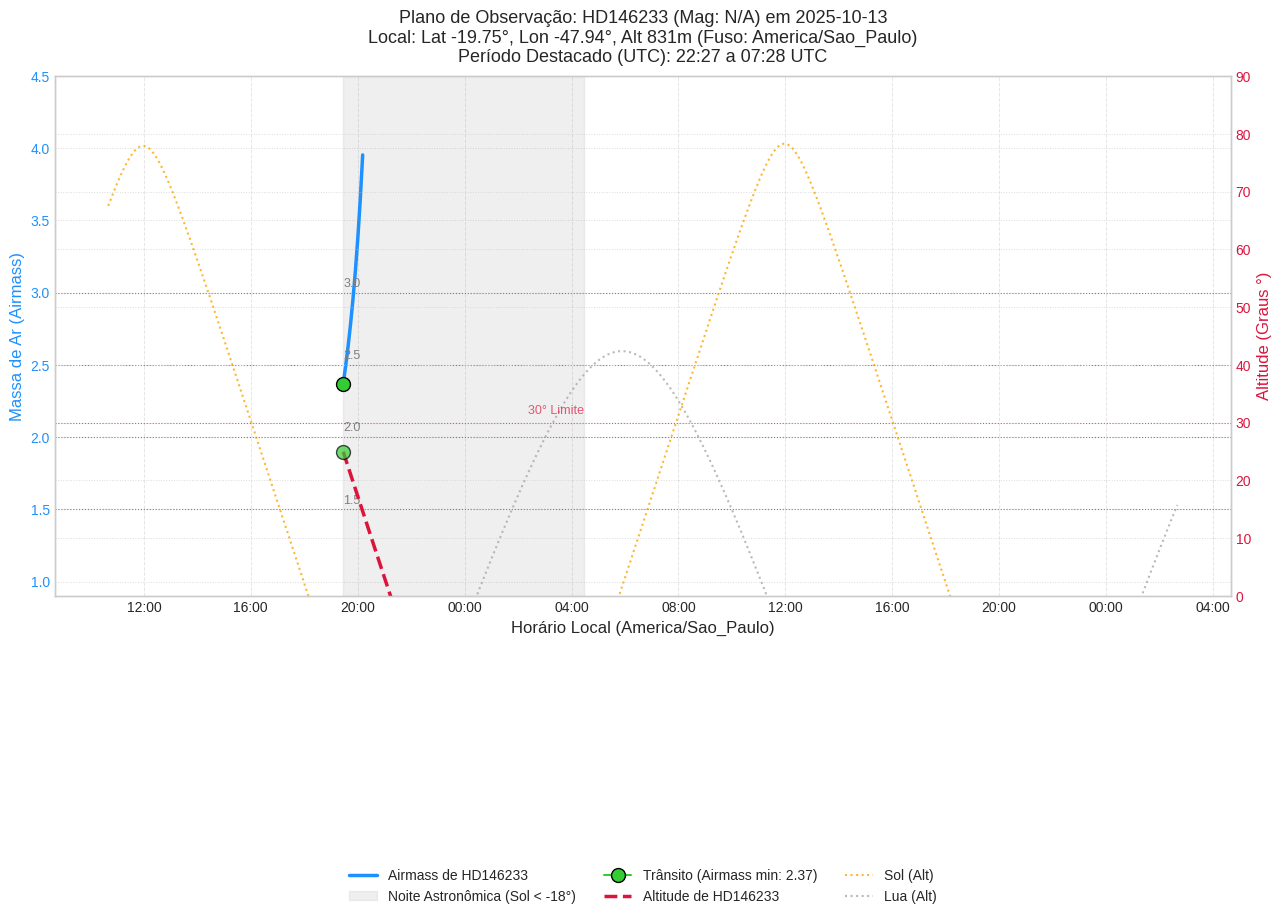

    Gerando Gráfico 2 (Foco no Alvo)...


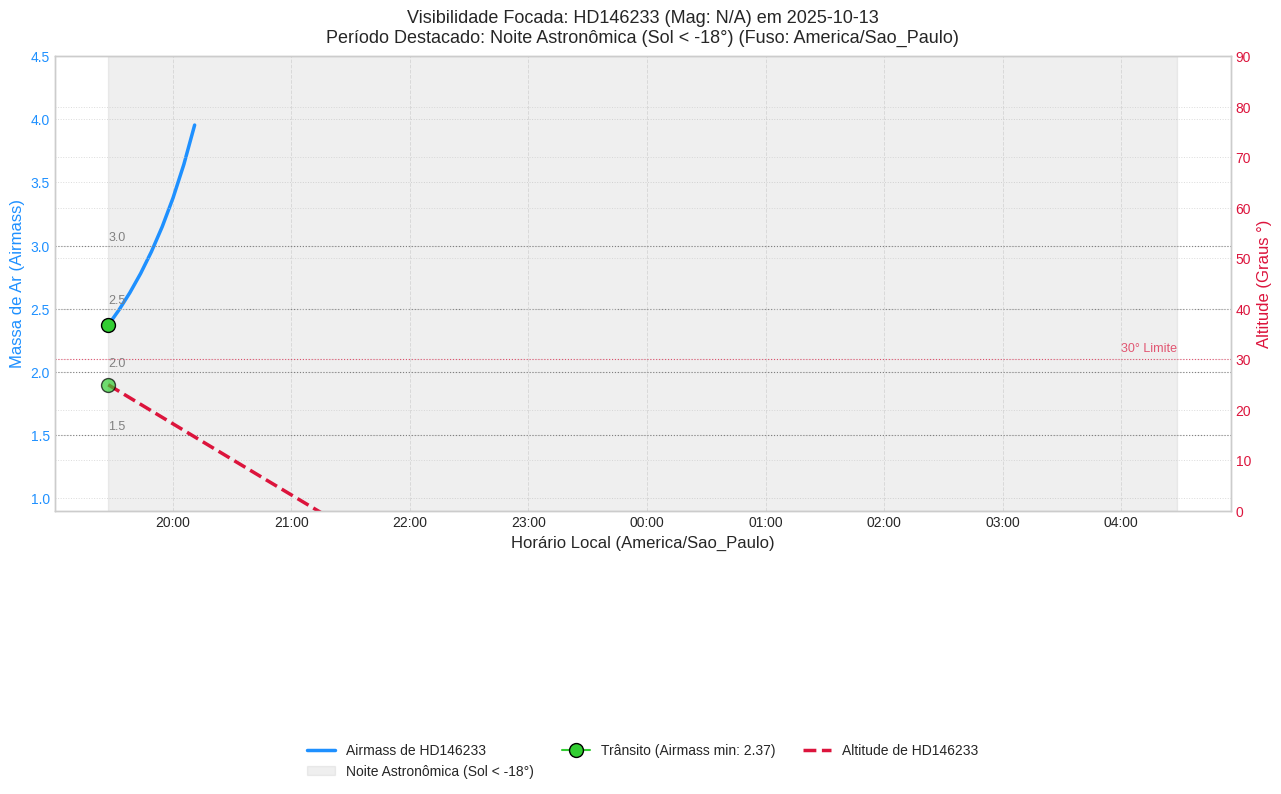

  --------------------------------------------------


--- Analisando: HD217014 ---
DEBUG [calc_nucleo]: Entrando na função para HD217014.
DEBUG [calc_nucleo]: tipo(min_observable_alt) = <class 'astropy.units.quantity.Quantity'>
DEBUG [calc_nucleo]: valor de min_observable_alt = 30.0 deg

  Gerando Detalhes e Gráficos para o Alvo: HD217014

    --- Informações do Alvo: HD217014 ---
      Magnitude: N/A (não encontrada)
      Separação Lua-Alvo (no trânsito do alvo): 35.0314

    --- Janela Observável Ideal para HD217014 (acima de 30.0° durante 'Noite Astronômica (Sol < -18°)') ---
      Início: 19:27:27 Local (22:27:27 UTC) em 2025-10-12
      Fim:    00:38:51 Local (03:38:51 UTC) em 2025-10-13
      Duração: 5.19 h
    Gerando Gráfico 1 (Visão Geral)...
    Informação do Trânsito (Valores Reais): HD217014 tem menor Airmass (1.32) e maior altitude (49.3°) em aprox. 21:44:02 Local (00:44:02 UTC).


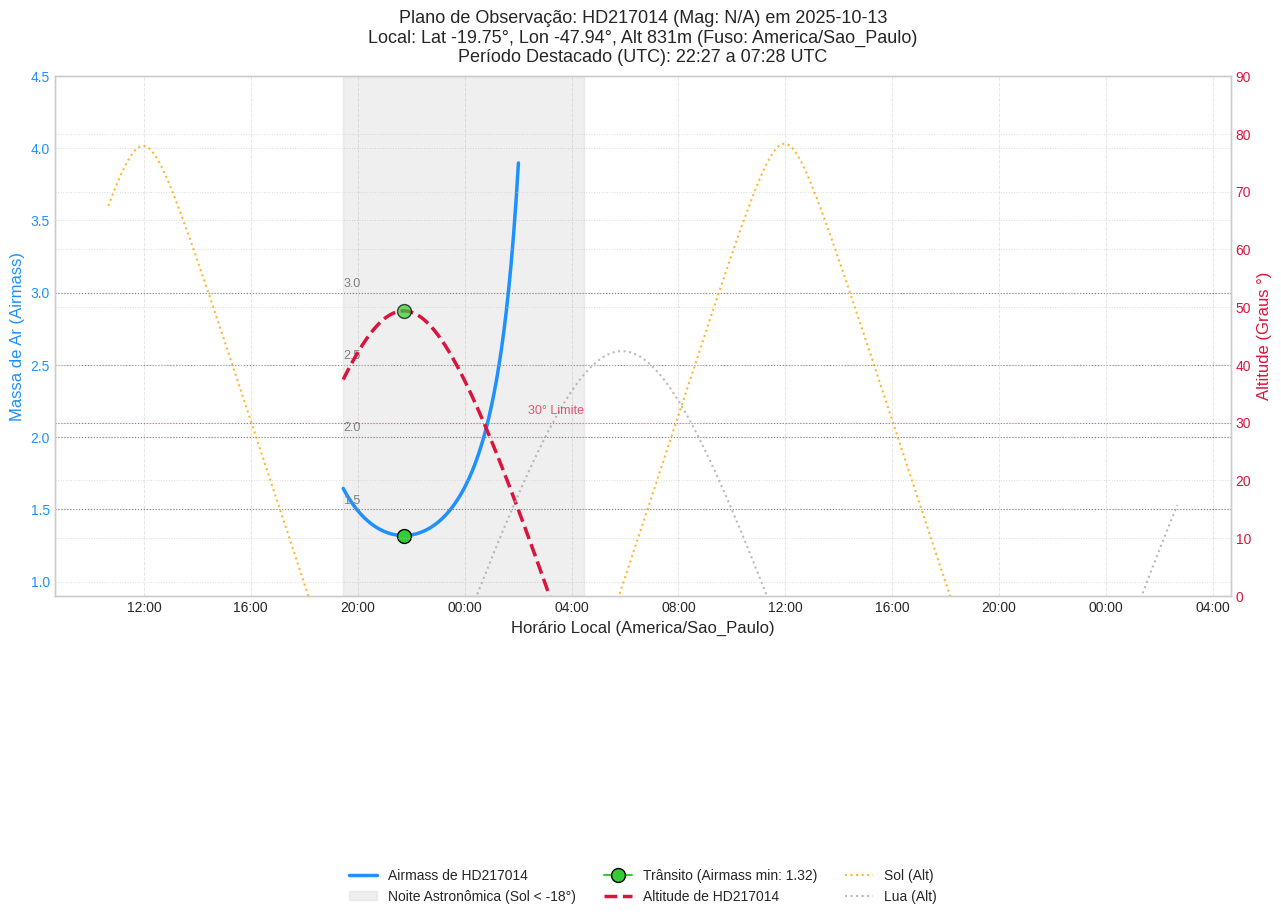

    Gerando Gráfico 2 (Foco no Alvo)...


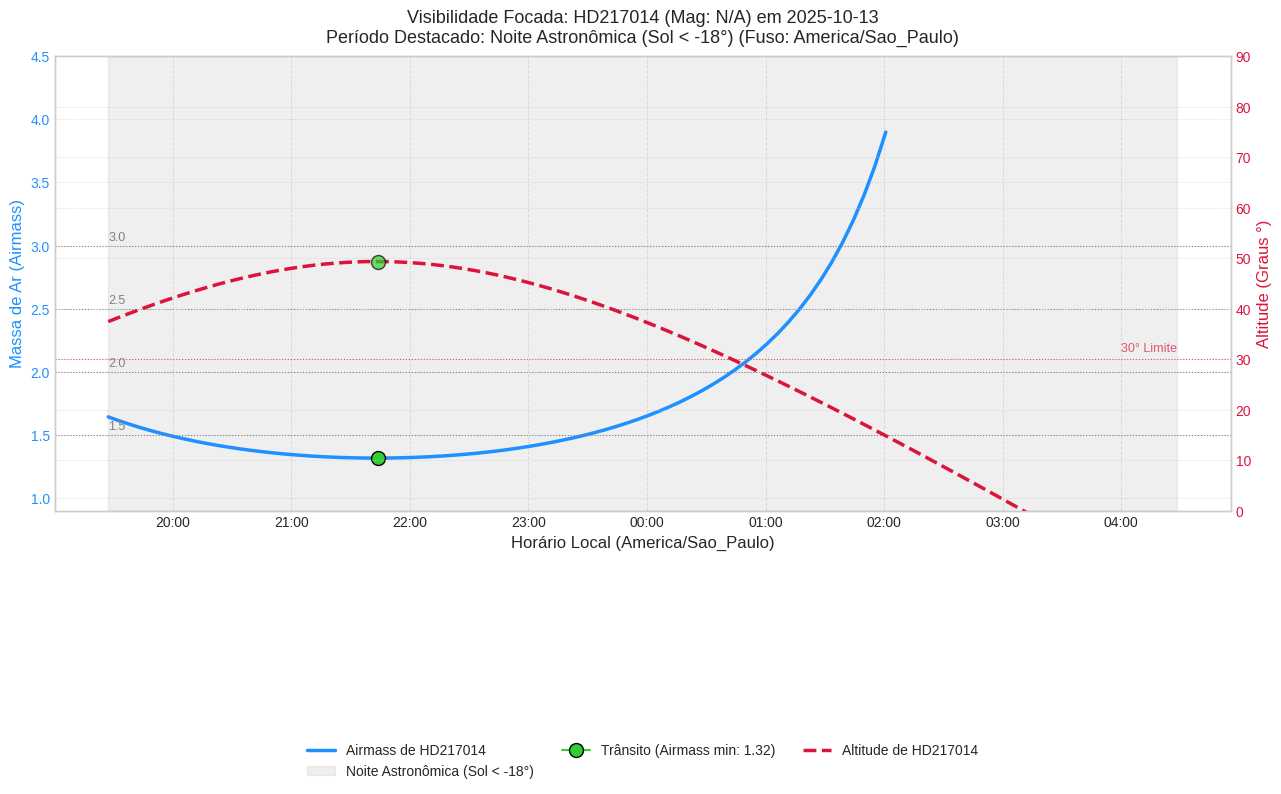

  --------------------------------------------------


--- Analisando: HD1461 ---
DEBUG [calc_nucleo]: Entrando na função para HD1461.
DEBUG [calc_nucleo]: tipo(min_observable_alt) = <class 'astropy.units.quantity.Quantity'>
DEBUG [calc_nucleo]: valor de min_observable_alt = 30.0 deg

  Gerando Detalhes e Gráficos para o Alvo: HD1461

    --- Informações do Alvo: HD1461 ---
      Magnitude: N/A (não encontrada)
      Separação Lua-Alvo (no trânsito do alvo): 20.6111

    --- Janela Observável Ideal para HD1461 (acima de 30.0° durante 'Noite Astronômica (Sol < -18°)') ---
      Início: 19:27:27 Local (22:27:27 UTC) em 2025-10-12
      Fim:    03:06:22 Local (06:06:22 UTC) em 2025-10-13
      Duração: 7.65 h
    Gerando Gráfico 1 (Visão Geral)...
    Informação do Trânsito (Valores Reais): HD1461 tem menor Airmass (1.02) e maior altitude (78.1°) em aprox. 23:05:59 Local (02:05:59 UTC).


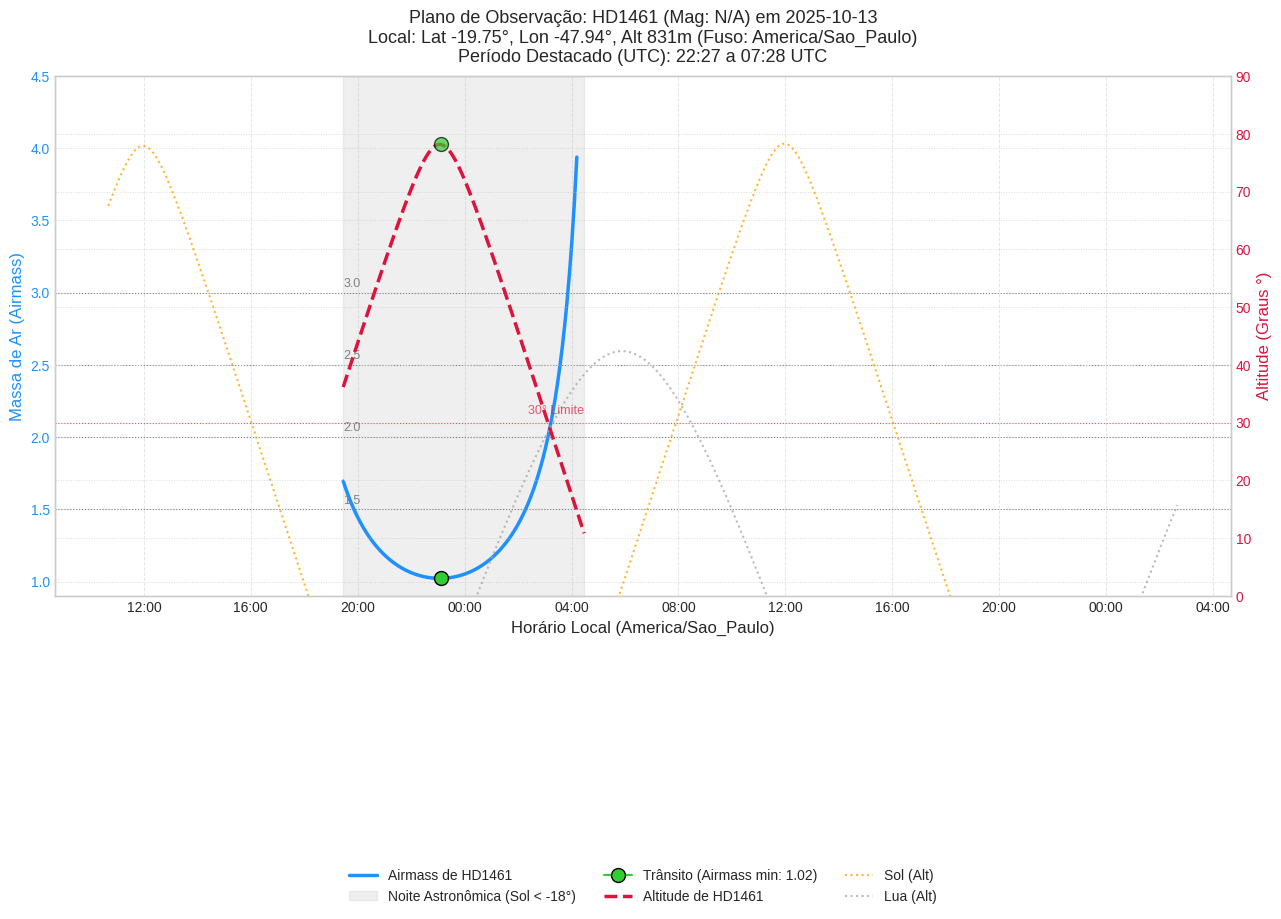

    Gerando Gráfico 2 (Foco no Alvo)...


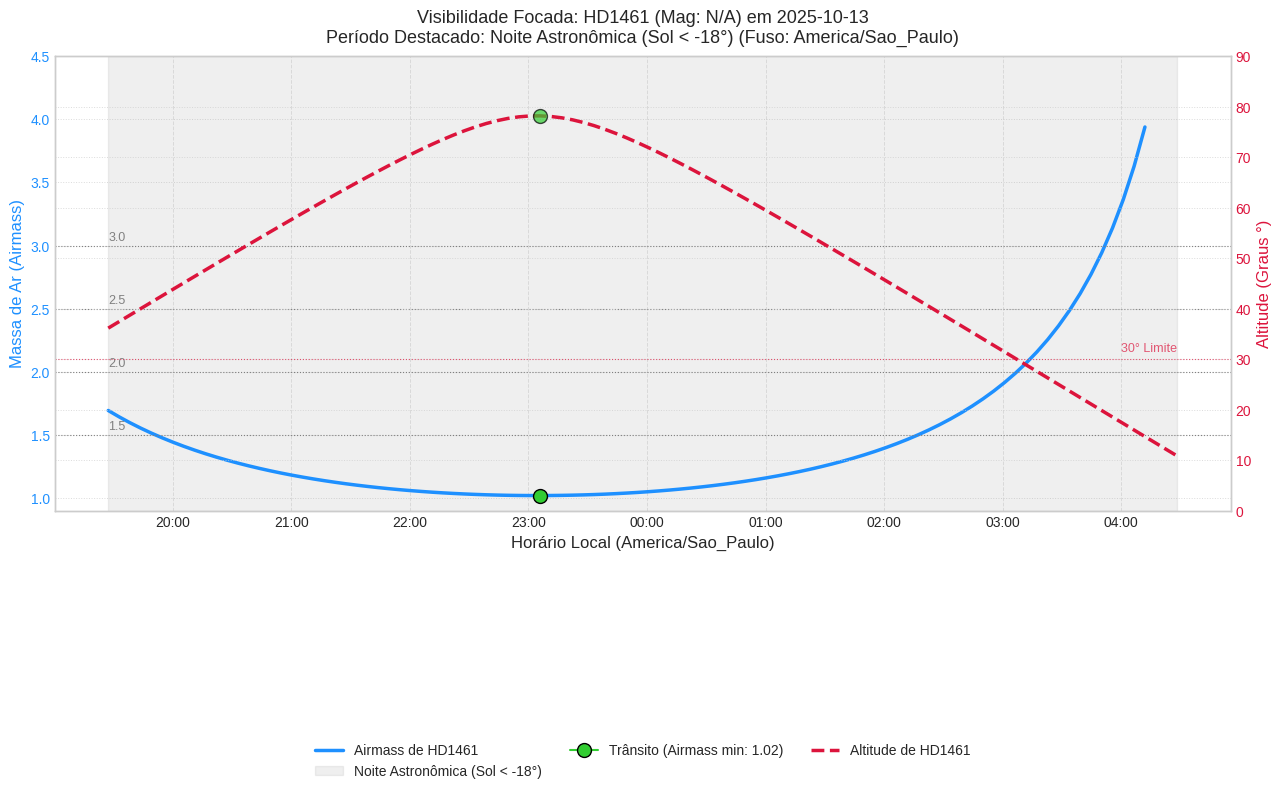

  --------------------------------------------------


--- Analisando: HD42280 ---
DEBUG [calc_nucleo]: Entrando na função para HD42280.
DEBUG [calc_nucleo]: tipo(min_observable_alt) = <class 'astropy.units.quantity.Quantity'>
DEBUG [calc_nucleo]: valor de min_observable_alt = 30.0 deg

  Gerando Detalhes e Gráficos para o Alvo: HD42280

    --- Informações do Alvo: HD42280 ---
      Magnitude: N/A (não encontrada)
      Separação Lua-Alvo (no trânsito do alvo): 76.1791

    --- Janela Observável Ideal para HD42280 (acima de 30.0° durante 'Noite Astronômica (Sol < -18°)') ---
      Início: 00:49:47 Local (03:49:47 UTC) em 2025-10-13
      Fim:    04:28:18 Local (07:28:18 UTC) em 2025-10-13
      Duração: 3.64 h
    Gerando Gráfico 1 (Visão Geral)...
    Informação do Trânsito (Valores Reais): HD42280 tem menor Airmass (1.02) e maior altitude (79.9°) em aprox. 04:28:18 Local (07:28:18 UTC).


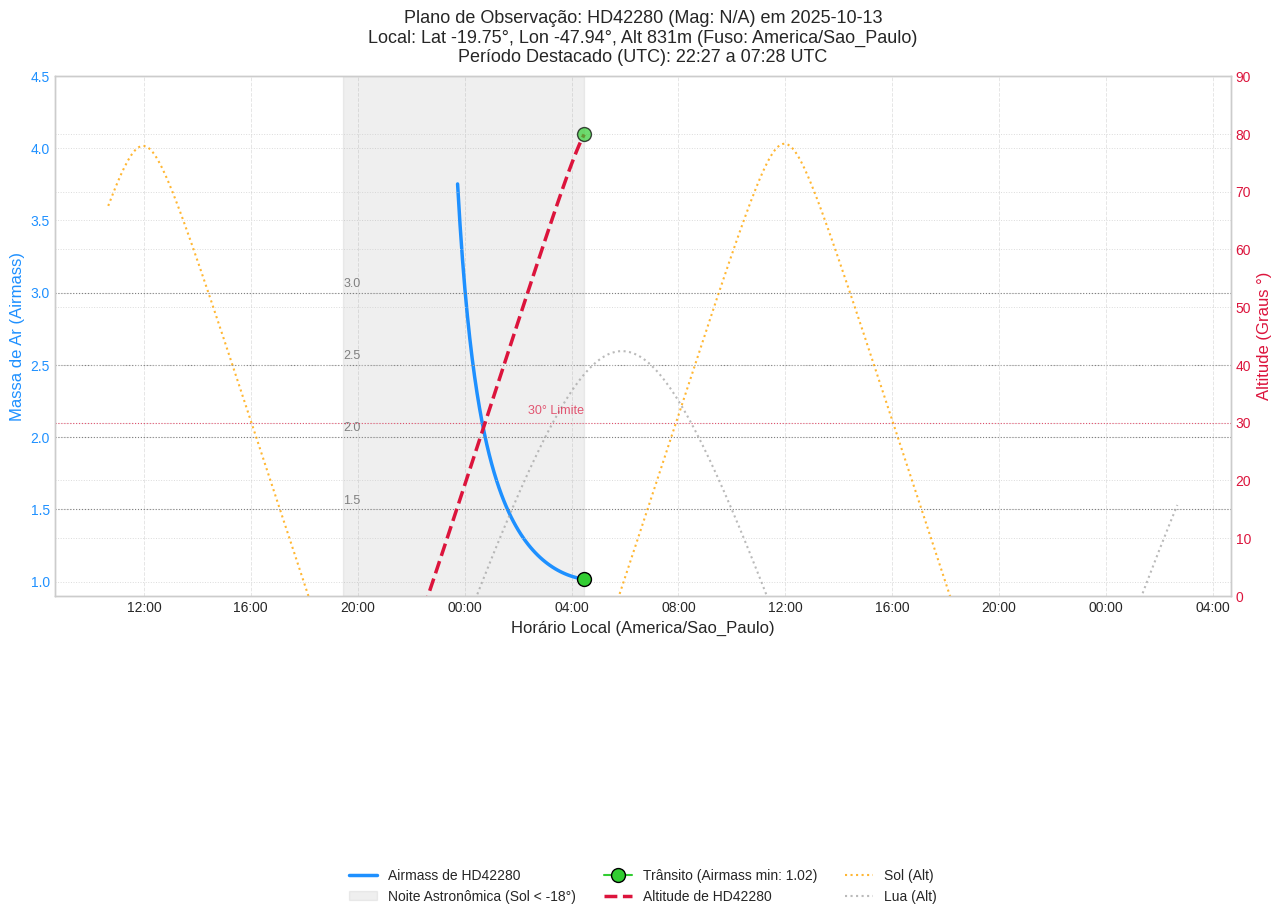

    Gerando Gráfico 2 (Foco no Alvo)...


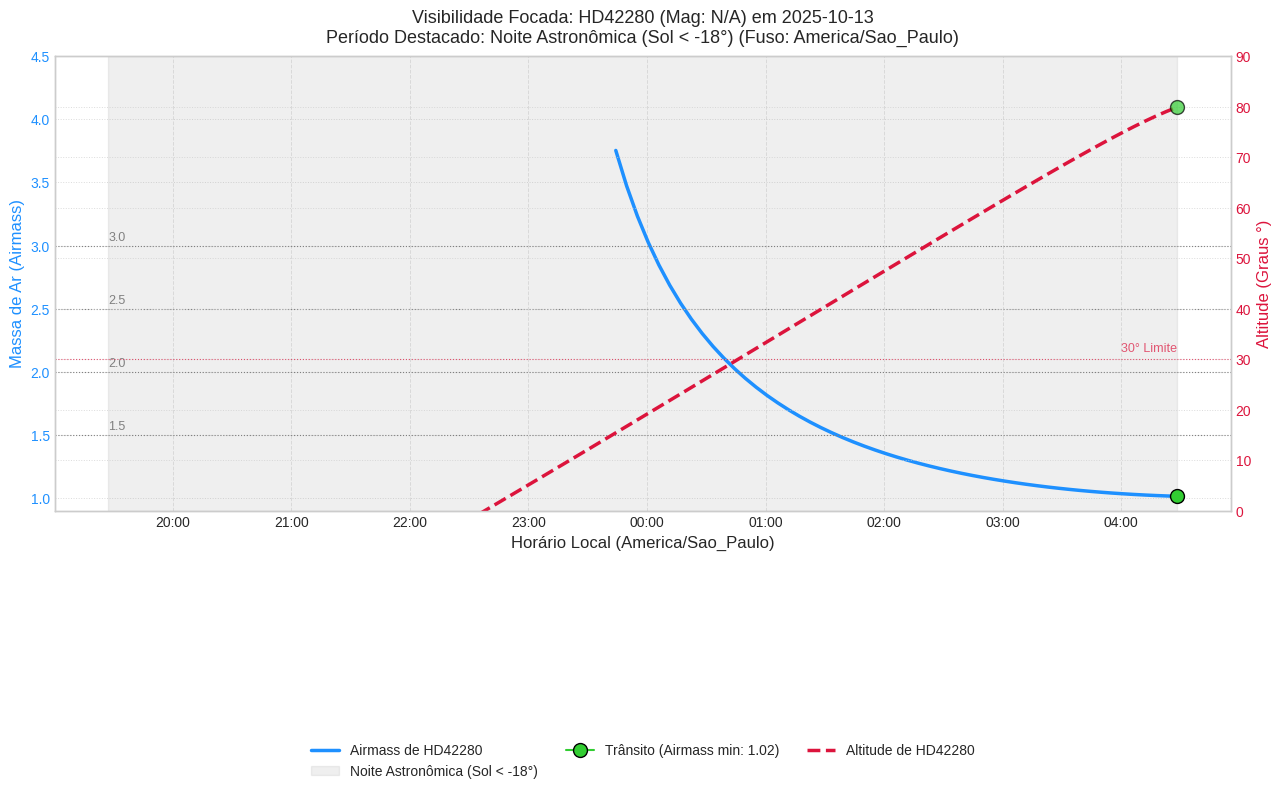

  --------------------------------------------------


--- Analisando: HD3651 ---
DEBUG [calc_nucleo]: Entrando na função para HD3651.
DEBUG [calc_nucleo]: tipo(min_observable_alt) = <class 'astropy.units.quantity.Quantity'>
DEBUG [calc_nucleo]: valor de min_observable_alt = 30.0 deg

  Gerando Detalhes e Gráficos para o Alvo: HD3651

    --- Informações do Alvo: HD3651 ---
      Magnitude: N/A (não encontrada)
      Separação Lua-Alvo (no trânsito do alvo): 15.7241

    --- Janela Observável Ideal para HD3651 (acima de 30.0° durante 'Noite Astronômica (Sol < -18°)') ---
      Início: 20:27:33 Local (23:27:33 UTC) em 2025-10-12
      Fim:    02:22:39 Local (05:22:39 UTC) em 2025-10-13
      Duração: 5.92 h
    Gerando Gráfico 1 (Visão Geral)...
    Informação do Trânsito (Valores Reais): HD3651 tem menor Airmass (1.33) e maior altitude (48.8°) em aprox. 23:22:22 Local (02:22:22 UTC).


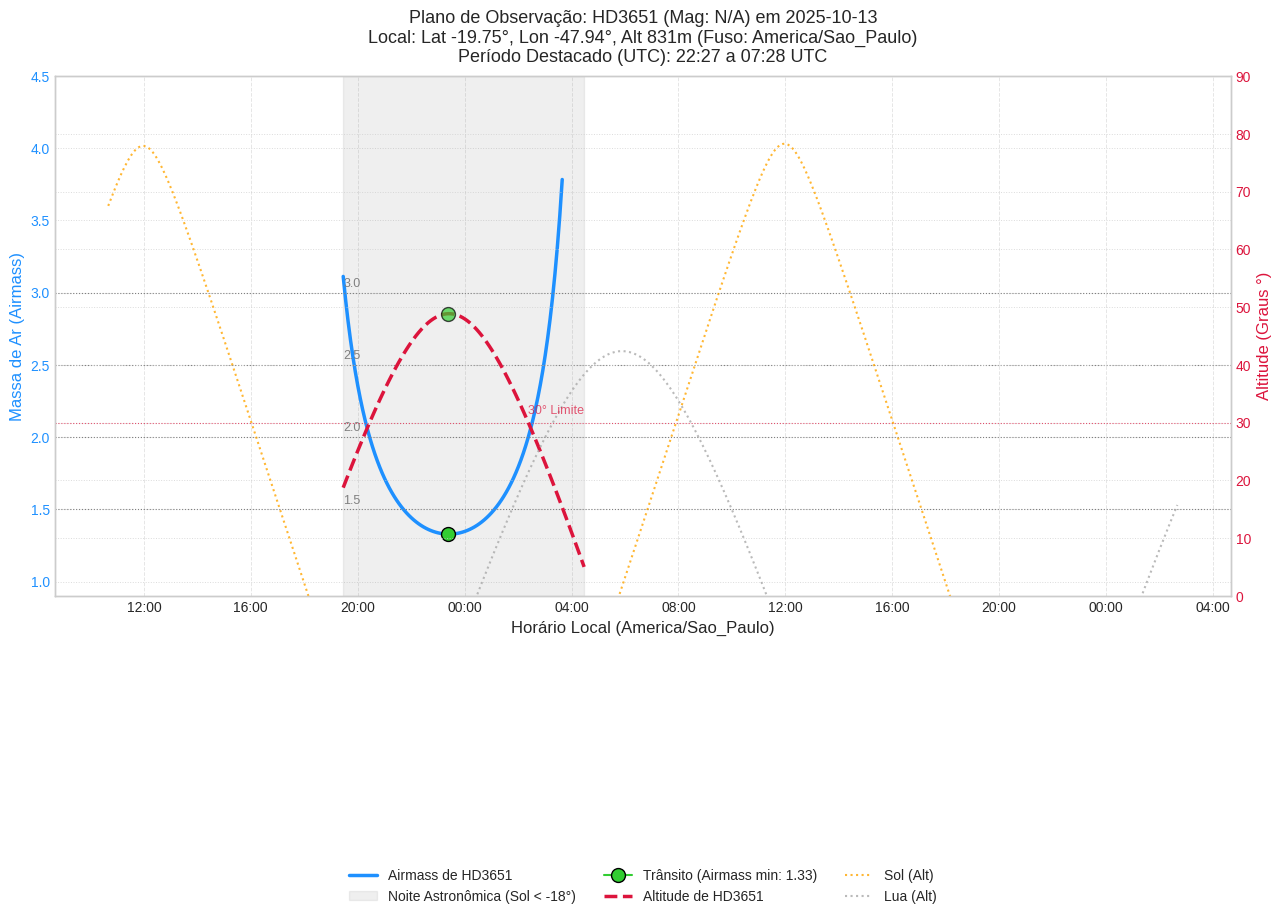

    Gerando Gráfico 2 (Foco no Alvo)...


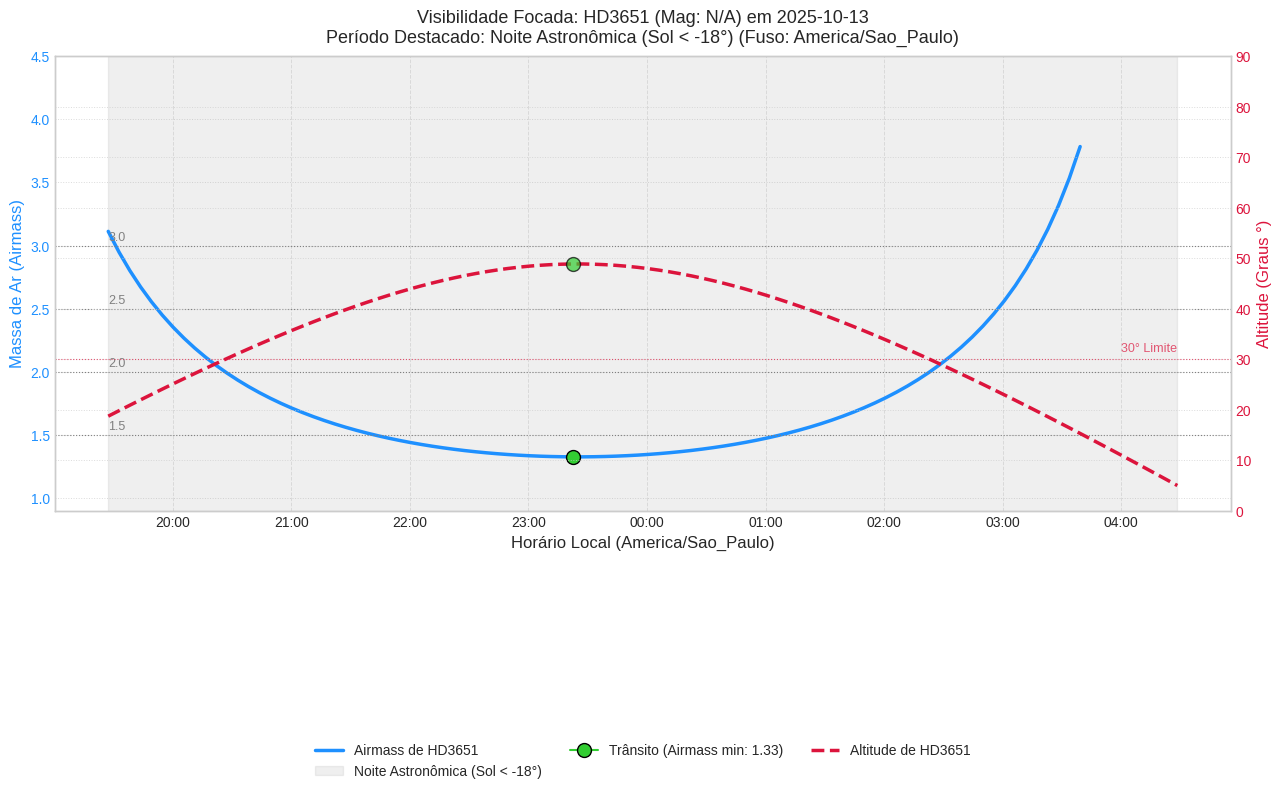

  --------------------------------------------------


--- Analisando: Sun ---
  Coordenadas não disponíveis para Sun. Pulando.


--- Tabela Resumo Consolidada da Análise Noturna em Lote ---
       Alvo   Tipo Mag (aprox) Alt Máx (°) Trânsito (Local) Janela Observável  \
0  HD146233  Fixed         N/A        25.0            19:27               Não   
1  HD217014  Fixed         N/A        49.3            21:44               Sim   
2    HD1461  Fixed         N/A        78.1            23:05               Sim   
3   HD42280  Fixed         N/A        79.9            04:28               Sim   
4    HD3651  Fixed         N/A        48.8            23:22               Sim   

  Início Janela Fim Janela Duração Janela Sep. Lua (°)  
0           N/A        N/A          0.00h       134.5°  
1         19:27      00:38          5.19h        35.0°  
2         19:27      03:06          7.65h        20.6°  
3         00:49      04:28          3.64h        76.2°  
4         20:27      02:22          5

In [ ]:
# Célula 14: Relatório de Análise Noturna para Alvos Carregados

# Importações que esta célula pode precisar (muitas já globais)
# from datetime import datetime, timedelta, date
# import pytz
# from astropy.time import Time
# import astropy.units as u
# from astroplan import moon_illumination
# from astropy.coordinates import get_body # Já como actual_get_body_function
# (Assumindo que Célula 1, 2, 3, 8, 12.A, 13 foram executadas)

print("--- Iniciando Célula 14: Relatório de Análise Noturna em Lote ---")

# 1. Definir a Data da Análise
# Vamos usar a 'analysis_date_local' definida na Célula 3 ou 7.
# Se quiser uma data diferente, pode definir aqui ou adicionar um DatePicker.
if 'analysis_date_local' not in globals() or analysis_date_local is None:
    print("ERRO: 'analysis_date_local' não definida. Execute a Célula 3 ou 7.")
    # Você pode querer parar a execução aqui se a data não estiver definida.
    # Ex: raise NameError("analysis_date_local não definida")
else:
    data_para_analise_lote = analysis_date_local
    print(f"Data da análise para este relatório: {data_para_analise_lote.strftime('%Y-%m-%d')}")

    # 2. Verificar se temos alvos carregados
    if 'targets_coords_dict' not in globals() or not targets_coords_dict:
        print("Nenhum alvo carregado no 'targets_coords_dict'. Execute a Célula 13 primeiro.")
    else:
        print(f"Encontrados {len(targets_coords_dict)} alvos para processar.")

        # 3. Calcular informações da noite (uma vez)
        # Esta lógica é similar à da Célula 12.C (on_nightly_run_button_clicked)
        illumination_fraction_nightly_lote = None
        if ASTROPLAN_USABLE and 'moon_illumination' in globals():
            try:
                time_for_illum_calc_utc_lote = Time(datetime.combine(data_para_analise_lote, datetime.min.time()) + timedelta(hours=12), format='datetime', scale='utc')
                illumination_fraction_nightly_lote = moon_illumination(time_for_illum_calc_utc_lote)
                if illumination_fraction_nightly_lote is not None:
                    print(f"  Iluminação média da Lua para a noite: {illumination_fraction_nightly_lote*100:.1f}%")
            except Exception as e_illum_lote:
                print(f"  AVISO: Não foi possível calcular iluminação da Lua para o lote: {e_illum_lote}")

        night_s_utc_lote, night_e_utc_lote, night_label_lote = None, None, "Noite Indefinida"
        sun_altaz_lote, moon_altaz_lote, time_grid_sm_lote = None, None, None
        common_night_data_ok_lote = False

        if GET_SUN_MOON_USABLE and actual_get_sun_function and 'find_event_time' in globals():
            try:
                mid_dt_lote = observer_timezone.localize(datetime.combine(data_para_analise_lote, datetime.min.time()))
                start_t_lote = Time(mid_dt_lote)
                h_grid_lote, pts_grid_lote = 40, int(40*15)
                time_grid_sm_lote = start_t_lote + np.linspace(-h_grid_lote/3, h_grid_lote*2/3, pts_grid_lote) * u.hour
                sun_icrs_lote = actual_get_sun_function(time_grid_sm_lote)
                altaz_fr_sm_lote = AltAz(obstime=time_grid_sm_lote, location=observer_location)
                sun_altaz_lote = sun_icrs_lote.transform_to(altaz_fr_sm_lote)
                if actual_get_moon_function:
                    try: moon_altaz_lote = actual_get_moon_function(time_grid_sm_lote).transform_to(altaz_fr_sm_lote)
                    except: moon_altaz_lote = None

                ev_t_astro_lote = find_event_time(sun_altaz_lote.alt, time_grid_sm_lote, -18*u.deg, "setting")
                mo_t_astro_cand_lote = find_event_time(sun_altaz_lote.alt, time_grid_sm_lote, -18*u.deg, "rising")
                mo_t_astro_lote = None
                if ev_t_astro_lote and mo_t_astro_cand_lote:
                    if mo_t_astro_cand_lote > ev_t_astro_lote: mo_t_astro_lote = mo_t_astro_cand_lote
                    else: m_astro_lote = time_grid_sm_lote > ev_t_astro_lote; mo_t_astro_lote = find_event_time(sun_altaz_lote[m_astro_lote].alt, time_grid_sm_lote[m_astro_lote], -18*u.deg, "rising") if np.any(m_astro_lote) else None
                elif mo_t_astro_cand_lote: mo_t_astro_lote = mo_t_astro_cand_lote
                if ev_t_astro_lote and mo_t_astro_lote and mo_t_astro_lote > ev_t_astro_lote:
                    night_s_utc_lote, night_e_utc_lote, night_label_lote = ev_t_astro_lote, mo_t_astro_lote, "Noite Astronômica (Sol < -18°)"
                else:
                    ev_t_civil_lote = find_event_time(sun_altaz_lote.alt, time_grid_sm_lote, 0*u.deg, "setting"); mo_t_civil_cand_lote = find_event_time(sun_altaz_lote.alt, time_grid_sm_lote, 0*u.deg, "rising"); mo_t_civil_lote = None
                    if ev_t_civil_lote and mo_t_civil_cand_lote:
                        if mo_t_civil_cand_lote > ev_t_civil_lote: mo_t_civil_lote = mo_t_civil_cand_lote
                        else: m_civil_lote = time_grid_sm_lote > ev_t_civil_lote; mo_t_civil_lote = find_event_time(sun_altaz_lote[m_civil_lote].alt, time_grid_sm_lote[m_civil_lote], 0*u.deg, "rising") if np.any(m_civil_lote) else None
                    elif mo_t_civil_cand_lote: mo_t_civil_lote = mo_t_civil_lote
                    if ev_t_civil_lote and mo_t_civil_lote and mo_t_civil_lote > ev_t_civil_lote: night_s_utc_lote, night_e_utc_lote, night_label_lote = ev_t_civil_lote, mo_t_civil_lote, "Pôr ao Nascer do Sol (Civil)"

                if night_s_utc_lote and night_e_utc_lote:
                    print(f"  Período de noite escura ('{night_label_lote}') para o relatório: {night_s_utc_lote.to_datetime(observer_timezone).strftime('%H:%M')} a {night_e_utc_lote.to_datetime(observer_timezone).strftime('%H:%M')} Local")
                    common_night_data_ok_lote = True
                else:
                    print("  AVISO: Não foi possível definir o período de noite escura para a data do relatório.")
            except Exception as e_noite_lote:
                print(f"ERRO ao calcular informações da noite para o lote: {e_noite_lote}")

        if common_night_data_ok_lote:
            night_dur_val_lote = (night_e_utc_lote - night_s_utc_lote)
            if night_dur_val_lote.to_value(u.hour) <= 0.01:
                print(f"  Noite com duração muito curta ({night_dur_val_lote.to_value(u.hour):.2f}h). Relatório de alvos não será gerado.")
            else:
                obs_times_utc_night_lote = night_s_utc_lote + np.linspace(0, night_dur_val_lote.to_value(u.hour), 100) * u.hour
                obs_times_local_night_lote = [t.to_datetime(timezone=observer_timezone) for t in obs_times_utc_night_lote]

                summary_for_report_list = []

                for target_name_iter, target_data_iter in tqdm(targets_coords_dict.items(), desc="Processando Alvos para Relatório"):
                    print(f"\n--- Analisando: {target_name_iter} ---")

                    target_coord_for_analysis = None
                    target_type = target_data_iter.get('type', 'fixed') # Assume 'fixed' se não especificado

                    if target_type == 'solar_system':
                        iau_name = target_data_iter.get('iau_name')
                        if iau_name and GET_SUN_MOON_USABLE and actual_get_moon_function: # Reutilizando actual_get_moon_function que é get_body
                            try:
                                # Para objetos do sistema solar, obtemos a trajetória para a grade da noite
                                target_coord_for_analysis = actual_get_moon_function(iau_name, obs_times_utc_night_lote, location=observer_location)
                                print(f"  Obtidas efemérides para objeto do sistema solar: {target_name_iter}")
                            except Exception as e_getbody_lote:
                                print(f"  ERRO ao obter efemérides para {target_name_iter} (Sistema Solar): {e_getbody_lote}")
                                continue # Pula para o próximo alvo
                        else:
                            print(f"  Não foi possível obter efemérides para {target_name_iter} (Sistema Solar).")
                            continue
                    else: # Alvo fixo
                        target_coord_for_analysis = target_data_iter.get('coord')

                    if target_coord_for_analysis is None:
                        print(f"  Coordenadas não disponíveis para {target_name_iter}. Pulando.")
                        continue

                    # Chama a função de cálculo da Célula 12.A
                    dados_calculados_alvo = calcular_dados_nucleo_analise_noturna(
                        target_coord_for_analysis,
                        target_name_iter,
                        target_data_iter.get('magnitude'),
                        data_para_analise_lote,
                        observer_location,
                        observer_timezone,
                        night_s_utc_lote,
                        night_e_utc_lote,
                        obs_times_utc_night_lote,
                        actual_get_moon_function, # Passa a função get_body
                        illumination_fraction_nightly_lote
                    )

                    if dados_calculados_alvo:
                        # Chama a função de plotagem da Célula 12.A
                        # (Os plots serão exibidos sequencialmente)
                        gerar_plots_detalhados_da_noite_para_alvo(
                            target_name_iter,
                            dados_calculados_alvo.get('magnitude'),
                            dados_calculados_alvo.get('obs_times_local_plot'),
                            dados_calculados_alvo.get('obs_times_utc_plot'),
                            dados_calculados_alvo.get('altitudes_plot'),
                            dados_calculados_alvo.get('airmass_plot'),
                            observer_location, observer_timezone, data_para_analise_lote,
                            night_s_utc_lote, night_e_utc_lote, night_label_lote,
                            sun_altaz_lote, moon_altaz_lote, time_grid_sm_lote, # Passa Sun/Moon calculados para a noite
                            p_min_observable_altitude_for_window = 30*u.deg, # Pode vir de um widget/config
                            p_moon_illumination_fraction_nightly=illumination_fraction_nightly_lote,
                            p_moon_target_separation_at_transit=dados_calculados_alvo.get('separation_lua_transit_angle')
                        )
                        # Coleta dados para a tabela resumo do relatório
                        summary_for_report_list.append({
                            "Alvo": dados_calculados_alvo["nome_alvo"],
                            "Tipo": target_type.replace('_',' ').title(),
                            "Mag (aprox)": f"{dados_calculados_alvo['magnitude']:.2f}" if dados_calculados_alvo['magnitude'] is not None else "N/A",
                            "Alt Máx (°)": f"{dados_calculados_alvo['alt_max_val']:.1f}" if pd.notna(dados_calculados_alvo['alt_max_val']) else "N/A",
                            "Trânsito (Local)": dados_calculados_alvo["transit_time_str"],
                            "Janela Observável": dados_calculados_alvo["is_observable_str"],
                            "Início Janela": dados_calculados_alvo["window_start_str"],
                            "Fim Janela": dados_calculados_alvo["window_end_str"],
                            "Duração Janela": dados_calculados_alvo["window_duration_str"],
                            "Sep. Lua (°)": dados_calculados_alvo["separation_lua_transit_str"]
                        })
                    else:
                        print(f"  Não foi possível calcular dados de visibilidade para {target_name_iter}.")

                # Exibir tabela resumo consolidada no final
                if summary_for_report_list:
                    print("\n\n--- Tabela Resumo Consolidada da Análise Noturna em Lote ---")
                    df_reporte = pd.DataFrame(summary_for_report_list)
                    with pd.option_context('display.max_rows', len(df_reporte) + 5):
                        print(df_reporte)
                else:
                    print("\nNenhum alvo pôde ser incluído no relatório consolidado.")
        else:
            print("Dados da noite não puderam ser calculados. Análise em lote não pode prosseguir.")

print("\nCélula 14: Estrutura para Relatório de Análise Noturna em Lote definida.")

In [ ]:
# Célula 14: Relatório Aprimorado de Alvos Observáveis na Noite (com Filtros e Opção de Salvar)

import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import numpy as np
# Assegure que as outras importações (Time, u, datetime, etc.) estão no escopo global
# ou adicione-as aqui se necessário.
# from astropy.time import Time
# import astropy.units as u
# from datetime import datetime, timedelta, date
# from astroplan import moon_illumination
# from google.colab import files


# Assume-se que Células 1, 2, 3/7, 5, 5S, 8, 10, 12.A, 13 foram executadas.

print("--- Iniciando Célula 14: Relatório Aprimorado de Alvos Observáveis ---")

# --- Widgets para Configuração do Relatório da Célula 14 ---
# Pega a data da Célula 3/7 ou usa hoje como padrão
default_report_date = analysis_date_local if 'analysis_date_local' in globals() and analysis_date_local is not None else date.today()

report_date_picker = widgets.DatePicker(
    description='Data para Relatório:', value=default_report_date, style={'description_width': 'initial'}
)
report_min_alt_slider = widgets.FloatSlider(
    value=30, min=0, max=90, step=5, description='Altitude Mínima (°):',
    style={'description_width': 'initial'}, layout={'width': 'auto'}
)
report_min_duration_slider = widgets.FloatSlider(
    value=0.5, min=0.1, max=12, step=0.1, description='Duração Mín. (h):',
    style={'description_width': 'initial'}, layout={'width': 'auto'}
)
run_report_button = widgets.Button(
    description="Gerar Relatório de Alvos Observáveis",
    button_style='success', icon='list-alt', layout={'width': 'auto'}
)
report_output_area = widgets.Output() # Área para exibir a tabela e o botão de salvar

# Contêiner para os controles do relatório
report_controls_box = widgets.VBox([
    report_date_picker,
    report_min_alt_slider,
    report_min_duration_slider,
    run_report_button
])

# Variável global para armazenar o DataFrame do relatório para salvar
_df_reporte_para_salvar = None
save_report_button = widgets.Button(description="Salvar Relatório em CSV", icon='save', button_style='info', layout={'width':'auto'})

def on_save_report_button_clicked(b):
    global _df_reporte_para_salvar, data_para_analise # Precisa da data para o nome do arquivo
    if _df_reporte_para_salvar is not None and not _df_reporte_para_salvar.empty:
        # Usa a data que foi efetivamente usada para gerar o relatório
        date_str = data_para_analise.strftime('%Y-%m-%d') if 'data_para_analise' in globals() else "data_desconhecida"
        filename = f"relatorio_alvos_observaveis_{date_str}.csv"

        # Seleciona apenas as colunas que foram exibidas para o usuário
        cols_para_salvar = ["Alvo", "Tipo", "Mag (aprox)", "Alt Máx (°)", "Trânsito (Local)",
                              "Airmass Trânsito", "Duração Janela", "Início Janela", "Fim Janela",
                              "Sep. Lua (°)", "Ilumin. Lua (%)"]
        cols_existentes_para_salvar = [col for col in cols_para_salvar if col in _df_reporte_para_salvar.columns]

        _df_reporte_para_salvar[cols_existentes_para_salvar].to_csv(filename, index=False)
        files.download(filename)
        print(f"Relatório '{filename}' salvo e download iniciado.")
    else:
        print("Nenhum relatório para salvar.")
save_report_button.on_click(on_save_report_button_clicked)


def on_run_report_button_clicked(b_ignored):
    global _df_reporte_para_salvar, data_para_analise # data_para_analise será definida aqui

    with report_output_area:
        clear_output(wait=True)
        print(f"--- Gerando Relatório de Alvos Observáveis ---")

        data_para_analise = report_date_picker.value # Pega a data do widget
        min_alt_observavel = report_min_alt_slider.value * u.deg
        min_duracao_janela_horas = report_min_duration_slider.value

        print(f"Data da análise: {data_para_analise.strftime('%Y-%m-%d')}")
        print(f"Critérios: Altitude mín. > {min_alt_observavel.value}°, Duração mín. janela > {min_duracao_janela_horas}h")

        if 'targets_coords_dict' not in globals() or not targets_coords_dict:
            print("Nenhum alvo carregado. Execute a Célula 13 primeiro.")
            return

        print(f"Analisando {len(targets_coords_dict)} alvos totais...")

        # Calcular informações da noite (uma vez)
        illumination_fraction_nightly_lote = None
        illum_percent_str_noite = "N/A"
        if ASTROPLAN_USABLE and 'moon_illumination' in globals():
            try:
                time_for_illum_calc_utc_lote = Time(datetime.combine(data_para_analise, datetime.min.time()) + timedelta(hours=12), format='datetime', scale='utc')
                illumination_fraction_nightly_lote = moon_illumination(time_for_illum_calc_utc_lote)
                if illumination_fraction_nightly_lote is not None:
                    illum_percent_str_noite = f"{illumination_fraction_nightly_lote*100:.1f}%"
                    print(f"  Iluminação média da Lua para a noite: {illum_percent_str_noite}")
            except Exception as e_illum_lote:
                print(f"  AVISO: Não foi possível calcular iluminação da Lua: {e_illum_lote}")

        night_s_utc_lote, night_e_utc_lote, night_label_lote = None, None, "Noite Indefinida"
        # sun_altaz_lote, moon_altaz_lote, time_grid_sm_lote = None, None, None # Não precisamos para a tabela, apenas para os plots detalhados
        common_night_data_ok_lote = False

        if GET_SUN_MOON_USABLE and actual_get_sun_function and 'find_event_time' in globals():
            try:
                mid_dt_lote = observer_timezone.localize(datetime.combine(data_para_analise, datetime.min.time()))
                start_t_lote = Time(mid_dt_lote)
                # Uma grade de tempo menor pode ser suficiente se não formos plotar Sol/Lua aqui
                h_grid_lote, pts_grid_lote = 40, int(40*4) # Amostra a cada 15 min para crepúsculos
                time_grid_sm_lote_temp = start_t_lote + np.linspace(-h_grid_lote/3, h_grid_lote*2/3, pts_grid_lote) * u.hour
                sun_icrs_lote = actual_get_sun_function(time_grid_sm_lote_temp)
                altaz_fr_sm_lote = AltAz(obstime=time_grid_sm_lote_temp, location=observer_location)
                sun_altaz_for_twilight = sun_icrs_lote.transform_to(altaz_fr_sm_lote)

                ev_t_astro_lote = find_event_time(sun_altaz_for_twilight.alt, time_grid_sm_lote_temp, -18*u.deg, "setting")
                mo_t_astro_cand_lote = find_event_time(sun_altaz_for_twilight.alt, time_grid_sm_lote_temp, -18*u.deg, "rising")
                mo_t_astro_lote = None
                if ev_t_astro_lote and mo_t_astro_cand_lote:
                    if mo_t_astro_cand_lote > ev_t_astro_lote: mo_t_astro_lote = mo_t_astro_cand_lote
                    else: m_astro_lote = time_grid_sm_lote_temp > ev_t_astro_lote; mo_t_astro_lote = find_event_time(sun_altaz_for_twilight[m_astro_lote].alt, time_grid_sm_lote_temp[m_astro_lote], -18*u.deg, "rising") if np.any(m_astro_lote) else None
                elif mo_t_astro_cand_lote: mo_t_astro_lote = mo_t_astro_cand_lote
                if ev_t_astro_lote and mo_t_astro_lote and mo_t_astro_lote > ev_t_astro_lote: night_s_utc_lote, night_e_utc_lote, night_label_lote = ev_t_astro_lote, mo_t_astro_lote, "Noite Astronômica (Sol < -18°)"
                else:
                    ev_t_civil_lote = find_event_time(sun_altaz_for_twilight.alt, time_grid_sm_lote_temp, 0*u.deg, "setting"); mo_t_civil_cand_lote = find_event_time(sun_altaz_for_twilight.alt, time_grid_sm_lote_temp, 0*u.deg, "rising"); mo_t_civil_lote = None
                    if ev_t_civil_lote and mo_t_civil_cand_lote:
                        if mo_t_civil_cand_lote > ev_t_civil_lote: mo_t_civil_lote = mo_t_civil_cand_lote
                        else: m_civil_lote = time_grid_sm_lote_temp > ev_t_civil_lote; mo_t_civil_lote = find_event_time(sun_altaz_for_twilight[m_civil_lote].alt, time_grid_sm_lote_temp[m_civil_lote], 0*u.deg, "rising") if np.any(m_civil_lote) else None
                    elif mo_t_civil_cand_lote: mo_t_civil_lote = mo_t_civil_cand_lote
                    if ev_t_civil_lote and mo_t_civil_lote and mo_t_civil_lote > ev_t_civil_lote: night_s_utc_lote, night_e_utc_lote, night_label_lote = ev_t_civil_lote, mo_t_civil_lote, "Pôr ao Nascer do Sol (Civil)"

                if night_s_utc_lote and night_e_utc_lote:
                    print(f"  Período de '{night_label_lote}': {night_s_utc_lote.to_datetime(observer_timezone).strftime('%H:%M')} a {night_e_utc_lote.to_datetime(observer_timezone).strftime('%H:%M')} Local")
                    common_night_data_ok_lote = True

                    global _report_date_analyzed_for_map, _report_night_s_utc_for_map, _report_night_e_utc_for_map
                    global _report_observer_location_for_map, _report_observer_timezone_for_map
                    global _report_sun_altaz_for_map, _report_moon_altaz_for_map, _report_time_grid_sm_for_map # Opcional para mapa

                    _report_date_analyzed_for_map = data_para_analise
                    _report_night_s_utc_for_map = night_s_utc_lote
                    _report_night_e_utc_for_map = night_e_utc_lote
                    _report_observer_location_for_map = observer_location # Global da Célula 2
                    _report_observer_timezone_for_map = observer_timezone # Global da Célula 2
                    # As variáveis abaixo são para plotar Sol/Lua no mapa, se desejado pela função do mapa
                    _report_sun_altaz_for_map = sun_altaz_lote
                    _report_moon_altaz_for_map = moon_altaz_lote # Este é o moon_altaz para a GRADE toda, não um tempo específico
                    _report_time_grid_sm_for_map = time_grid_sm_lote



                else: print("  AVISO: Não foi possível definir o período de noite escura para a data do relatório.")
            except Exception as e_noite_lote: print(f"ERRO ao calcular informações da noite: {e_noite_lote}")

        if common_night_data_ok_lote:
            night_dur_val_lote = (night_e_utc_lote - night_s_utc_lote)
            if night_dur_val_lote.to_value(u.hour) <= 0.01:
                print(f"  Noite com duração muito curta. Nenhum alvo será considerado observável.")
            else:
                obs_times_utc_night_lote = night_s_utc_lote + np.linspace(0, night_dur_val_lote.to_value(u.hour), 100) * u.hour

                alvos_observaveis_para_tabela = []

                for target_name_iter, target_data_iter in tqdm(targets_coords_dict.items(), desc="Analisando Alvos para Relatório"):
                    target_coord_for_analysis = target_data_iter.get('coord')
                    target_type = target_data_iter.get('type', 'fixed')

                    if target_type == 'solar_system':
                        # Adia o processamento detalhado, apenas lista se quiser
                        # alvos_observaveis_para_tabela.append({"Alvo": target_name_iter, "Tipo": "Sistema Solar", ... (outros N/A)})
                        continue # Pula objetos do sistema solar por enquanto neste relatório simplificado

                    if target_coord_for_analysis is None:
                        continue

                    dados_calculados_alvo = calcular_dados_nucleo_analise_noturna(
                        target_coord_for_analysis, target_name_iter, target_data_iter.get('magnitude'),
                        data_para_analise, observer_location, observer_timezone,
                        night_s_utc_lote, night_e_utc_lote, obs_times_utc_night_lote,
                        actual_get_moon_function, illumination_fraction_nightly_lote,
                        min_observable_alt=min_alt_observavel
                    )

                    if dados_calculados_alvo and \
                       dados_calculados_alvo.get("is_observable_str") == "Sim" and \
                       dados_calculados_alvo.get("duration_numeric_hours", 0) >= min_duracao_janela_horas:

                        # Adiciona à lista para a tabela resumo
                        alvos_observaveis_para_tabela.append({
                            "Alvo": dados_calculados_alvo["nome_alvo"],
                            "Tipo": target_type.replace('_',' ').title(), # Será "Fixed" ou "Fixed Csv Coord"
                            "Mag (aprox)": f"{dados_calculados_alvo['magnitude']:.2f}" if dados_calculados_alvo['magnitude'] is not None else "N/A",
                            "Alt Máx (°)": f"{dados_calculados_alvo['alt_max_val']:.1f}" if pd.notna(dados_calculados_alvo['alt_max_val']) else "N/A",
                            "Trânsito (Local)": dados_calculados_alvo["transit_time_str"],
                            "Airmass Trânsito": dados_calculados_alvo["transit_airmass_str"], # Adicionando Airmass
                            "Duração Janela": dados_calculados_alvo["window_duration_str"],
                            "Início Janela": dados_calculados_alvo["window_start_str"],
                            "Fim Janela": dados_calculados_alvo["window_end_str"],
                            "Sep. Lua (°)": dados_calculados_alvo["separation_lua_transit_str"],
                            "Ilumin. Lua (%)": illum_percent_str_noite # Adicionado
                        })

                if alvos_observaveis_para_tabela:
                    print("\n\n--- RELATÓRIO: ALVOS OBSERVÁVEIS NA NOITE ---")
                    df_relatorio = pd.DataFrame(alvos_observaveis_para_tabela)
                    _df_reporte_para_salvar = df_relatorio.copy() # Guarda para o botão de salvar

                    # Ordenar (exemplo: por duração da janela)
                    if "Duração Janela" in df_relatorio.columns:
                        df_relatorio['_dur_sort_'] = df_relatorio["Duração Janela"].str.replace('h','').astype(float)
                        df_relatorio = df_relatorio.sort_values(by='_dur_sort_', ascending=False).drop(columns=['_dur_sort_'])

                    cols_para_exibir = ["Alvo", "Tipo", "Mag (aprox)", "Alt Máx (°)", "Trânsito (Local)",
                                        "Airmass Trânsito", "Duração Janela", "Início Janela", "Fim Janela",
                                        "Sep. Lua (°)", "Ilumin. Lua (%)"]
                    cols_existentes_para_exibir = [col for col in cols_para_exibir if col in df_relatorio.columns]

                    with pd.option_context('display.max_rows', len(df_relatorio) + 5,
                                           'display.max_columns', None, 'display.width', 220): # Aumentada a largura
                        print(df_relatorio[cols_existentes_para_exibir])

                    display(save_report_button) # Exibe o botão de salvar
                else:
                    print("\nNenhum alvo carregado atendeu aos critérios de observabilidade para esta noite.")
                    _df_reporte_para_salvar = None # Garante que não há nada para salvar
        else:
            print("Dados da noite não puderam ser calculados. Relatório não pode ser gerado.")
        print("\n--- Fim do Relatório ---")

run_report_button.on_click(on_run_report_button_clicked)

# Exibe os controles para esta célula
display(report_controls_box)
display(report_output_area) # Área onde a tabela e o botão de salvar serão exibidos

print("\nCélula 14: Pronta para gerar relatório de alvos observáveis.")

--- Iniciando Célula 14: Relatório Aprimorado de Alvos Observáveis ---


Output()


Célula 14: Pronta para gerar relatório de alvos observáveis.


In [ ]:
# Célula 15: Visualização Detalhada dos Alvos Observáveis (do Relatório da Célula 14)

# Importações que esta célula pode precisar (muitas já globais, mas é bom ter clareza)
# from tqdm.auto import tqdm # Se a lista for muito grande
# Assume-se que as Células 1, 2, 3/7, 5, (5S), 8, 10, 12.A, 13, e 14 foram executadas
# e as variáveis/funções globais estão disponíveis:
# targets_coords_dict, observer_location, observer_timezone,
# GET_SUN_MOON_USABLE, actual_get_sun_function, actual_get_moon_function,
# calcular_dados_nucleo_analise_noturna, gerar_plots_detalhados_da_noite_para_alvo,
# _df_reporte_para_salvar (do output da Célula 14),
# data_para_analise (usada na Célula 14),
# night_s_utc_lote, night_e_utc_lote, night_label_lote (usados/definidos na Célula 14),
# obs_times_utc_night_lote (usado/definido na Célula 14),
# illumination_fraction_nightly_lote (usado/definido na Célula 14),
# sun_altaz_lote, moon_altaz_lote, time_grid_sm_lote (usados/definidos na Célula 14)
# min_alt_para_relatorio (usado na Célula 14)

print("--- Iniciando Célula 15: Geração de Gráficos Detalhados para Alvos Observáveis do Relatório ---")

# Verifica se o DataFrame do relatório da Célula 14 existe e tem alvos
if '_df_reporte_para_salvar' not in globals() or _df_reporte_para_salvar is None or _df_reporte_para_salvar.empty:
    print("Nenhum relatório de alvos observáveis encontrado da Célula 14.")
    print("Por favor, execute a Célula 14 primeiro para gerar a lista de alvos observáveis.")
elif not all(var in globals() for var in ['data_para_analise', 'night_s_utc_lote', 'night_e_utc_lote',
                                           'night_label_lote', 'obs_times_utc_night_lote',
                                           'illumination_fraction_nightly_lote', 'sun_altaz_lote',
                                           'moon_altaz_lote', 'time_grid_sm_lote', 'min_alt_para_relatorio']):
    print("ERRO: Variáveis da noite ou de configuração do relatório da Célula 14 não estão definidas.")
    print("Por favor, execute a Célula 14 completamente.")
else:
    print(f"Gerando gráficos detalhados para os alvos observáveis na noite de {data_para_analise.strftime('%Y-%m-%d')}")
    print(f"Usando os mesmos parâmetros de noite e lua calculados na Célula 14.")

    # Itera sobre os alvos listados no DataFrame do relatório da Célula 14
    for index, linha_alvo_observavel in tqdm(_df_reporte_para_salvar.iterrows(), total=len(_df_reporte_para_salvar), desc="Gerando Gráficos Detalhados"):
        target_name_relatorio = linha_alvo_observavel['Alvo']

        # Pega os dados originais do alvo do targets_coords_dict
        if target_name_relatorio not in targets_coords_dict:
            tqdm.write(f"AVISO: Dados para '{target_name_relatorio}' não encontrados no targets_coords_dict principal. Pulando.")
            continue

        target_data_original = targets_coords_dict[target_name_relatorio]
        target_coord_original = target_data_original.get('coord')
        target_mag_original = target_data_original.get('magnitude')
        target_type_original = target_data_original.get('type', 'fixed')

        # Prepara as coordenadas para análise (pode ser trajetória para Sistema Solar)
        coord_para_analise_nucleo = None
        if target_type_original == 'solar_system':
            iau_name = target_data_original.get('iau_name')
            if iau_name and GET_SUN_MOON_USABLE and actual_get_moon_function:
                try:
                    coord_para_analise_nucleo = actual_get_moon_function(iau_name, obs_times_utc_night_lote, location=observer_location)
                except Exception as e_getbody_c15:
                    tqdm.write(f"  AVISO: Erro ao obter efemérides para {target_name_relatorio} (Sistema Solar) na Célula 15: {e_getbody_c15}")
                    continue
            else:
                tqdm.write(f"  AVISO: Não foi possível obter efemérides para {target_name_relatorio} (Sistema Solar) na Célula 15.")
                continue
        else: # Alvo fixo
            coord_para_analise_nucleo = target_coord_original

        if coord_para_analise_nucleo is None:
            tqdm.write(f"  AVISO: Coordenadas finais não disponíveis para {target_name_relatorio} na Célula 15. Pulando gráficos.")
            continue

        # Chama a função de cálculo da Célula 12.A (ela recalculará os dados para a plotagem)
        # (Os dados na tabela da Célula 14 são resumidos; aqui podemos recalcular para garantir consistência com a função de plot)
        dados_calculados_para_plot = calcular_dados_nucleo_analise_noturna(
            coord_para_analise_nucleo,
            target_name_relatorio,
            target_mag_original,
            data_para_analise, # Data da noite usada na Célula 14
            observer_location,
            observer_timezone,
            night_s_utc_lote, # Início da noite da Célula 14
            night_e_utc_lote, # Fim da noite da Célula 14
            obs_times_utc_night_lote, # Grade de tempo da noite da Célula 14
            actual_get_moon_function,
            illumination_fraction_nightly_lote, # Iluminação da Lua da Célula 14
            min_observable_alt=min_alt_para_relatorio # Altitude mínima usada na Célula 14
        )

        if dados_calculados_para_plot and dados_calculados_para_plot.get('obs_times_local_plot') is not None:
            # Chama a função de plotagem da Célula 12.A
            # Não precisamos guardar as figuras aqui, apenas exibi-las.
            gerar_plots_detalhados_da_noite_para_alvo(
                target_name_relatorio,
                dados_calculados_para_plot.get('magnitude'),
                dados_calculados_para_plot.get('obs_times_local_plot'),
                dados_calculados_para_plot.get('obs_times_utc_plot'),
                dados_calculados_para_plot.get('altitudes_plot'),
                dados_calculados_para_plot.get('airmass_plot'),
                observer_location,
                observer_timezone,
                data_para_analise, # Data da noite
                night_s_utc_lote, # Início da noite
                night_e_utc_lote, # Fim da noite
                night_label_lote,   # Rótulo da noite
                sun_altaz_lote,     # Posições do Sol calculadas na Célula 14
                moon_altaz_lote,    # Posições da Lua calculadas na Célula 14
                time_grid_sm_lote,  # Grade de tempo do Sol/Lua da Célula 14
                p_min_observable_altitude_for_window = min_alt_para_relatorio,
                p_moon_illumination_fraction_nightly=illumination_fraction_nightly_lote,
                p_moon_target_separation_at_transit=dados_calculados_para_plot.get('separation_lua_transit_angle')
            )
        else:
            tqdm.write(f"  Não foi possível recalcular/plotar dados detalhados para {target_name_relatorio}.")

    print("\nCélula 15: Geração de gráficos detalhados para alvos observáveis concluída.")

--- Iniciando Célula 15: Geração de Gráficos Detalhados para Alvos Observáveis do Relatório ---
Nenhum relatório de alvos observáveis encontrado da Célula 14.
Por favor, execute a Célula 14 primeiro para gerar a lista de alvos observáveis.


In [ ]:
# Célula 16: Mapa Celeste Simplificado dos Alvos Observáveis

import matplotlib.pyplot as plt
import numpy as np
# from astropy.coordinates import SkyCoord, AltAz # Já devem estar no escopo
# import astropy.units as u
# from astropy.time import Time
# import pytz

#print("--- Iniciando Célula 16: Geração do Mapa Celeste Simplificado ---")

# No início da Célula 16:
# ... (imports) ...
print("--- Iniciando Célula 16: Geração do Mapa Celeste Simplificado ---")

if '_df_reporte_para_salvar' not in globals() or _df_reporte_para_salvar is None:
    print("ERRO: Tabela de relatório da Célula 14 ('_df_reporte_para_salvar') não encontrada.")
elif not all(var in globals() and globals()[var] is not None for var in
             ['_report_observer_location_for_map', '_report_observer_timezone_for_map',
              '_report_night_s_utc_for_map', '_report_night_e_utc_for_map',
              '_report_date_analyzed_for_map',
              'targets_coords_dict', 'actual_get_moon_function']):
    print("ERRO: Informações da noite da Célula 14 (_report_night_s_utc_for_map, etc.) ou outras dependências não estão definidas.")
    print("      Por favor, execute a Célula 14 completamente primeiro.")
else:
    if _df_reporte_para_salvar.empty:
        print("Nenhum alvo observável no relatório da Célula 14 para plotar.")
    else:
        meio_da_noite_utc = _report_night_s_utc_for_map + (_report_night_e_utc_for_map - _report_night_s_utc_for_map) / 2
        tempo_mapa_celeste = Time(meio_da_noite_utc)
        tempo_mapa_celeste_local_str = tempo_mapa_celeste.to_datetime(_report_observer_timezone_for_map).strftime('%Y-%m-%d %H:%M:%S %Z')
        data_do_mapa_str = _report_date_analyzed_for_map.strftime('%Y-%m-%d')

        print(f"Gerando mapa celeste para a noite de {data_do_mapa_str}, no momento: {tempo_mapa_celeste_local_str}")
        # ... restante da Célula 16 como na resposta #84, usando estas variáveis globais
        # para observer_location e observer_timezone também, se necessário dentro da lógica de AltAz.

# Verifica se as variáveis necessárias da Célula 14 e Células anteriores existem
if '_df_reporte_para_salvar' not in globals() or _df_reporte_para_salvar is None:
    print("ERRO: Tabela de relatório da Célula 14 ('_df_reporte_para_salvar') não encontrada. Execute a Célula 14 primeiro.")
elif not all(var in globals() for var in ['observer_location', 'observer_timezone',
                                           'night_s_utc_lote', 'night_e_utc_lote',
                                           'targets_coords_dict', 'actual_get_moon_function']):
    print("ERRO: Variáveis essenciais (observer_location, night_s_utc_lote, etc.) não estão definidas.")
else:
    if _df_reporte_para_salvar.empty:
        print("Nenhum alvo observável foi identificado no relatório da Célula 14 para plotar no mapa celeste.")
    else:
        # 1. Definir o Momento da Observação para o Mapa
        # Usaremos o meio da noite escura definida na Célula 14
        if night_s_utc_lote and night_e_utc_lote:
            meio_da_noite_utc = night_s_utc_lote + (night_e_utc_lote - night_s_utc_lote) / 2
            tempo_mapa_celeste = Time(meio_da_noite_utc)
            tempo_mapa_celeste_local_str = tempo_mapa_celeste.to_datetime(observer_timezone).strftime('%Y-%m-%d %H:%M:%S %Z')
            print(f"Gerando mapa celeste para o momento: {tempo_mapa_celeste_local_str}")

            # 2. Obter Coordenadas AltAz dos Alvos Observáveis para o momento do mapa
            alvos_para_mapa_altaz = []
            nomes_para_mapa = []

            for index, linha_alvo in _df_reporte_para_salvar.iterrows():
                nome_alvo_mapa = linha_alvo['Alvo']
                dados_alvo_original = targets_coords_dict.get(nome_alvo_mapa)

                if not dados_alvo_original:
                    print(f"  AVISO: Dados originais para '{nome_alvo_mapa}' não encontrados. Pulando no mapa.")
                    continue

                target_coord_icrs = None
                tipo_alvo = dados_alvo_original.get('type', 'fixed')

                if tipo_alvo == 'solar_system':
                    iau_name = dados_alvo_original.get('iau_name')
                    if iau_name and actual_get_moon_function: # Reutilizando actual_get_moon_function que é get_body
                        try:
                            # Para objetos do sistema solar, get_body com tempo escalar retorna SkyCoord escalar
                            target_coord_icrs = actual_get_moon_function(iau_name, tempo_mapa_celeste, location=observer_location)
                        except Exception as e_getbody_mapa:
                            print(f"  AVISO: Erro ao obter efemérides para {nome_alvo_mapa} (Sistema Solar) para o mapa: {e_getbody_mapa}")
                            continue
                    else:
                        print(f"  AVISO: Não foi possível obter efemérides para {nome_alvo_mapa} (Sistema Solar) para o mapa.")
                        continue
                else: # Alvo fixo
                    target_coord_icrs = dados_alvo_original.get('coord')

                if target_coord_icrs:
                    try:
                        altaz_frame_mapa = AltAz(obstime=tempo_mapa_celeste, location=observer_location)
                        alvo_altaz = target_coord_icrs.transform_to(altaz_frame_mapa)

                        # Considerar apenas alvos acima do horizonte para o mapa
                        if alvo_altaz.alt.deg > 0:
                            alvos_para_mapa_altaz.append(alvo_altaz)
                            nomes_para_mapa.append(nome_alvo_mapa)
                        # else:
                            # print(f"  Alvo '{nome_alvo_mapa}' abaixo do horizonte no momento do mapa.")
                    except Exception as e_transform_mapa:
                        print(f"  AVISO: Erro ao transformar coordenadas AltAz para '{nome_alvo_mapa}' para o mapa: {e_transform_mapa}")
                else:
                    print(f"  AVISO: Coordenadas ICRS não encontradas para '{nome_alvo_mapa}' para o mapa.")


            # 3. Plotar o Mapa Celeste
            if alvos_para_mapa_altaz:
                print(f"\nPlotando mapa celeste com {len(alvos_para_mapa_altaz)} alvos acima do horizonte...")
                fig_mapa, ax_mapa = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

                for i, alvo_altaz_plot in enumerate(alvos_para_mapa_altaz):
                    az = alvo_altaz_plot.az.radian # Azimute em radianos para plot polar
                    alt = alvo_altaz_plot.alt.deg   # Altitude em graus
                    r = 90 - alt                  # Raio: 0 no zênite, 90 no horizonte

                    ax_mapa.plot(az, r, 'o', markersize=8, label=nomes_para_mapa[i])
                    ax_mapa.text(az, r + 2, nomes_para_mapa[i], fontsize=9, ha='center', va='bottom') # Ajuste o offset de r+2 conforme necessário

                # Configurações do gráfico polar
                ax_mapa.set_theta_zero_location("N")  # Norte no topo
                ax_mapa.set_theta_direction(-1)       # Sentido horário para azimute (N->E->S->W)
                ax_mapa.set_rlim(0, 90)               # Raio de 0 (zênite) a 90 (horizonte)
                ax_mapa.set_rticks([0, 30, 60, 90])   # Marcas de raio para 90°, 60°, 30° Alt (Zênite=0°)
                ax_mapa.set_rlabel_position(0)
                ax_mapa.set_yticklabels(['Zênite (90°)', '60°', '30°', 'Horizonte (0°)']) # Rótulos para altitude
                ax_mapa.set_title(f"Mapa Celeste Simplificado em {tempo_mapa_celeste_local_str}", va='bottom')
                ax_mapa.grid(True, linestyle=':', alpha=0.7)

                # Adiciona legenda se houver poucos alvos, senão pode poluir
                if len(alvos_para_mapa_altaz) <= 15: # Ajuste este número conforme necessário
                     ax_mapa.legend(loc='lower left', bbox_to_anchor=(1.05, 0))


                # Opcional: Plotar a Lua
                if 'moon_altaz_lote' in globals() and moon_altaz_lote is not None:
                    # Precisamos da posição da Lua no tempo_mapa_celeste
                    if actual_get_moon_function:
                        try:
                            lua_coord_mapa_icrs = actual_get_moon_function(tempo_mapa_celeste) # Assume get_body
                            lua_altaz_mapa = lua_coord_mapa_icrs.transform_to(AltAz(obstime=tempo_mapa_celeste, location=observer_location))
                            if lua_altaz_mapa.alt.deg > 0:
                                az_lua = lua_altaz_mapa.az.radian
                                r_lua = 90 - lua_altaz_mapa.alt.deg
                                ax_mapa.plot(az_lua, r_lua, 'o', markersize=10, color='gray', label='Lua')
                                ax_mapa.text(az_lua, r_lua + 2, 'Lua', fontsize=9, color='gray', ha='center', va='bottom')
                        except Exception as e_moon_mapa:
                            print(f"  AVISO: Não foi possível plotar a Lua no mapa: {e_moon_mapa}")

                plt.show()
            else:
                print("Nenhum dos alvos observáveis do relatório está acima do horizonte no momento escolhido para o mapa celeste.")

        else:
            print("Período da noite não pôde ser calculado na Célula 14. Mapa celeste não pode ser gerado.")

print("\nCélula 16: Geração de Mapa Celeste concluída (ou tentativa foi feita).")

--- Iniciando Célula 16: Geração do Mapa Celeste Simplificado ---
ERRO: Tabela de relatório da Célula 14 ('_df_reporte_para_salvar') não encontrada.
ERRO: Tabela de relatório da Célula 14 ('_df_reporte_para_salvar') não encontrada. Execute a Célula 14 primeiro.

Célula 16: Geração de Mapa Celeste concluída (ou tentativa foi feita).


In [ ]:
# Célula 16: Mapa Celeste Interativo com Slider de Tempo

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
# from astropy.coordinates import SkyCoord, AltAz, Angle # Já globais
# import astropy.units as u
# from astropy.time import Time
# import pytz # Já global

print("--- Iniciando Célula 16: Mapa Celeste Interativo ---")

# Verifica se as variáveis necessárias da Célula 14 e Células anteriores existem
# (mesmas verificações da resposta #84, usando _report_... para dados da noite)
if '_df_reporte_para_salvar' not in globals() or _df_reporte_para_salvar is None or \
   not all(var in globals() and globals()[var] is not None for var in
             ['observer_location', 'observer_timezone',
              '_report_night_s_utc_for_map', '_report_night_e_utc_for_map',
              '_report_date_analyzed_for_map',
              'targets_coords_dict', 'actual_get_moon_function']): # actual_get_moon_function é get_body
    print("ERRO: Dados da Célula 14 ou outras dependências não estão definidos.")
    print("      Por favor, execute a Célula 14 completamente primeiro.")
else:
    if _df_reporte_para_salvar.empty:
        print("Nenhum alvo observável identificado no relatório da Célula 14 para plotar.")
    else:
        # 1. Criar a grade de tempo para o Slider
        try:
            if not (_report_night_s_utc_for_map and _report_night_e_utc_for_map and _report_night_e_utc_for_map > _report_night_s_utc_for_map):
                raise ValueError("Período da noite inválido ou não definido.")

            duracao_noite_horas = (_report_night_e_utc_for_map - _report_night_s_utc_for_map).to_value(u.hour)
            # Intervalos de, por exemplo, 15 minutos
            num_passos_slider = int(duracao_noite_horas * 4) + 1 # 4 passos por hora
            if num_passos_slider < 2: num_passos_slider = 2 # Mínimo de 2 passos

            slider_times_utc = _report_night_s_utc_for_map + np.linspace(0, duracao_noite_horas, num_passos_slider) * u.hour

            # Opções para o slider: (rótulo_local, valor_utc_Time)
            slider_options = []
            for t_utc in slider_times_utc:
                t_local = t_utc.to_datetime(_report_observer_timezone_for_map)
                slider_options.append((t_local.strftime('%H:%M'), t_utc))

            if not slider_options:
                raise ValueError("Não foi possível gerar opções de tempo para o slider.")

            time_slider = widgets.SelectionSlider(
                options=slider_options,
                value=slider_options[len(slider_options) // 2][1] if slider_options else None, # Começa no meio da noite
                description=f"Hora ({_report_observer_timezone_for_map.zone}):",
                disabled=False,
                continuous_update=False, # Atualiza apenas ao soltar o slider
                orientation='horizontal',
                readout=True,
                style={'description_width': 'initial'},
                layout={'width': '90%'}
            )
            map_output_area = widgets.Output()

            # 2. Função para desenhar o mapa celeste para um tempo específico
            def plot_interactive_sky_map(selected_time_utc_from_slider):
                with map_output_area:
                    clear_output(wait=True) # Limpa o mapa anterior
                    if selected_time_utc_from_slider is None:
                        print("Selecione um horário no slider.")
                        return

                    tempo_mapa_celeste = Time(selected_time_utc_from_slider) # O valor do slider já é um objeto Time
                    tempo_mapa_celeste_local_str = tempo_mapa_celeste.to_datetime(_report_observer_timezone_for_map).strftime('%H:%M:%S')
                    data_do_mapa_str = _report_date_analyzed_for_map.strftime('%Y-%m-%d')

                    # print(f"Gerando mapa celeste para: {data_do_mapa_str} às {tempo_mapa_celeste_local_str}...")

                    alvos_para_mapa_altaz = []
                    nomes_para_mapa = []
                    # Usa _df_reporte_para_salvar da Célula 14
                    for index, linha_alvo in _df_reporte_para_salvar.iterrows():
                        nome_alvo_mapa = linha_alvo['Alvo']
                        dados_alvo_original = targets_coords_dict.get(nome_alvo_mapa)
                        if not dados_alvo_original: continue

                        target_coord_icrs = None; tipo_alvo = dados_alvo_original.get('type', 'fixed')
                        if tipo_alvo == 'solar_system':
                            iau_name = dados_alvo_original.get('iau_name')
                            if iau_name and 'actual_get_moon_function' in globals() and actual_get_moon_function: # actual_get_moon_function é get_body
                                try: target_coord_icrs = actual_get_moon_function(iau_name, tempo_mapa_celeste, location=_report_observer_location_for_map)
                                except: pass
                        else: target_coord_icrs = dados_alvo_original.get('coord')

                        if target_coord_icrs:
                            try:
                                altaz_frame_mapa = AltAz(obstime=tempo_mapa_celeste, location=_report_observer_location_for_map)
                                alvo_altaz = target_coord_icrs.transform_to(altaz_frame_mapa)
                                if alvo_altaz.alt.deg > 0: # Apenas alvos acima do horizonte
                                    alvos_para_mapa_altaz.append(alvo_altaz)
                                    nomes_para_mapa.append(nome_alvo_mapa)
                            except: pass # Ignora erros de transformação para um alvo específico

                    if alvos_para_mapa_altaz:
                        fig_mapa, ax_mapa = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
                        for i, alvo_altaz_plot in enumerate(alvos_para_mapa_altaz):
                            az = alvo_altaz_plot.az.radian; alt = alvo_altaz_plot.alt.deg; r = 90 - alt
                            ax_mapa.plot(az, r, 'o', markersize=7, label=nomes_para_mapa[i], alpha=0.8)
                            ax_mapa.text(az, r + 2.5, nomes_para_mapa[i], fontsize=8, ha='center', va='bottom', alpha=0.8)

                        # Plotar a Lua
                        if 'actual_get_moon_function' in globals() and actual_get_moon_function:
                            try:
                                lua_coord_mapa_icrs = actual_get_moon_function(tempo_mapa_celeste) # get_body('moon', time)
                                lua_altaz_mapa = lua_coord_mapa_icrs.transform_to(AltAz(obstime=tempo_mapa_celeste, location=_report_observer_location_for_map))
                                if lua_altaz_mapa.alt.deg > 0:
                                    az_lua = lua_altaz_mapa.az.radian; r_lua = 90 - lua_altaz_mapa.alt.deg
                                    ax_mapa.plot(az_lua, r_lua, 'o', markersize=10, color='lightgray', label='Lua', mec='dimgray', alpha=0.7)
                                    ax_mapa.text(az_lua, r_lua + 3, 'Lua', fontsize=9, color='dimgray', ha='center', va='bottom')
                            except: pass # Ignora se não conseguir plotar a Lua

                        ax_mapa.set_theta_zero_location("N"); ax_mapa.set_theta_direction(-1)
                        ax_mapa.set_rlim(0, 90); ax_mapa.set_rticks([0, 30, 60, 90])
                        ax_mapa.set_rlabel_position(180); ax_mapa.set_yticklabels(['Zênite', '60° Alt', '30° Alt', 'Horizonte'])
                        ax_mapa.set_title(f"Mapa Celeste: {data_do_mapa_str} às {tempo_mapa_celeste_local_str}", va='bottom', fontsize=12, pad=20)
                        ax_mapa.grid(True, linestyle=':', alpha=0.5)
                        if len(alvos_para_mapa_altaz) <=10 : fig_mapa.legend(loc='upper left', bbox_to_anchor=(0.95,0.95)) # Legenda se poucos alvos
                        plt.show()
                    else:
                        print(f"Nenhum dos alvos selecionados está acima do horizonte às {tempo_mapa_celeste_local_str}.")

            # 3. Conectar o Slider à Função de Plotagem
            # Usar interactive_output para atualizar o mapa quando o slider mudar
            ui_mapa = widgets.VBox([time_slider, map_output_area])
            widgets.interactive_output(plot_interactive_sky_map, {'selected_time_utc_from_slider': time_slider})

            display(ui_mapa)
            # Chama uma vez para desenhar o mapa inicial
            plot_interactive_sky_map(time_slider.value)

        except ValueError as ve: # Captura o erro se slider_options for vazio
            print(f"ERRO ao configurar o slider de tempo: {ve}")
        except Exception as e:
            print(f"Ocorreu um erro inesperado na Célula 16: {e}")
            import traceback
            traceback.print_exc()

print("\nCélula 16: Mapa Celeste Interativo configurado. Mova o slider para atualizar.")

--- Iniciando Célula 16: Mapa Celeste Interativo ---



Célula 16: Mapa Celeste Interativo configurado. Mova o slider para atualizar.


In [ ]:
# prompt: plote um espectro de uma estrela do tipo solar

# Célula 17: Plotar Espectro de Estrela Tipo Solar

import matplotlib.pyplot as plt
import numpy as np

print("--- Iniciando Célula 17: Plot de Espectro Tipo Solar ---")

# Criar dados de espectro sintético para uma estrela tipo solar
# (Exemplo simplificado)

# Faixa de comprimento de onda (angstroms ou nanômetros)
# Usaremos Angstroms (Å) que é comum em espectroscopia astronômica
# 1 Å = 0.1 nm
wavelengths = np.linspace(3500, 9000, 500) * u.AA # De UV próximo ao Infravermelho próximo

# Intensidade simulada - Simplificação grosseira
# Um espectro solar tem um contínuo com linhas de absorção escuras (Fraunhofer)
# Vamos simular um contínuo que aumenta e depois diminui, e adicionar algumas "linhas"
intensity = -0.5 * ((wavelengths.to_value(u.AA) - 6000)**2 / (2000**2)) + 1.0
intensity = np.exp(intensity) # Forma um pico suave

# Adicionar algumas linhas de absorção proeminentes (ex: Balmer, H&K de Ca II, Na D)
# Os valores de intensidade são multiplicadores que diminuem a intensidade no comprimento de onda da linha
lines = {
    'Ca II H (3968Å)': 3968,
    'Ca II K (3934Å)': 3934,
    'H-delta (4101Å)': 4101,
    'G band (4304Å)': 4304, # Na verdade uma banda molecular e atômica
    'H-gamma (4340Å)': 4340,
    'H-beta (4861Å)': 4861,
    'Mg I triplet (5167, 5173, 5184Å)': [5167, 5173, 5184],
    'Na D (5890, 5896Å)': [5890, 5896],
    'H-alpha (6563Å)': 6563,
    'O2 A band (7594-7680Å)': 7600, # Banda de absorção terrestre (atmosférica)
    'Ca II Infrared Triplet (8498, 8542, 8662Å)': [8498, 8542, 8662]
}

for label, wl in lines.items():
    if isinstance(wl, list):
        for w in wl:
            # Simular uma linha de absorção como uma queda Gaussiana inversa
            sigma = 5 # Largura da linha
            absorption_profile = 1.0 - 0.3 * np.exp(-((wavelengths.to_value(u.AA) - w)**2 / (2 * sigma**2)))
            intensity *= absorption_profile
    else:
        # Simular uma linha de absorção única
        sigma = 5 # Largura da linha
        absorption_profile = 1.0 - 0.3 * np.exp(-((wavelengths.to_value(u.AA) - wl)**2 / (2 * sigma**2)))
        intensity *= absorption_profile

# Adicionar algum ruído
np.random.seed(42) # Para reprodutibilidade
noise = np.random.normal(0, 0.02, len(wavelengths))
intensity += noise

# Normalizar a intensidade para um máximo de 1 (aproximadamente)
intensity /= np.max(intensity)

# 2. Plotar o Espectro
plt.figure(figsize=(12, 6))
plt.plot(wavelengths.to_value(u.AA), intensity, label='Espectro Simulado (Tipo Solar)')

# Adicionar rótulos das linhas de absorção mais proeminentes
# Posições y para os rótulos (ajuste conforme necessário para não sobrepor)
line_label_y = 0.7 # Altitude para os rótulos das linhas

label_offset = 0.03 # Pequeno offset para as labels das linhas

for label, wl in lines.items():
     if isinstance(wl, list):
         for w in wl:
             # Desenha a linha vertical
             plt.axvline(w, color='red', linestyle=':', alpha=0.5, linewidth=0.8)
             # Opcional: Adicionar texto para as linhas (pode ficar poluído)
             # plt.text(w, line_label_y, label.split('(')[0].strip(), rotation=90, verticalalignment='bottom', horizontalalignment='center', fontsize=7, alpha=0.7)
     else:
         plt.axvline(wl, color='red', linestyle=':', alpha=0.5, linewidth=0.8)
         # Opcional: Adicionar texto para as linhas
         # plt.text(wl, line_label_y, label.split('(')[0].strip(), rotation=90, verticalalignment='bottom', horizontalalignment='center', fontsize=7, alpha=0.7)


# Rótulos e título
plt.xlabel(f'Comprimento de Onda ({wavelengths.unit})')
plt.ylabel('Intensidade Normalizada')
plt.title('Espectro Sintético de Estrela Tipo Solar')
plt.grid(True, linestyle='--', alpha=0.6)
# plt.legend() # Removido legenda para evitar poluição com muitas linhas
plt.show()

print("\nCélula 17: Plot do espectro tipo solar gerado.")


In [ ]:
# prompt: Usando o exemplo da celula anterior, escreva os elementos químicos nas linhas na figura do espectro

# Usando o exemplo da célula anterior, escreva os elementos químicos nas linhas na figura do espectro

# Adicionar rótulos dos elementos químicos nas linhas de absorção
# Posições y para os rótulos (ajuste conforme necessário para não sobrepor)
# Vamos criar uma lista de tuplas (posição_x, posição_y, texto)
text_labels = []

# Mapeamento simplificado de comprimentos de onda para elementos/identificadores
# Baseado nas linhas definidas no código anterior
line_labels_map = {
    3934: ('Ca II K', 0.9), # Ajustar Y para evitar sobreposição
    3968: ('Ca II H', 0.85), # Ajustar Y
    4101: ('H-delta', 0.7),
    4304: ('G band', 0.6),
    4340: ('H-gamma', 0.5),
    4861: ('H-beta', 0.4),
    5167: ('Mg I', 0.9),
    5173: ('Mg I', 0.85),
    5184: ('Mg I', 0.8),
    5890: ('Na D', 0.7),
    5896: ('Na D', 0.65),
    6563: ('H-alpha', 0.5),
    7600: ('O₂ (Terr.)', 0.4),
    8498: ('Ca II IR', 0.3),
    8542: ('Ca II IR', 0.25),
    8662: ('Ca II IR', 0.2)
}




# Refazer o plot para incluir os rótulos de texto
plt.figure(figsize=(14, 7)) # Figura um pouco maior para os rótulos
plt.plot(wavelengths.to_value(u.AA), intensity, label='Espectro Simulado (Tipo Solar)')

# Desenhar as linhas e adicionar rótulos de texto
for label, wl in lines.items():
    if isinstance(wl, list):
        for w in wl:
             plt.axvline(w, color='red', linestyle=':', alpha=0.5, linewidth=0.8)
             # Adicionar o rótulo de texto usando o mapa
             text, y_pos = line_labels_map.get(w, (None, None)) # Tenta pegar do mapa
             if text and y_pos is not None:
                  plt.text(w, y_pos, text, rotation=90, verticalalignment='bottom', horizontalalignment='center', fontsize=8, alpha=0.9)

    else:
        plt.axvline(wl, color='red', linestyle=':', alpha=0.5, linewidth=0.8)
        # Adicionar o rótulo de texto usando o mapa
        text, y_pos = line_labels_map.get(wl, (None, None)) # Tenta pegar do mapa
        if text and y_pos is not None:
             plt.text(wl, y_pos, text, rotation=90, verticalalignment='bottom', horizontalalignment='center', fontsize=8, alpha=0.9)


# Rótulos e título
plt.xlabel(f'Comprimento de Onda ({wavelengths.unit})')
plt.ylabel('Intensidade Normalizada')
plt.title('Espectro Sintético de Estrela Tipo Solar com Linhas de Absorção Identificadas')
plt.grid(True, linestyle='--', alpha=0.6)

# Limitar o eixo Y para garantir que os rótulos fiquem visíveis
plt.ylim(np.min(intensity)*0.9, 1.1) # Ajuste o limite inferior e superior conforme necessário

plt.tight_layout() # Ajusta o layout para evitar sobreposição de elementos
plt.show()

print("\nCélula 17: Plot do espectro tipo solar com identificação de linhas gerado.")


In [ ]:
!pip install ipympl==0.9.3

In [ ]:
%matplotlib widget

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Gerar dados de exemplo
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Criar a figura e os eixos
fig, ax = plt.subplots()

# Plotar os dados
ax.plot(x, y)

# Adicionar rótulos e título
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_title('Exemplo de Gráfico Interativo (Seno)')

# Exibir o gráfico
plt.show()

In [ ]:
# prompt: Quero dar zoom na figura da celula anterior, use o matplotlib

# Para dar zoom em uma figura matplotlib já criada, você não "dá zoom" na figura *depois* de mostrá-la.
# O zoom é geralmente feito interativamente na própria figura exibida,
# ou você recria a figura plotando uma faixa de dados menor.

# Dado que o usuário pediu para dar zoom na figura da célula anterior, e a figura da célula anterior
# é o plot do espectro sintético, a maneira de "dar zoom" é refazer o plot, mas
# especificando um intervalo menor para o eixo X (comprimento de onda).

# Vamos re-plotar o espectro, mas focando em uma região específica, por exemplo,
# em torno das linhas Balmer ou das linhas de Sódio.

# Escolha a faixa para dar zoom (ex: em torno de H-alpha)
zoom_wavelength_start = 6400 * u.AA # Angstroms
zoom_wavelength_end = 6700 * u.AA   # Angstroms

# Filtrar os dados para a faixa de zoom
mask_zoom = (wavelengths >= zoom_wavelength_start) & (wavelengths <= zoom_wavelength_end)
wavelengths_zoom = wavelengths[mask_zoom]
intensity_zoom = intensity[mask_zoom] # Use a variável 'intensity' calculada na célula anterior

if len(wavelengths_zoom) > 1: # Verifique se há dados na faixa de zoom
    plt.figure(figsize=(10, 6)) # Figura para o zoom

    plt.plot(wavelengths_zoom.to_value(u.AA), intensity_zoom, label='Espectro Simulado (Zoom)')

    # Opcional: Adicionar as linhas de absorção que caem nesta faixa de zoom
    for label, wl in lines.items():
        if isinstance(wl, list):
            for w in wl:
                if w >= zoom_wavelength_start.to_value(u.AA) and w <= zoom_wavelength_end.to_value(u.AA):
                    plt.axvline(w, color='red', linestyle=':', alpha=0.7, linewidth=1.0)
                    # Adicionar o rótulo de texto para a linha
                    text, y_pos_ratio = line_labels_map.get(w, (None, None))
                    if text and y_pos_ratio is not None:
                         # Ajustar a posição Y do texto para a faixa de zoom
                         # Posição Y absoluta = valor mínimo de intensidade na faixa + (amplitude da intensidade na faixa * y_pos_ratio)
                         min_int_zoom = np.min(intensity_zoom) if len(intensity_zoom) > 0 else 0
                         max_int_zoom = np.max(intensity_zoom) if len(intensity_zoom) > 0 else 1
                         amplitude_int_zoom = max_int_zoom - min_int_zoom
                         y_pos_abs = min_int_zoom + amplitude_int_zoom * y_pos_ratio * 0.8 # Fator de 0.8 para descer um pouco

                         plt.text(w, y_pos_abs, text, rotation=90, verticalalignment='bottom', horizontalalignment='center', fontsize=8, alpha=0.9)

        else:
            w = wl
            if w >= zoom_wavelength_start.to_value(u.AA) and w <= zoom_wavelength_end.to_value(u.AA):
                 plt.axvline(w, color='red', linestyle=':', alpha=0.7, linewidth=1.0)
                 # Adicionar o rótulo de texto para a linha
                 text, y_pos_ratio = line_labels_map.get(w, (None, None))
                 if text and y_pos_ratio is not None:
                      min_int_zoom = np.min(intensity_zoom) if len(intensity_zoom) > 0 else 0
                      max_int_zoom = np.max(intensity_zoom) if len(intensity_zoom) > 0 else 1
                      amplitude_int_zoom = max_int_zoom - min_int_zoom
                      y_pos_abs = min_int_zoom + amplitude_int_zoom * y_pos_ratio * 0.8 # Fator de 0.8 para descer um pouco
                      plt.text(w, y_pos_abs, text, rotation=90, verticalalignment='bottom', horizontalalignment='center', fontsize=8, alpha=0.9)


    # Rótulos e título para o gráfico com zoom
    plt.xlabel(f'Comprimento de Onda ({wavelengths.unit})')
    plt.ylabel('Intensidade Normalizada')
    plt.title(f'Espectro Sintético (Zoom em {zoom_wavelength_start.to_value(u.AA):.0f}-{zoom_wavelength_end.to_value(u.AA):.0f} Å)')
    plt.grid(True, linestyle='--', alpha=0.6)

    # Ajustar os limites dos eixos para garantir que a faixa de zoom e os rótulos caibam
    plt.xlim(wavelengths_zoom.to_value(u.AA).min(), wavelengths_zoom.to_value(u.AA).max())
    # Ajustar o limite Y um pouco acima e abaixo dos dados na faixa de zoom
    plt.ylim(np.min(intensity_zoom)*0.95, np.max(intensity_zoom)*1.05 if np.max(intensity_zoom) > 0 else 1.1)


    plt.tight_layout() # Ajusta o layout
    plt.show()

else:
    print(f"Nenhum dado encontrado na faixa de comprimento de onda {zoom_wavelength_start} a {zoom_wavelength_end} para dar zoom.")

